ObsID:  13850 
 Max count rate = : 0.0233333333333


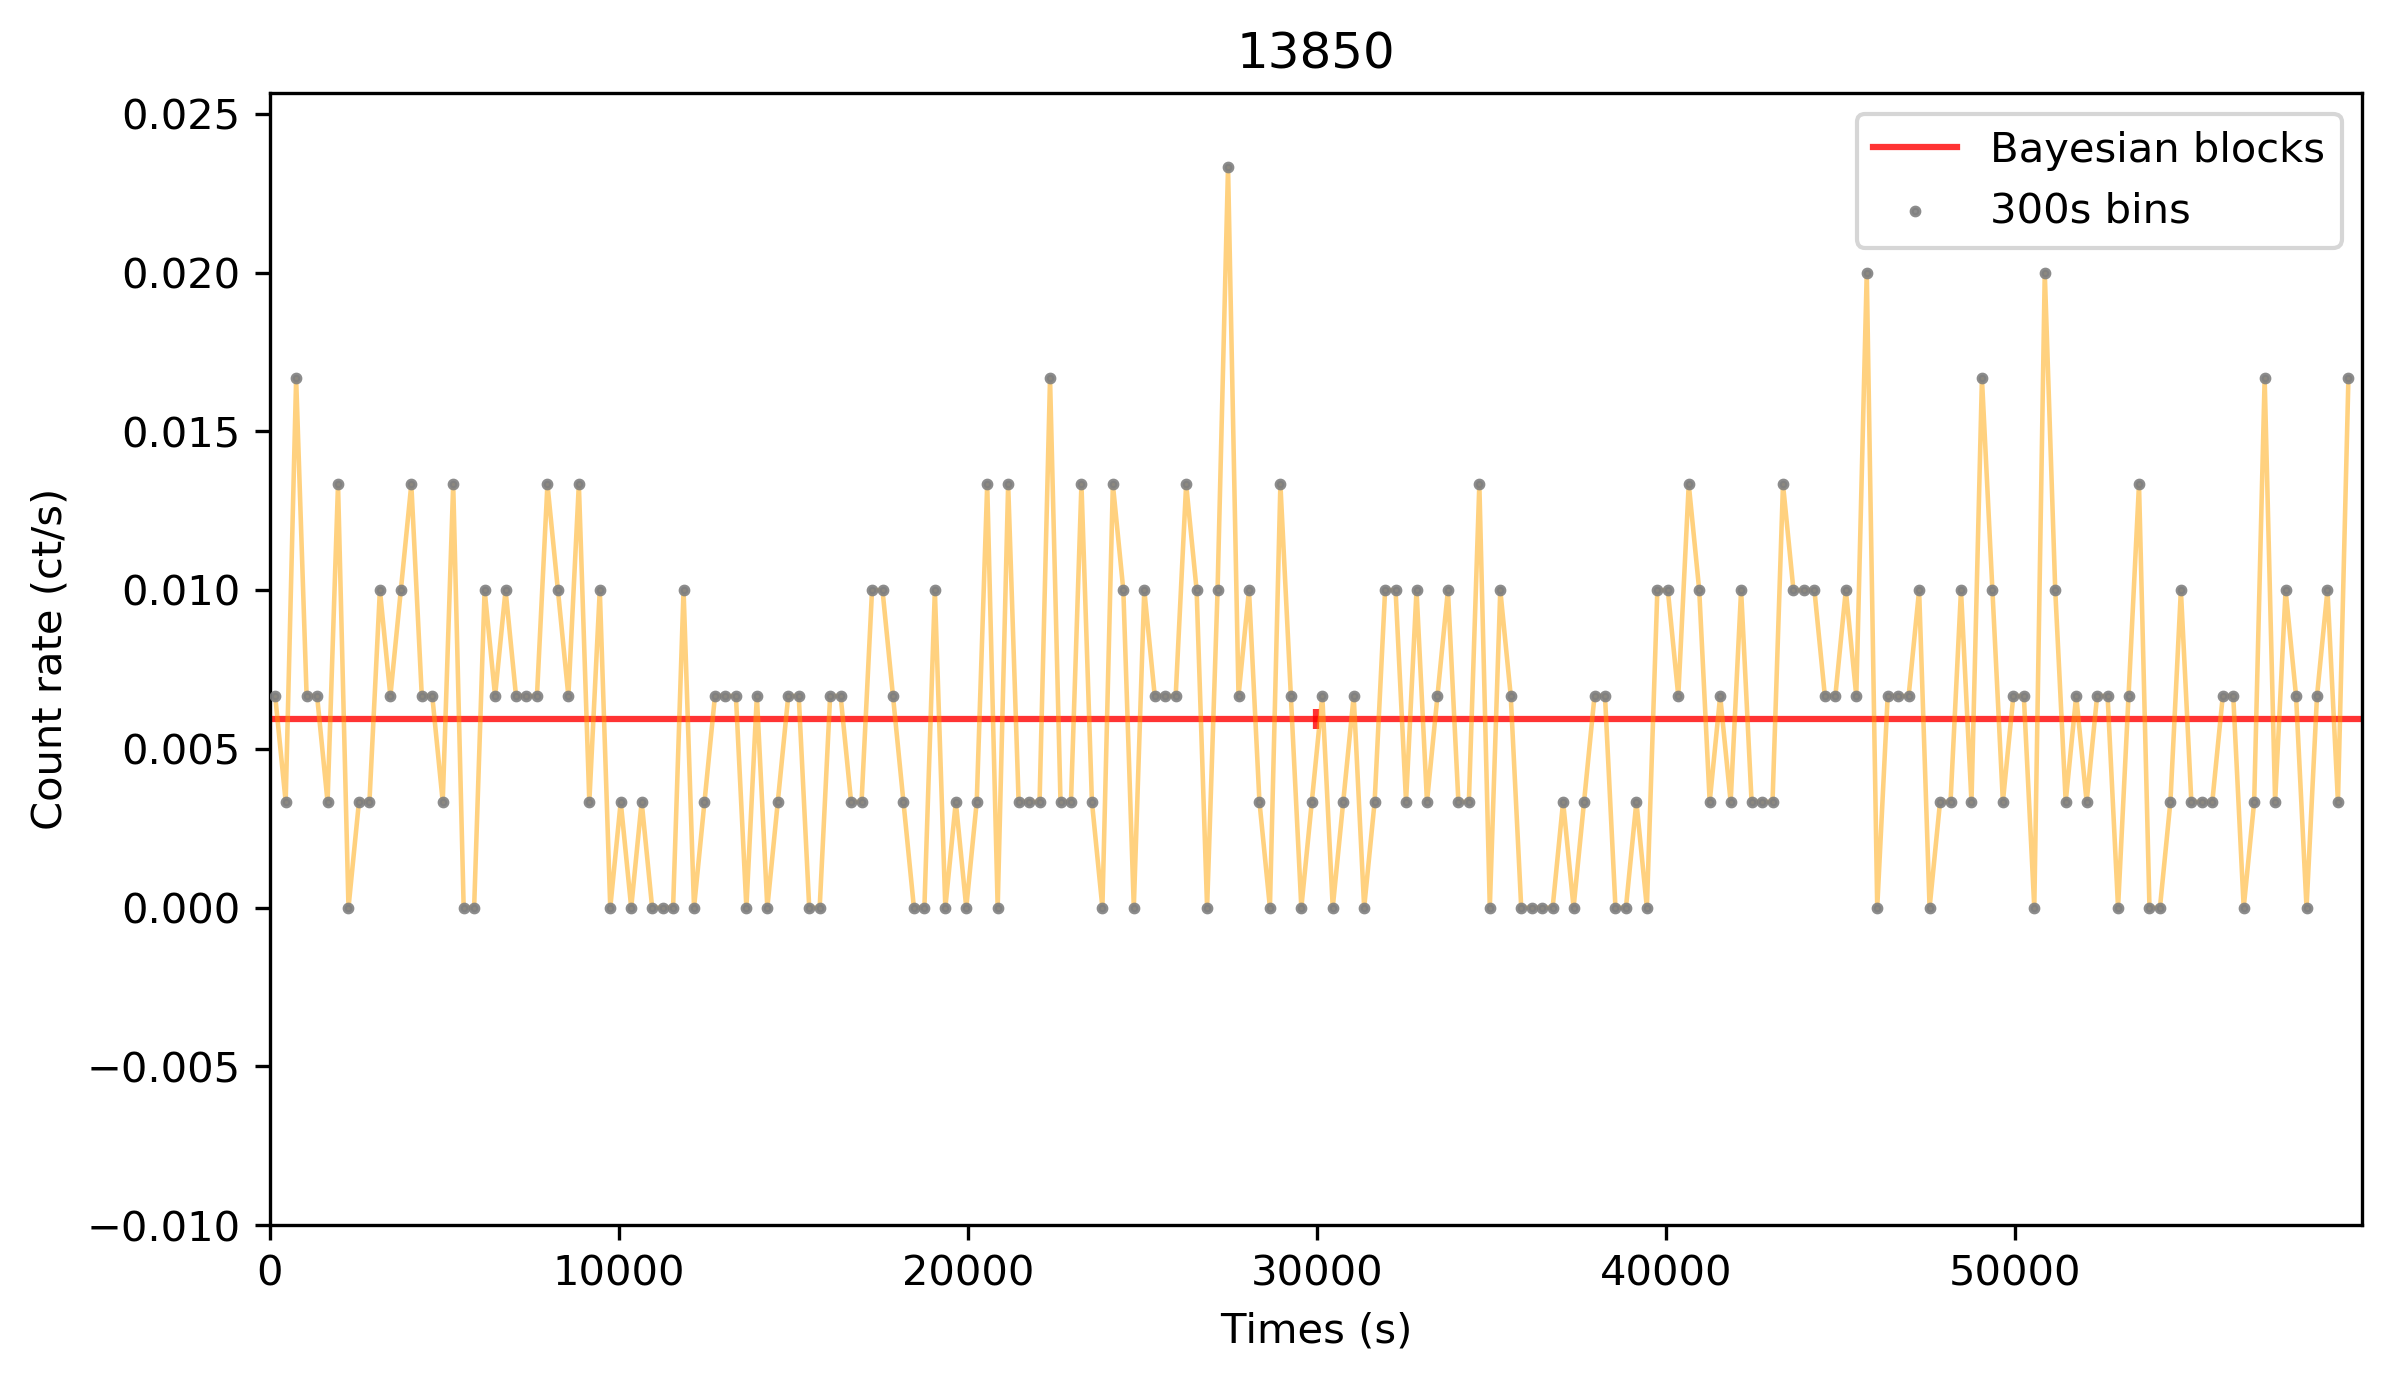

fff [ 13548.38400004  28116.28800009]
ObsID:  14392 
 Max count rate = : 0.253333333333


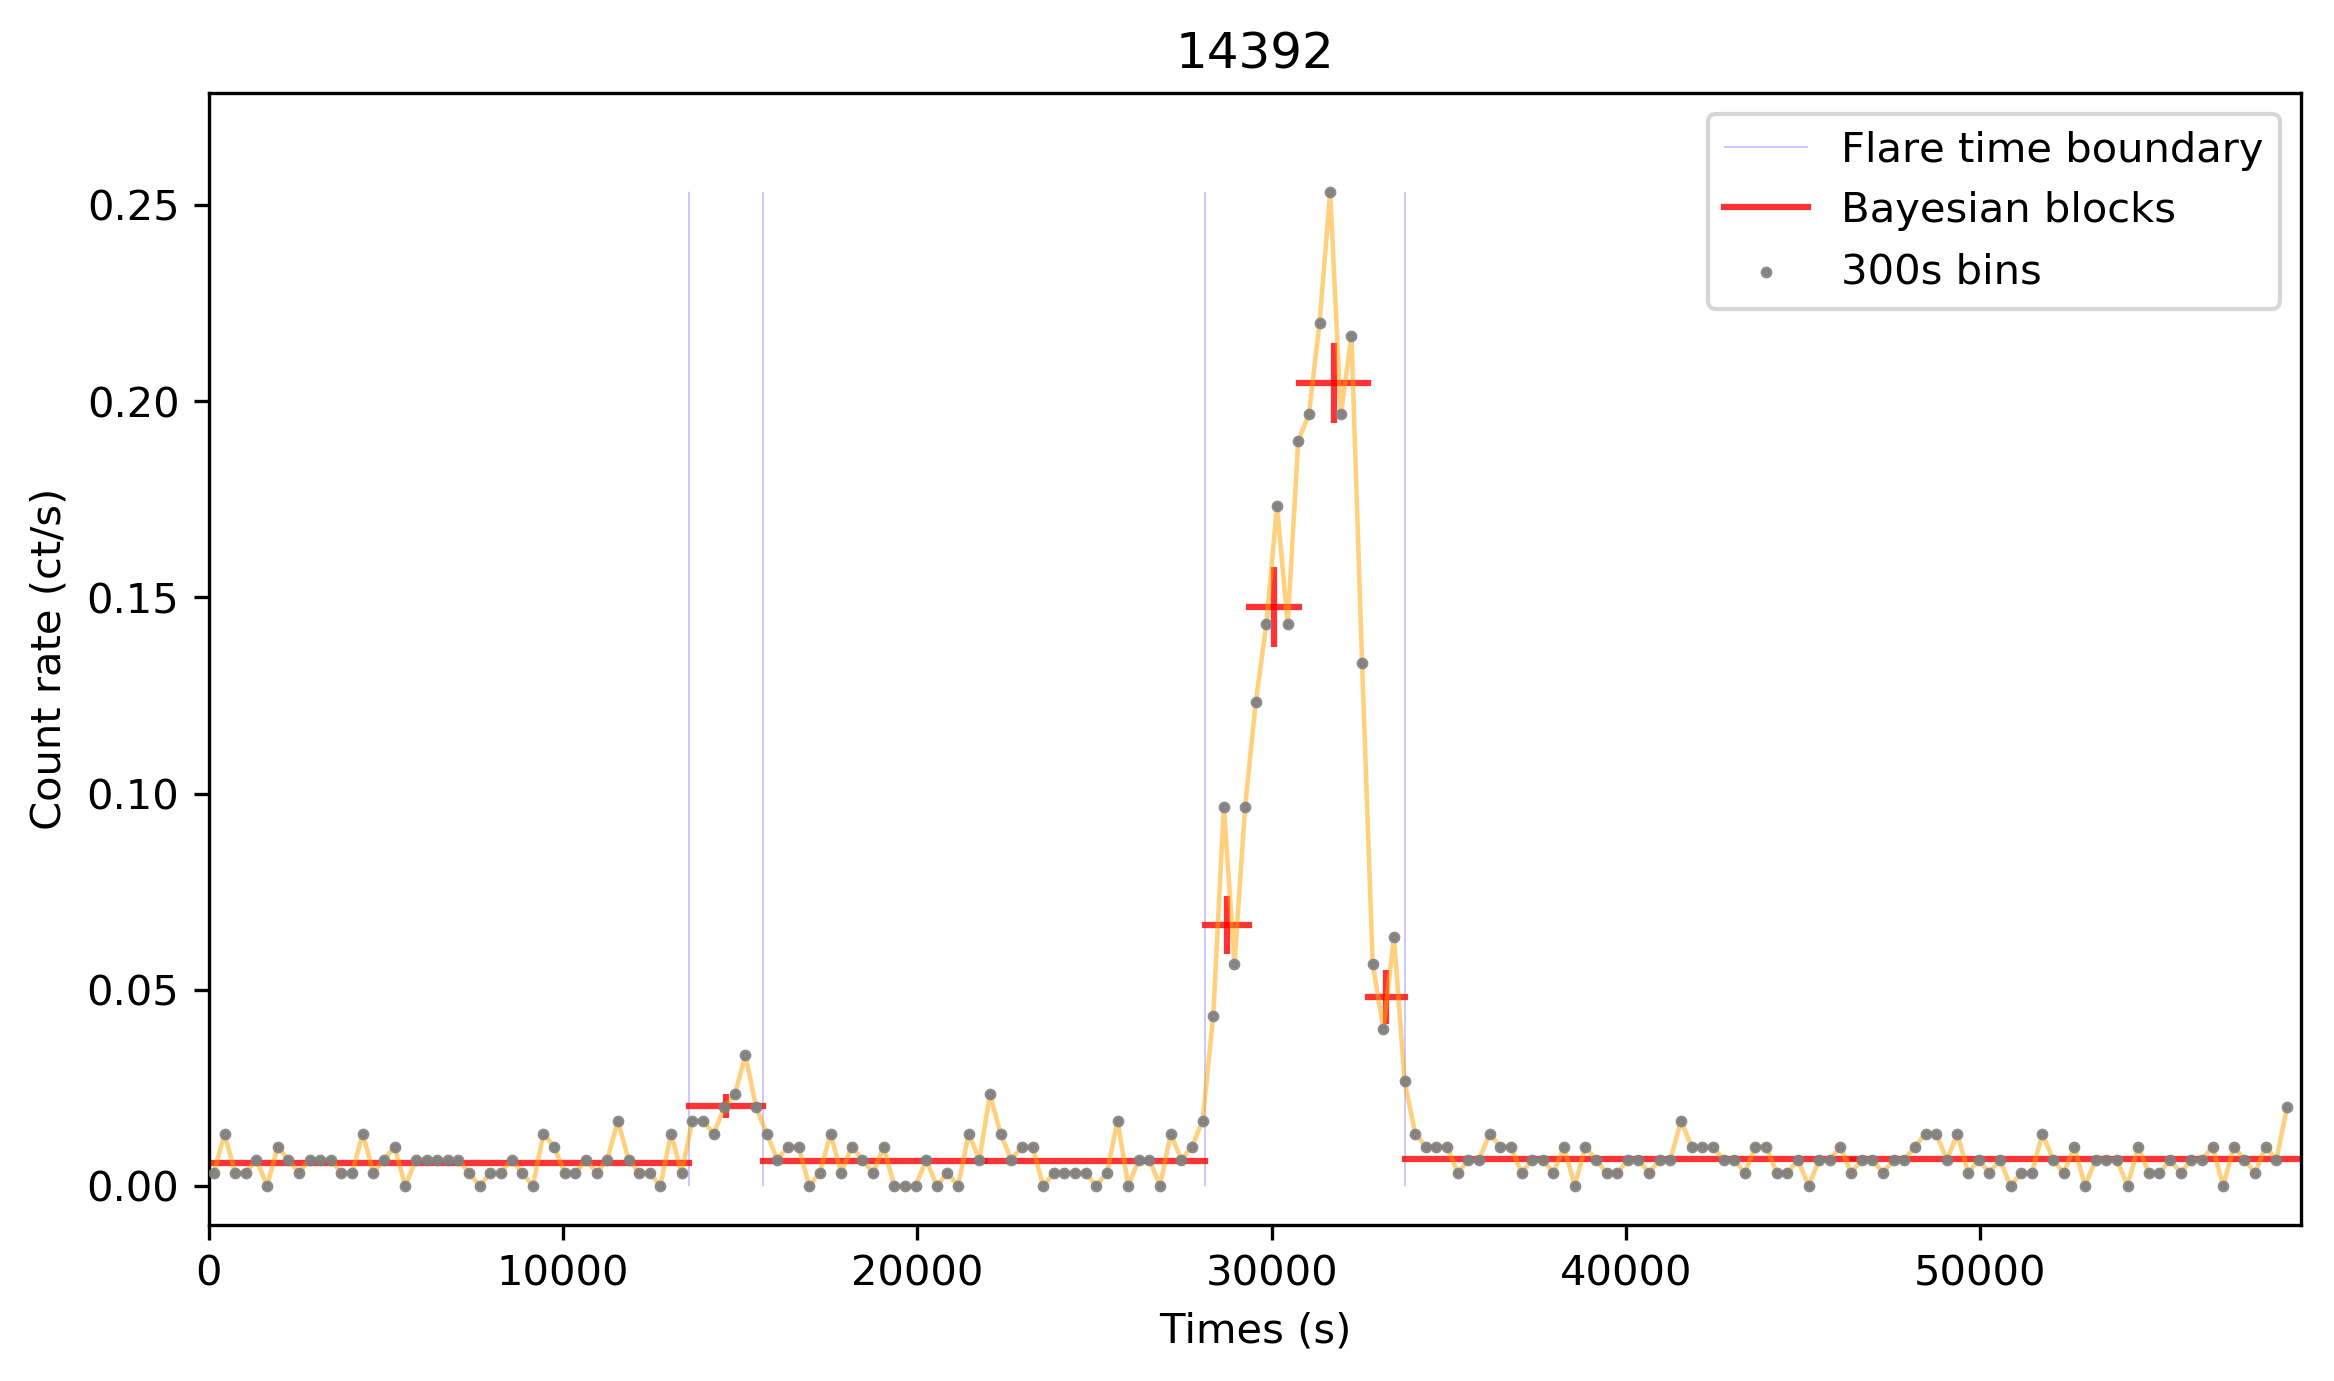

ObsID:  14394 
 Max count rate = : 0.0266666666667


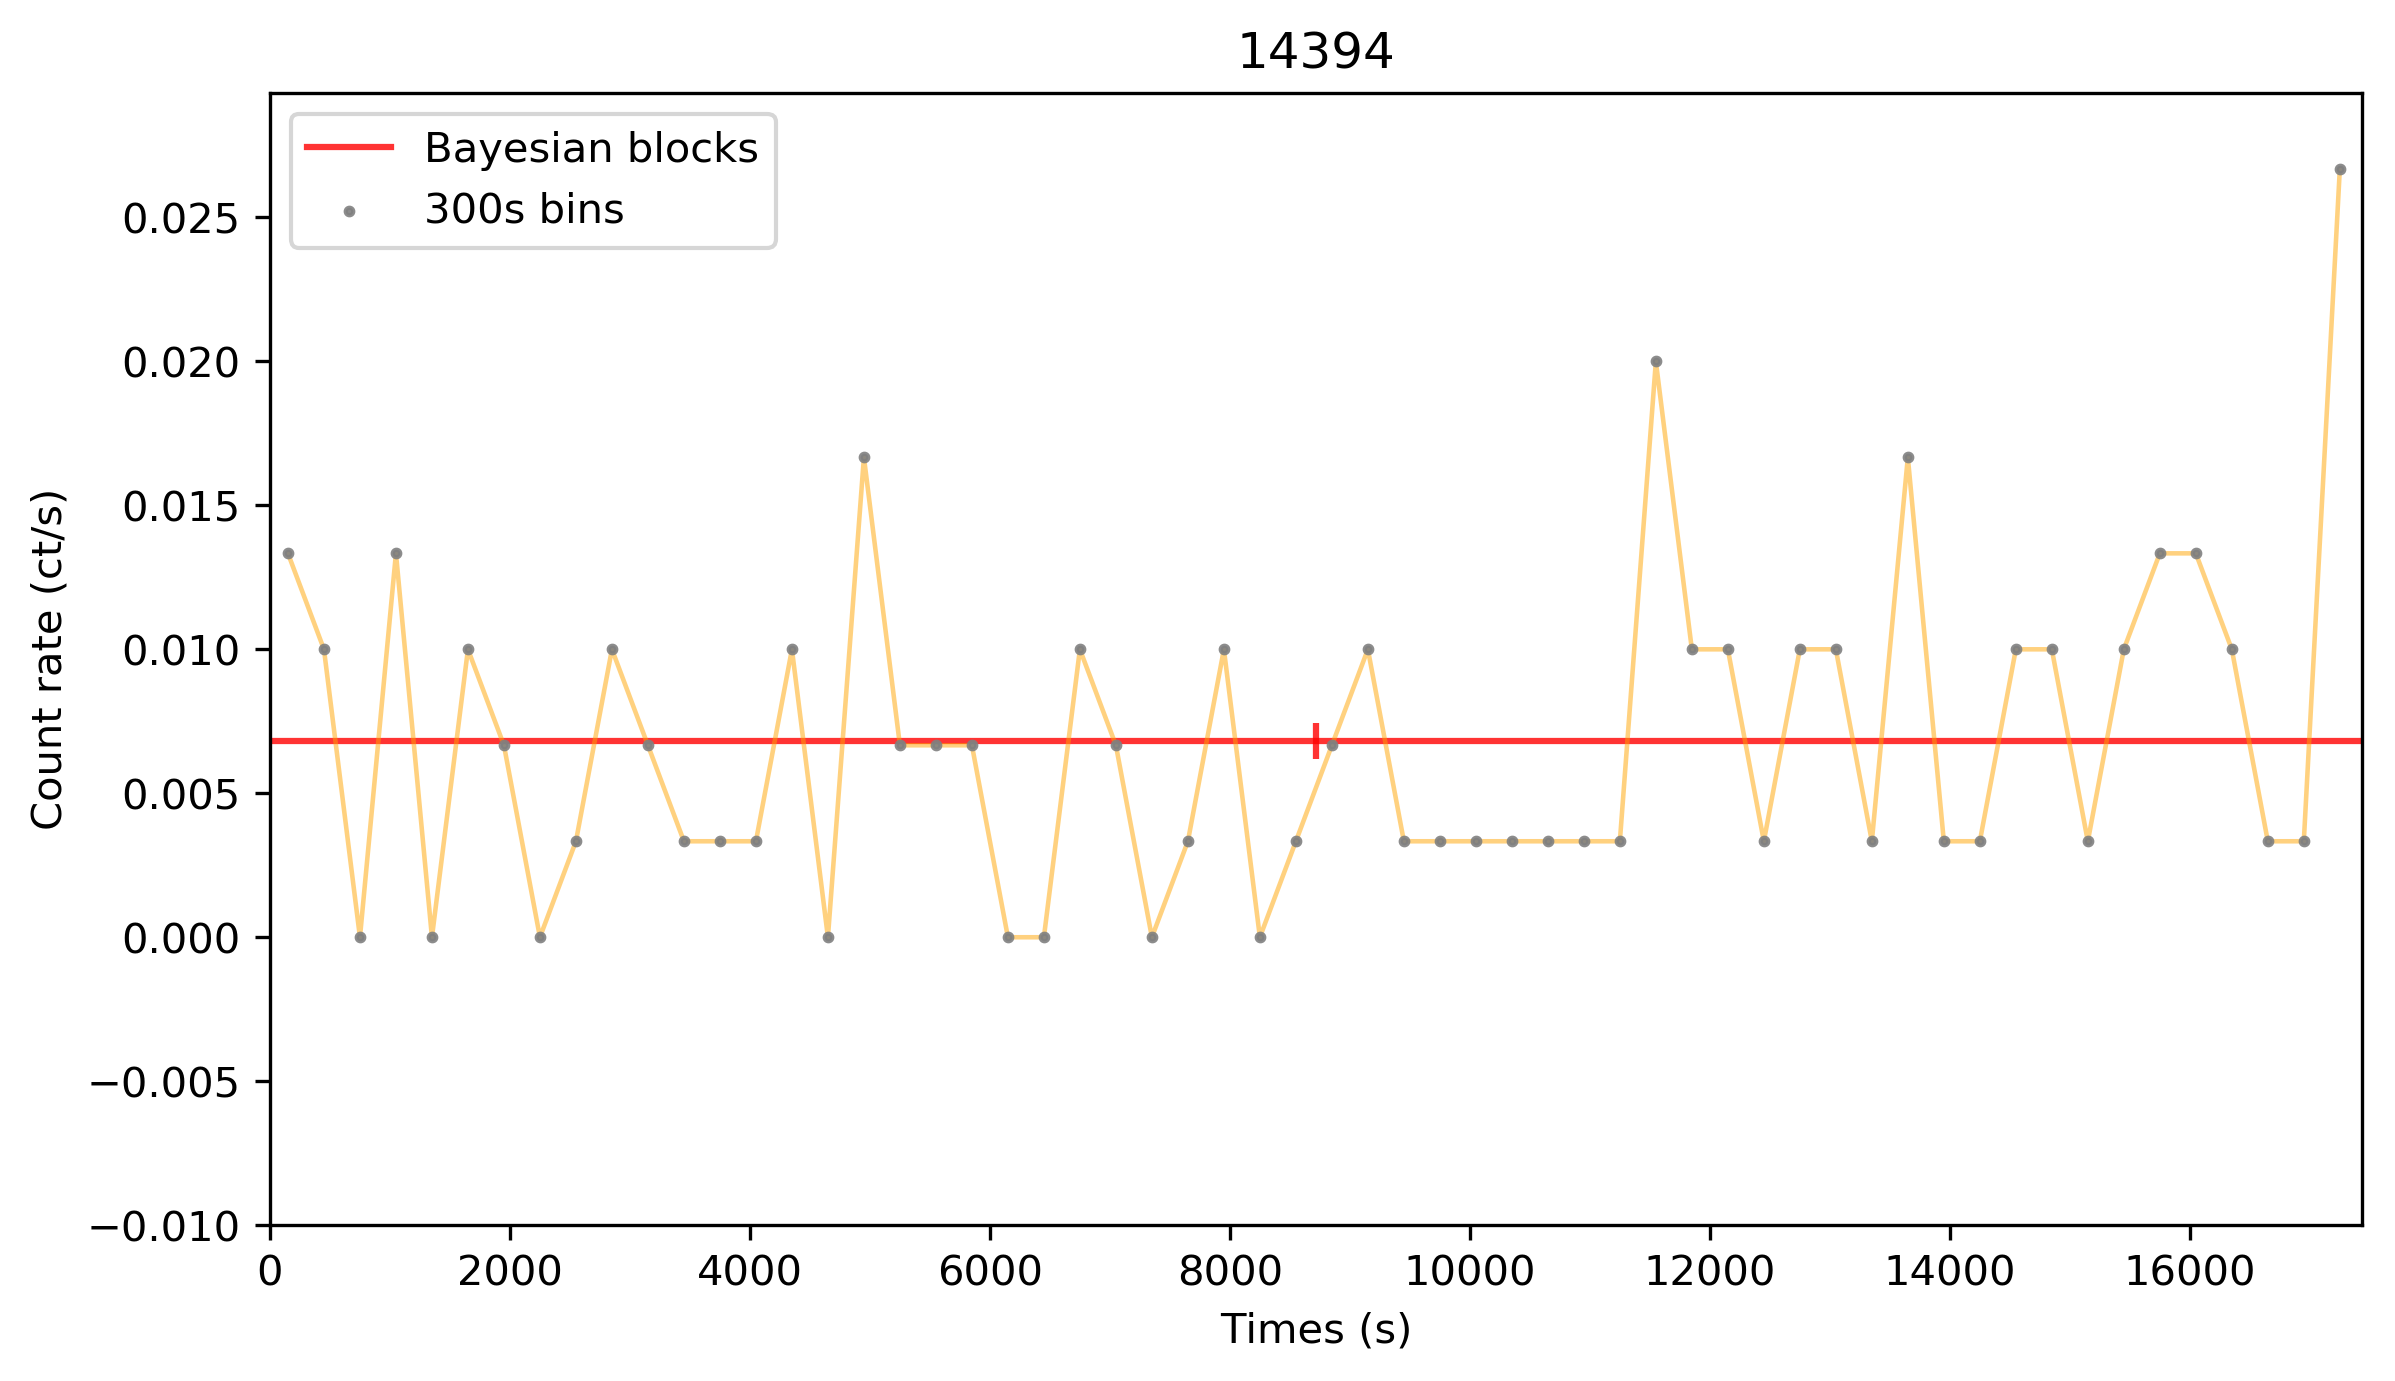

ObsID:  14393 
 Max count rate = : 0.0266666666667


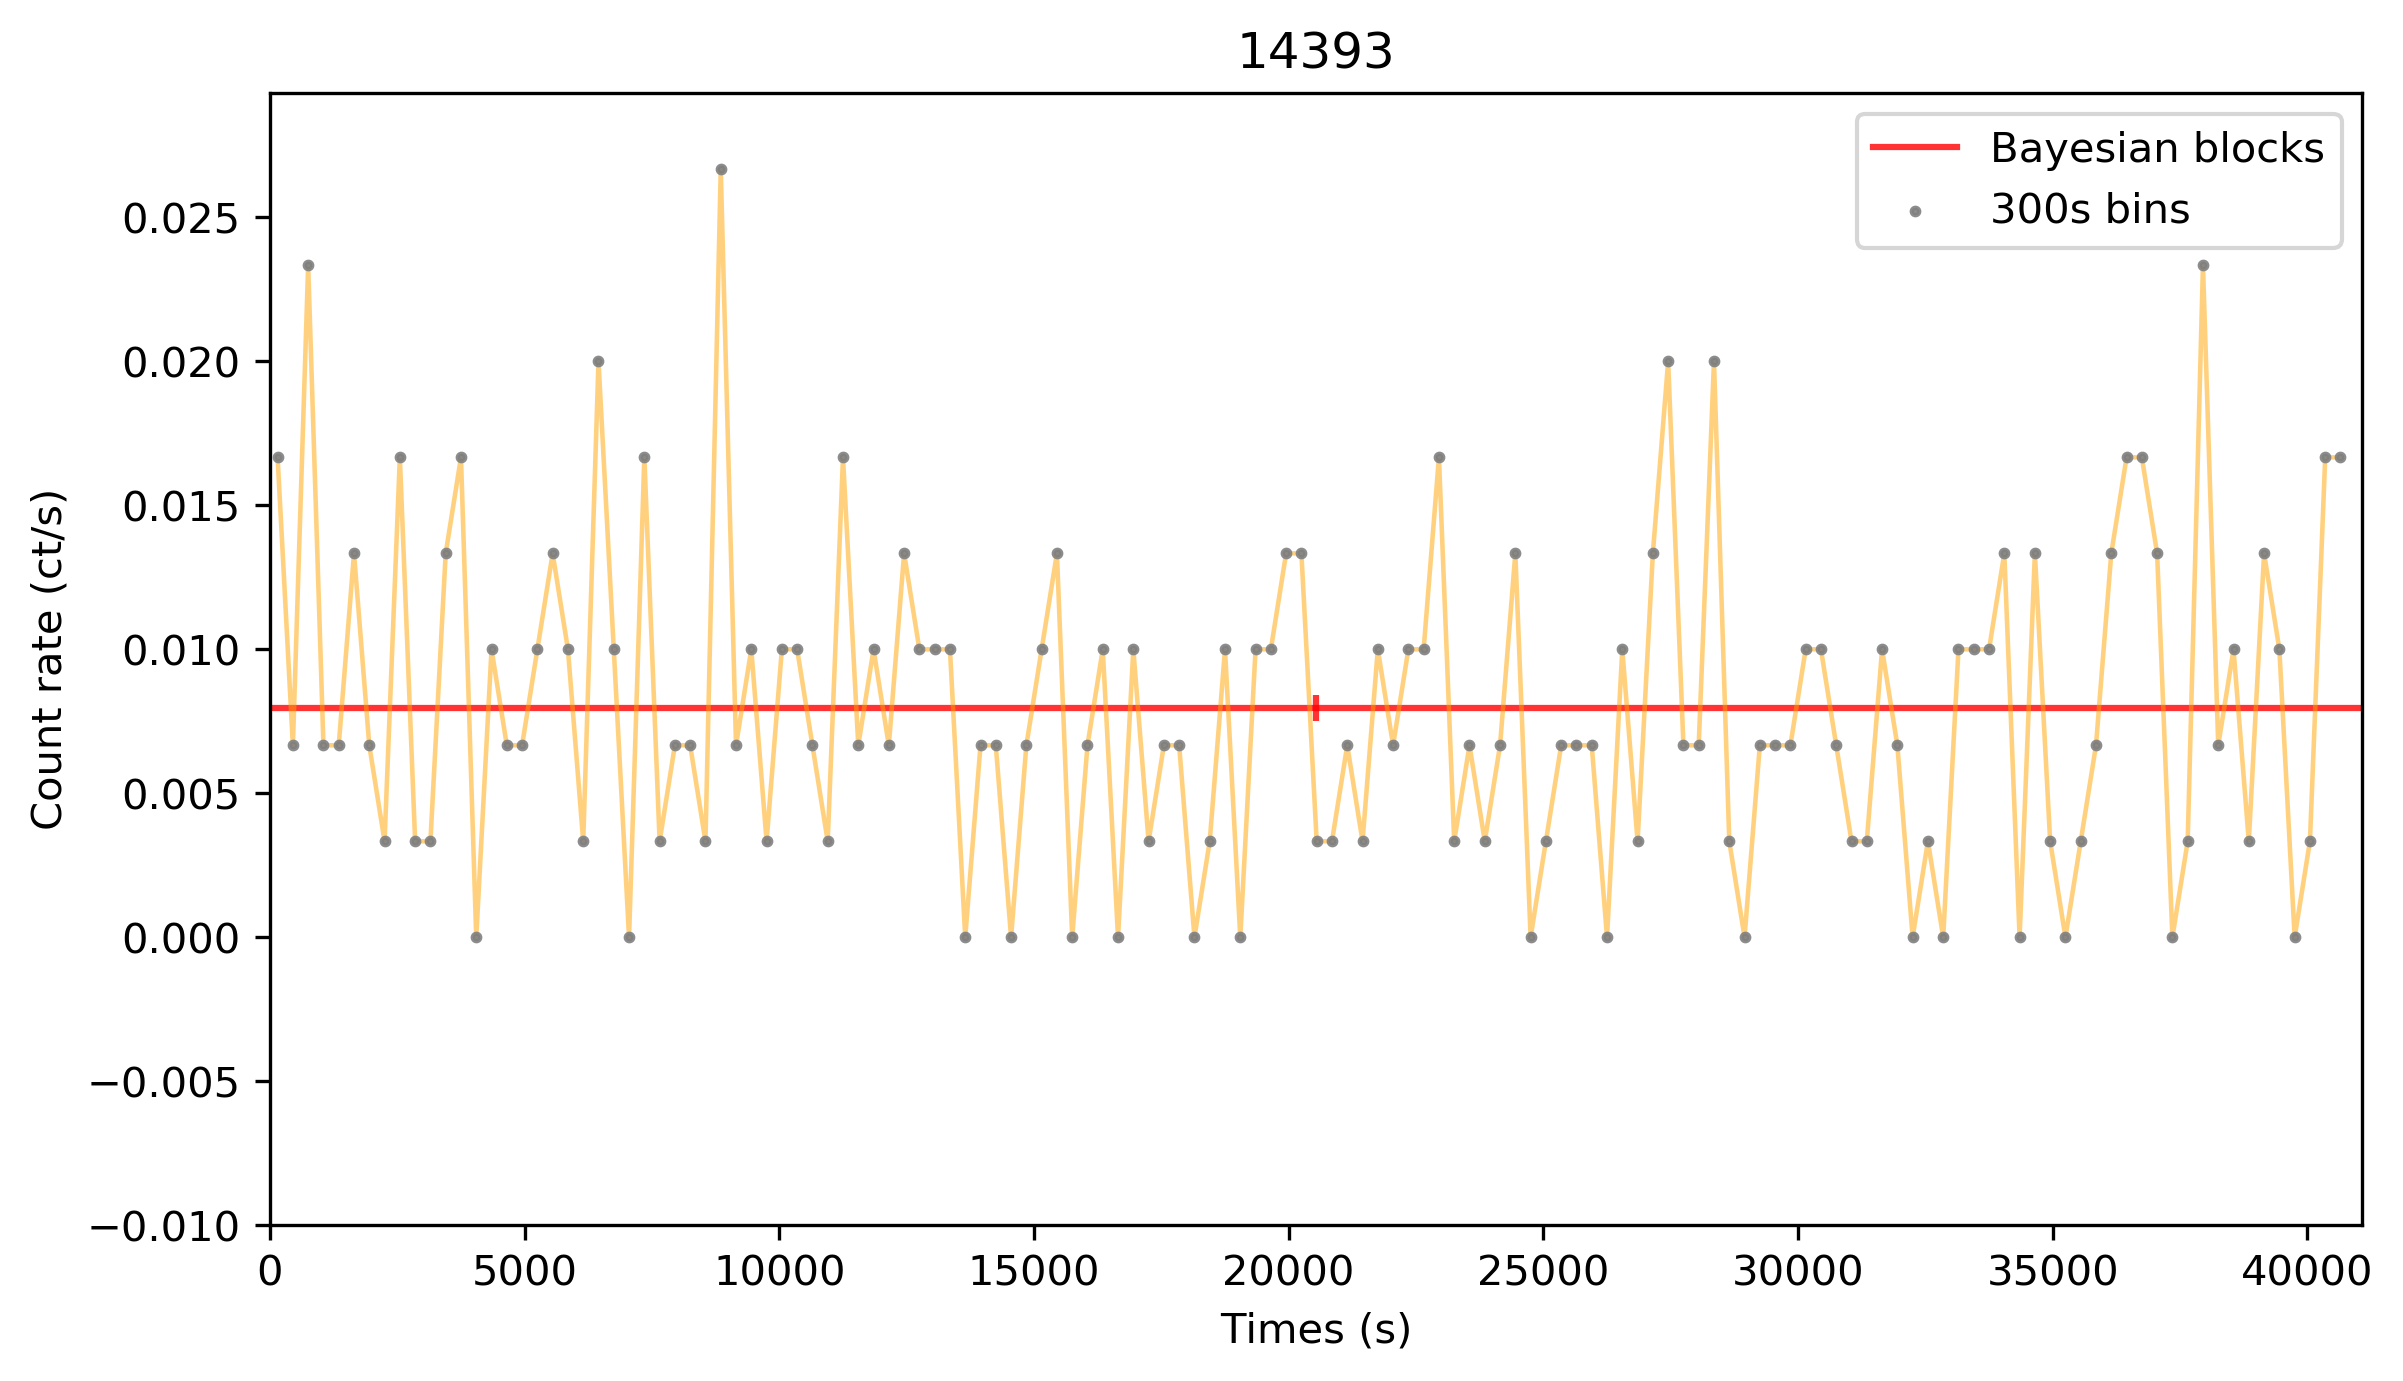

ObsID:  13856 
 Max count rate = : 0.02


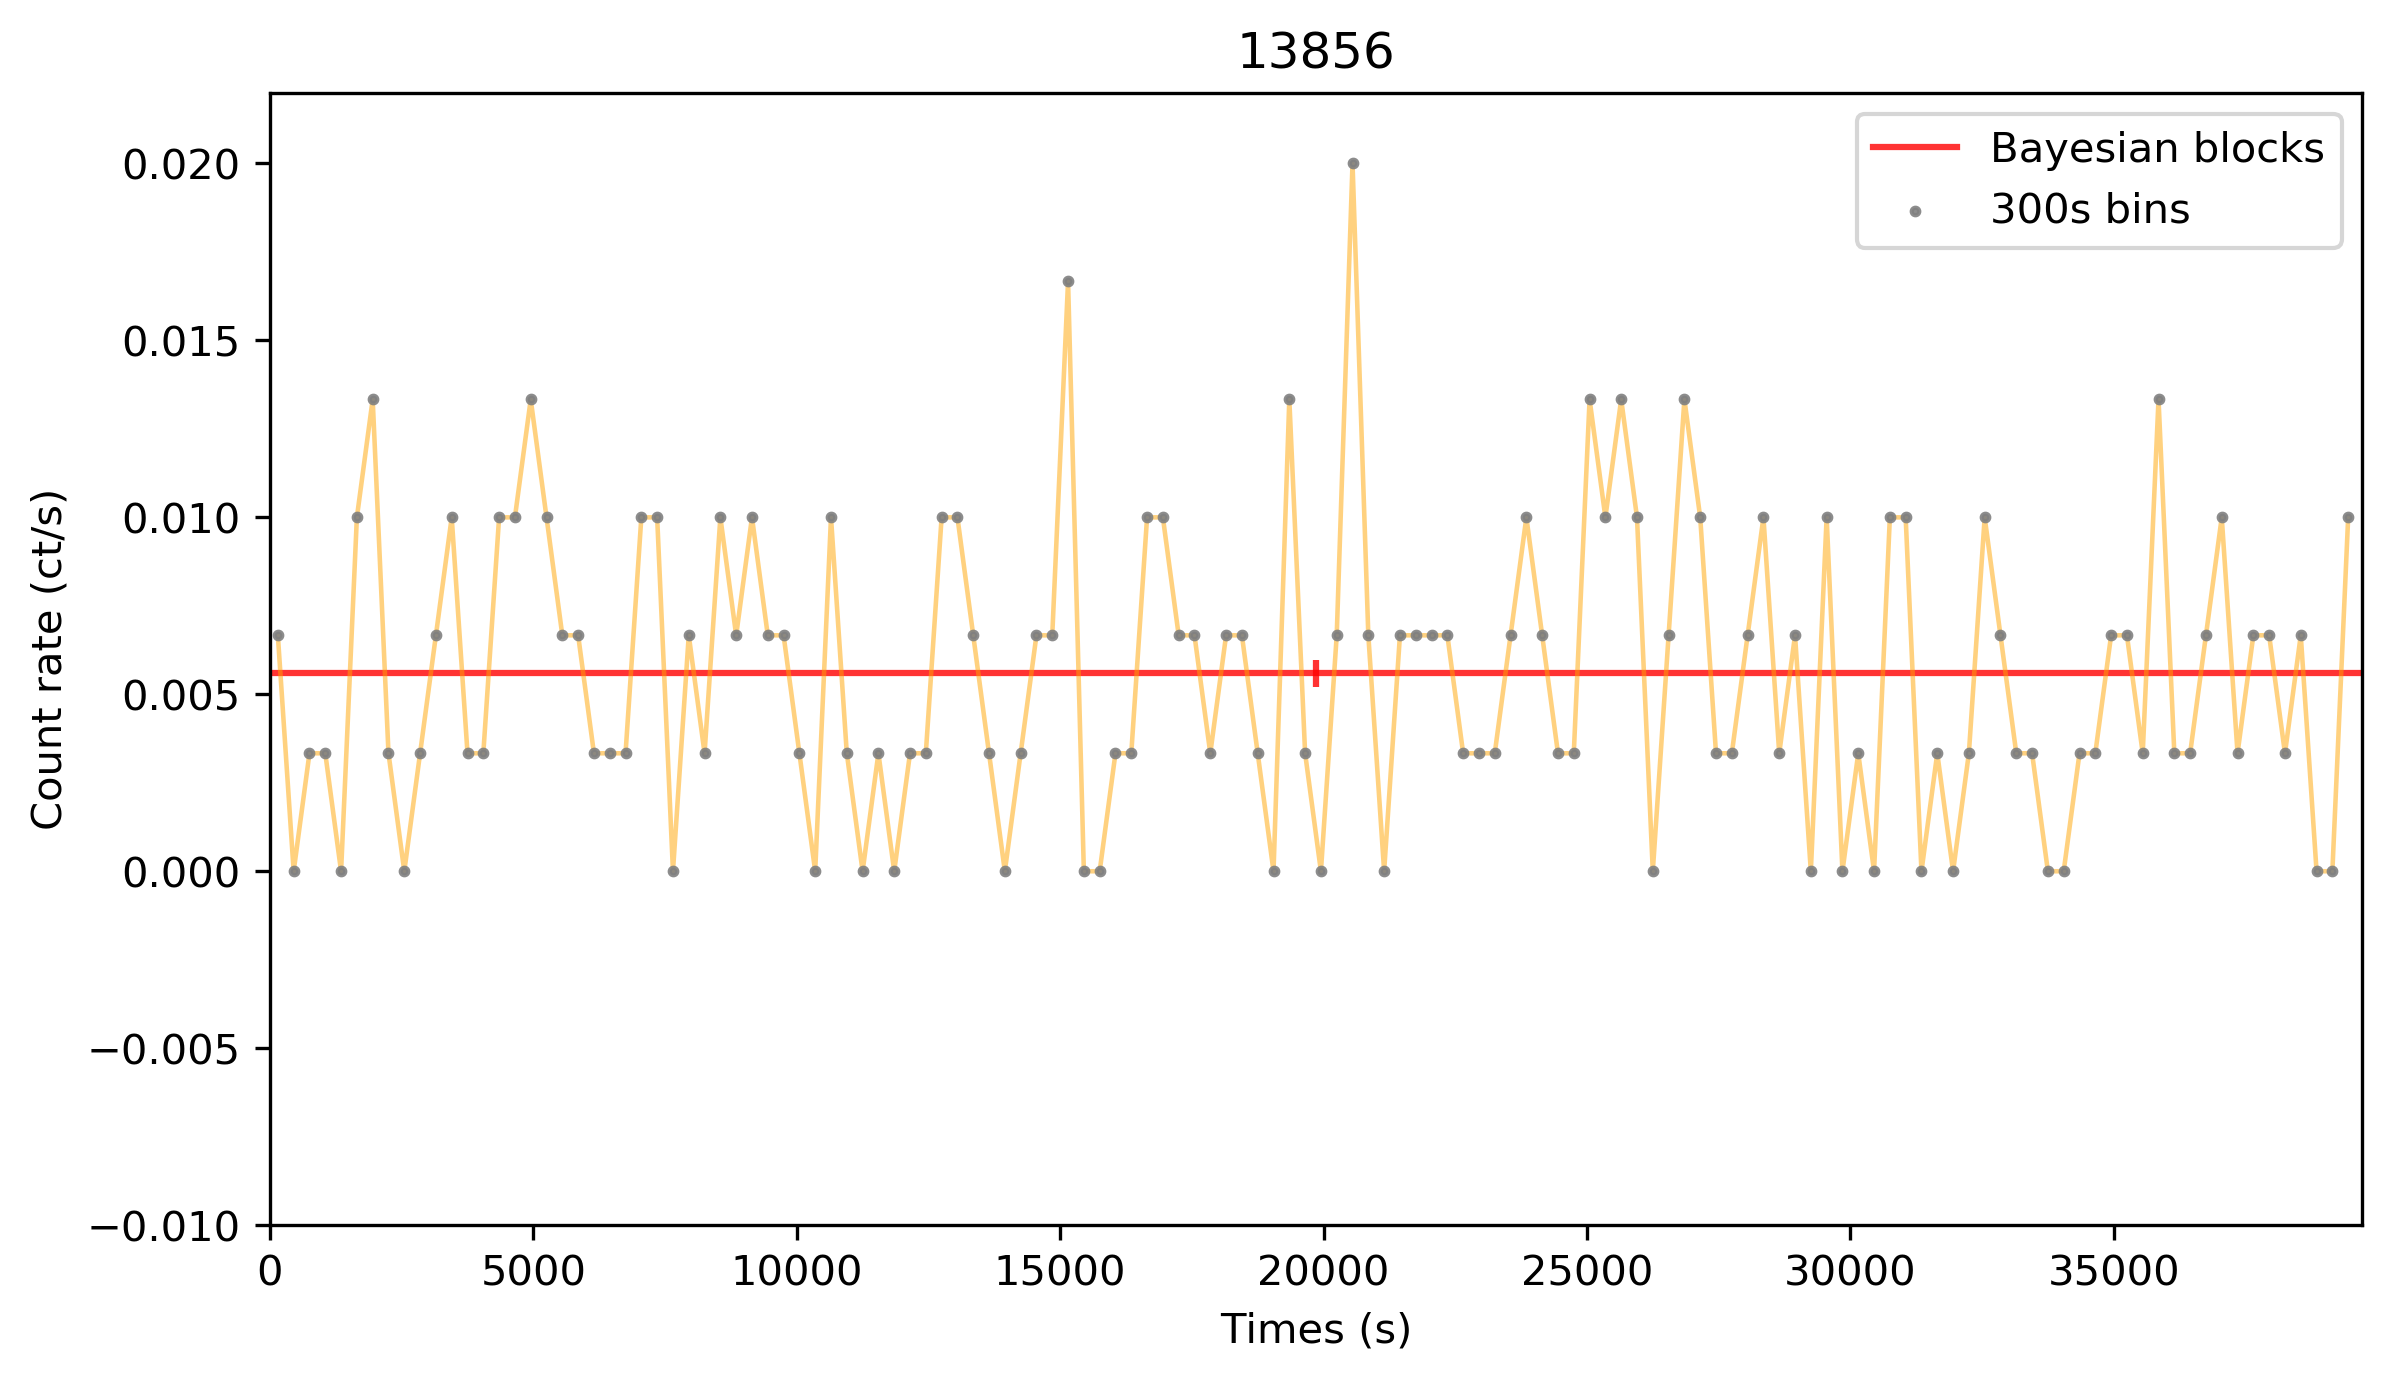

ObsID:  13857 
 Max count rate = : 0.0333333333333


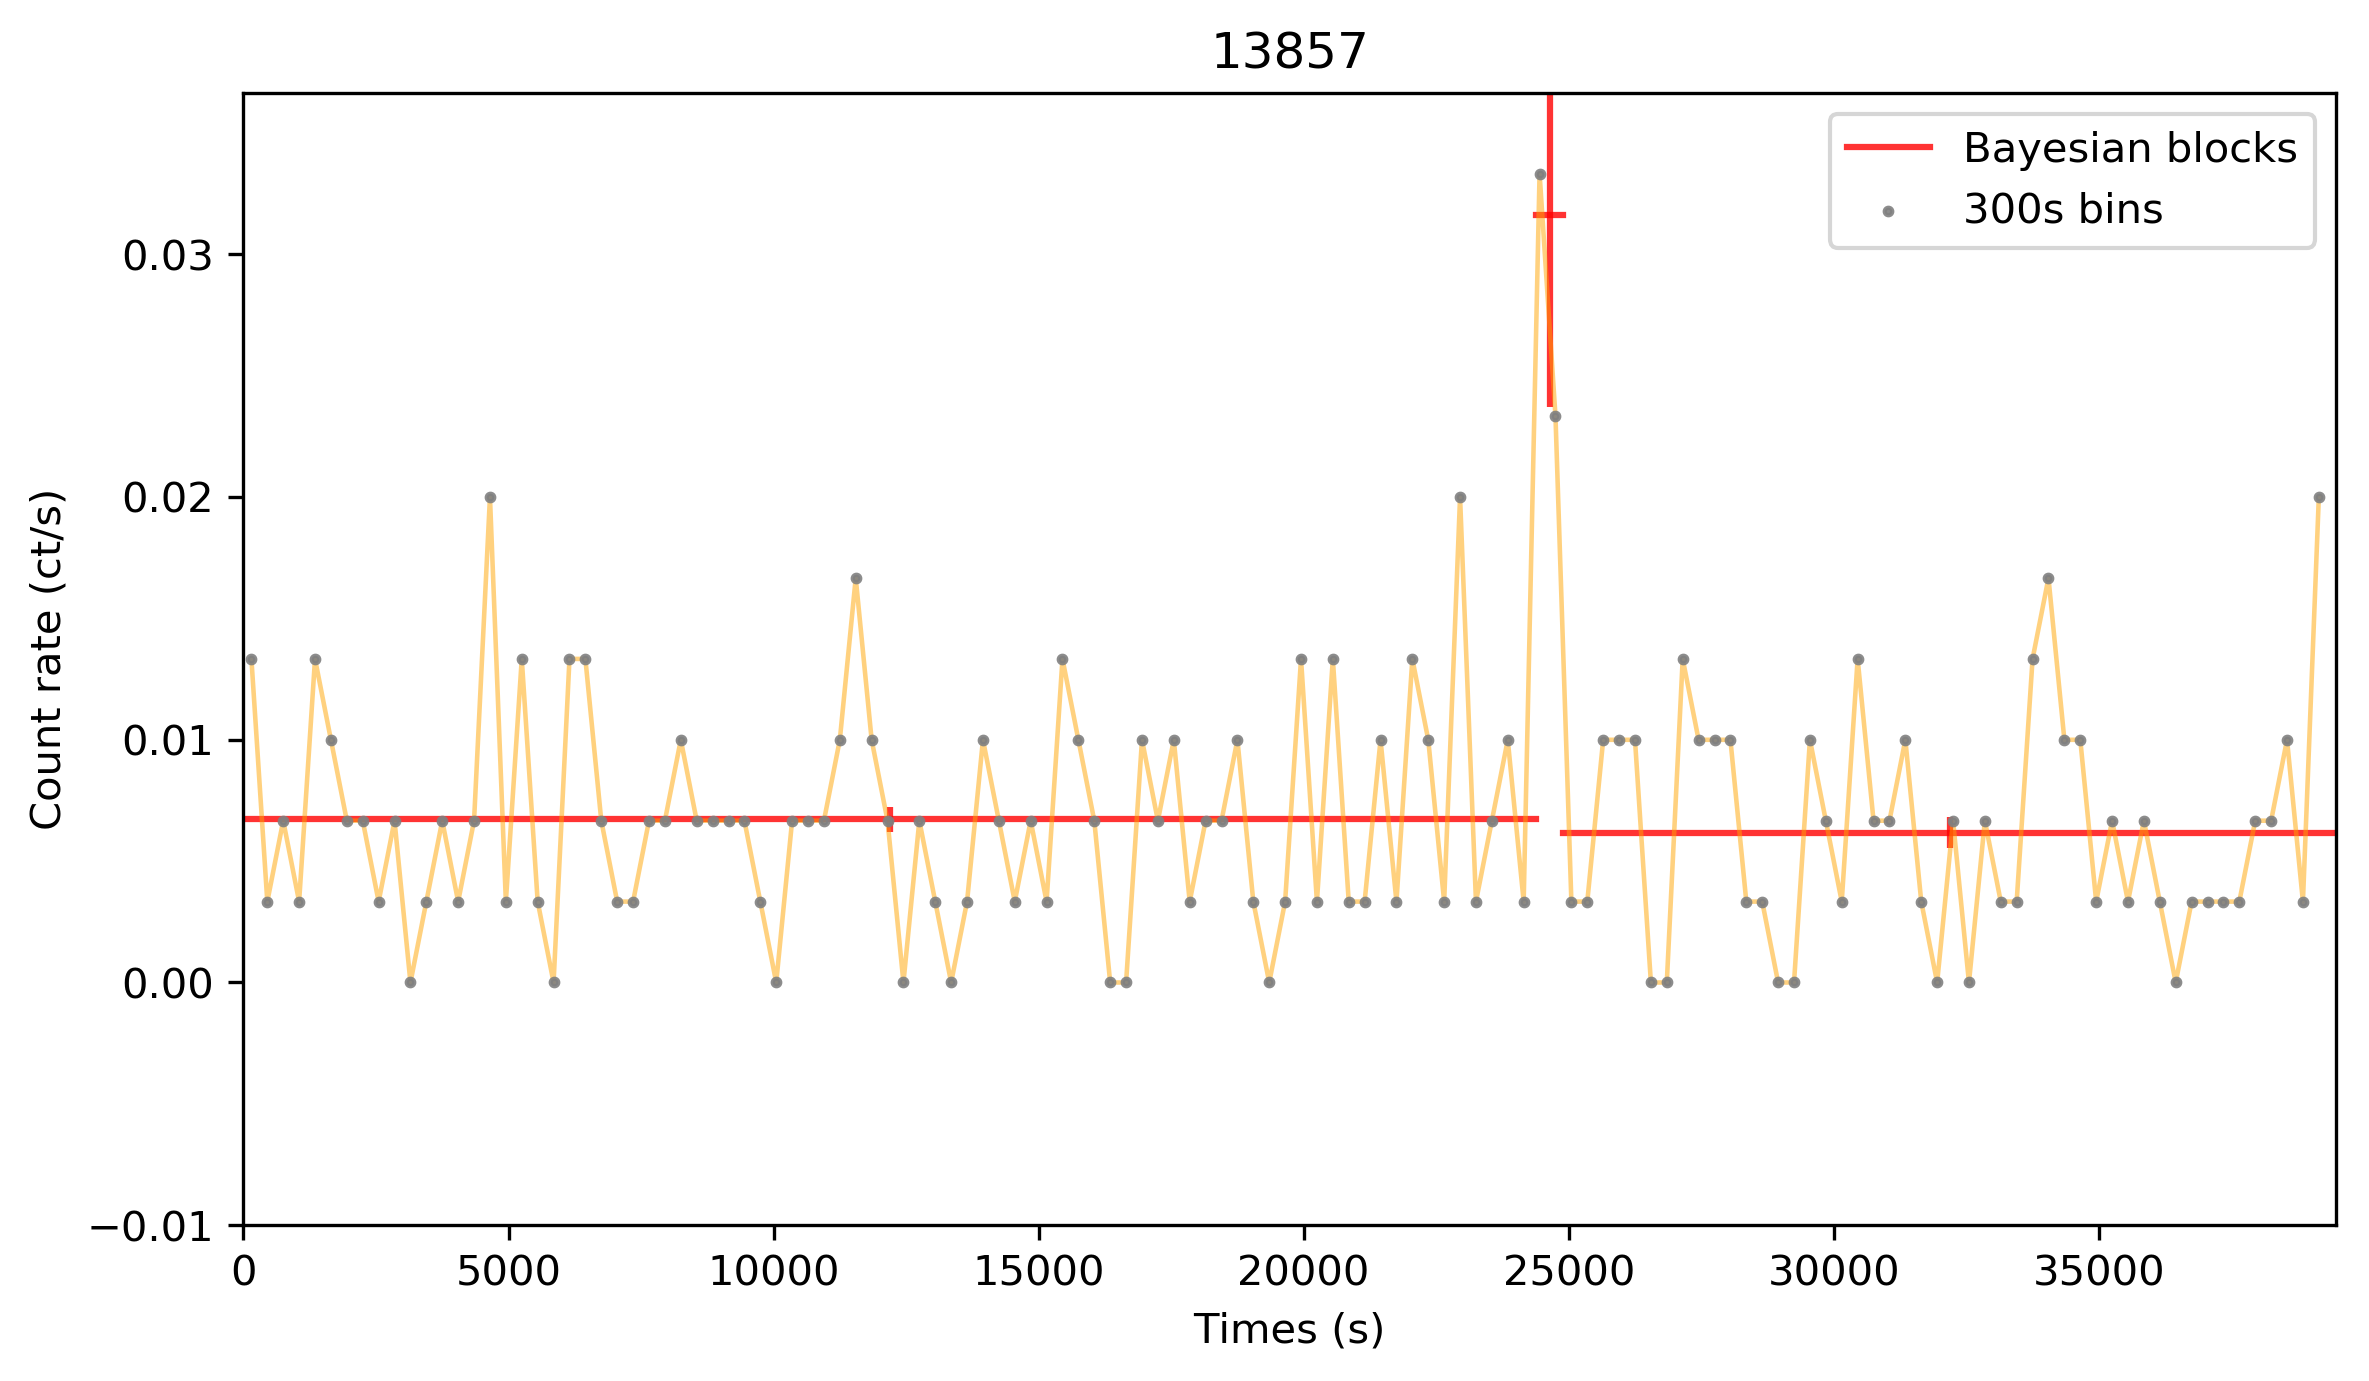

fff [  4031.424        7652.44799999  12582.43199992  20959.77600014]
ObsID:  13854 
 Max count rate = : 0.0966666666667


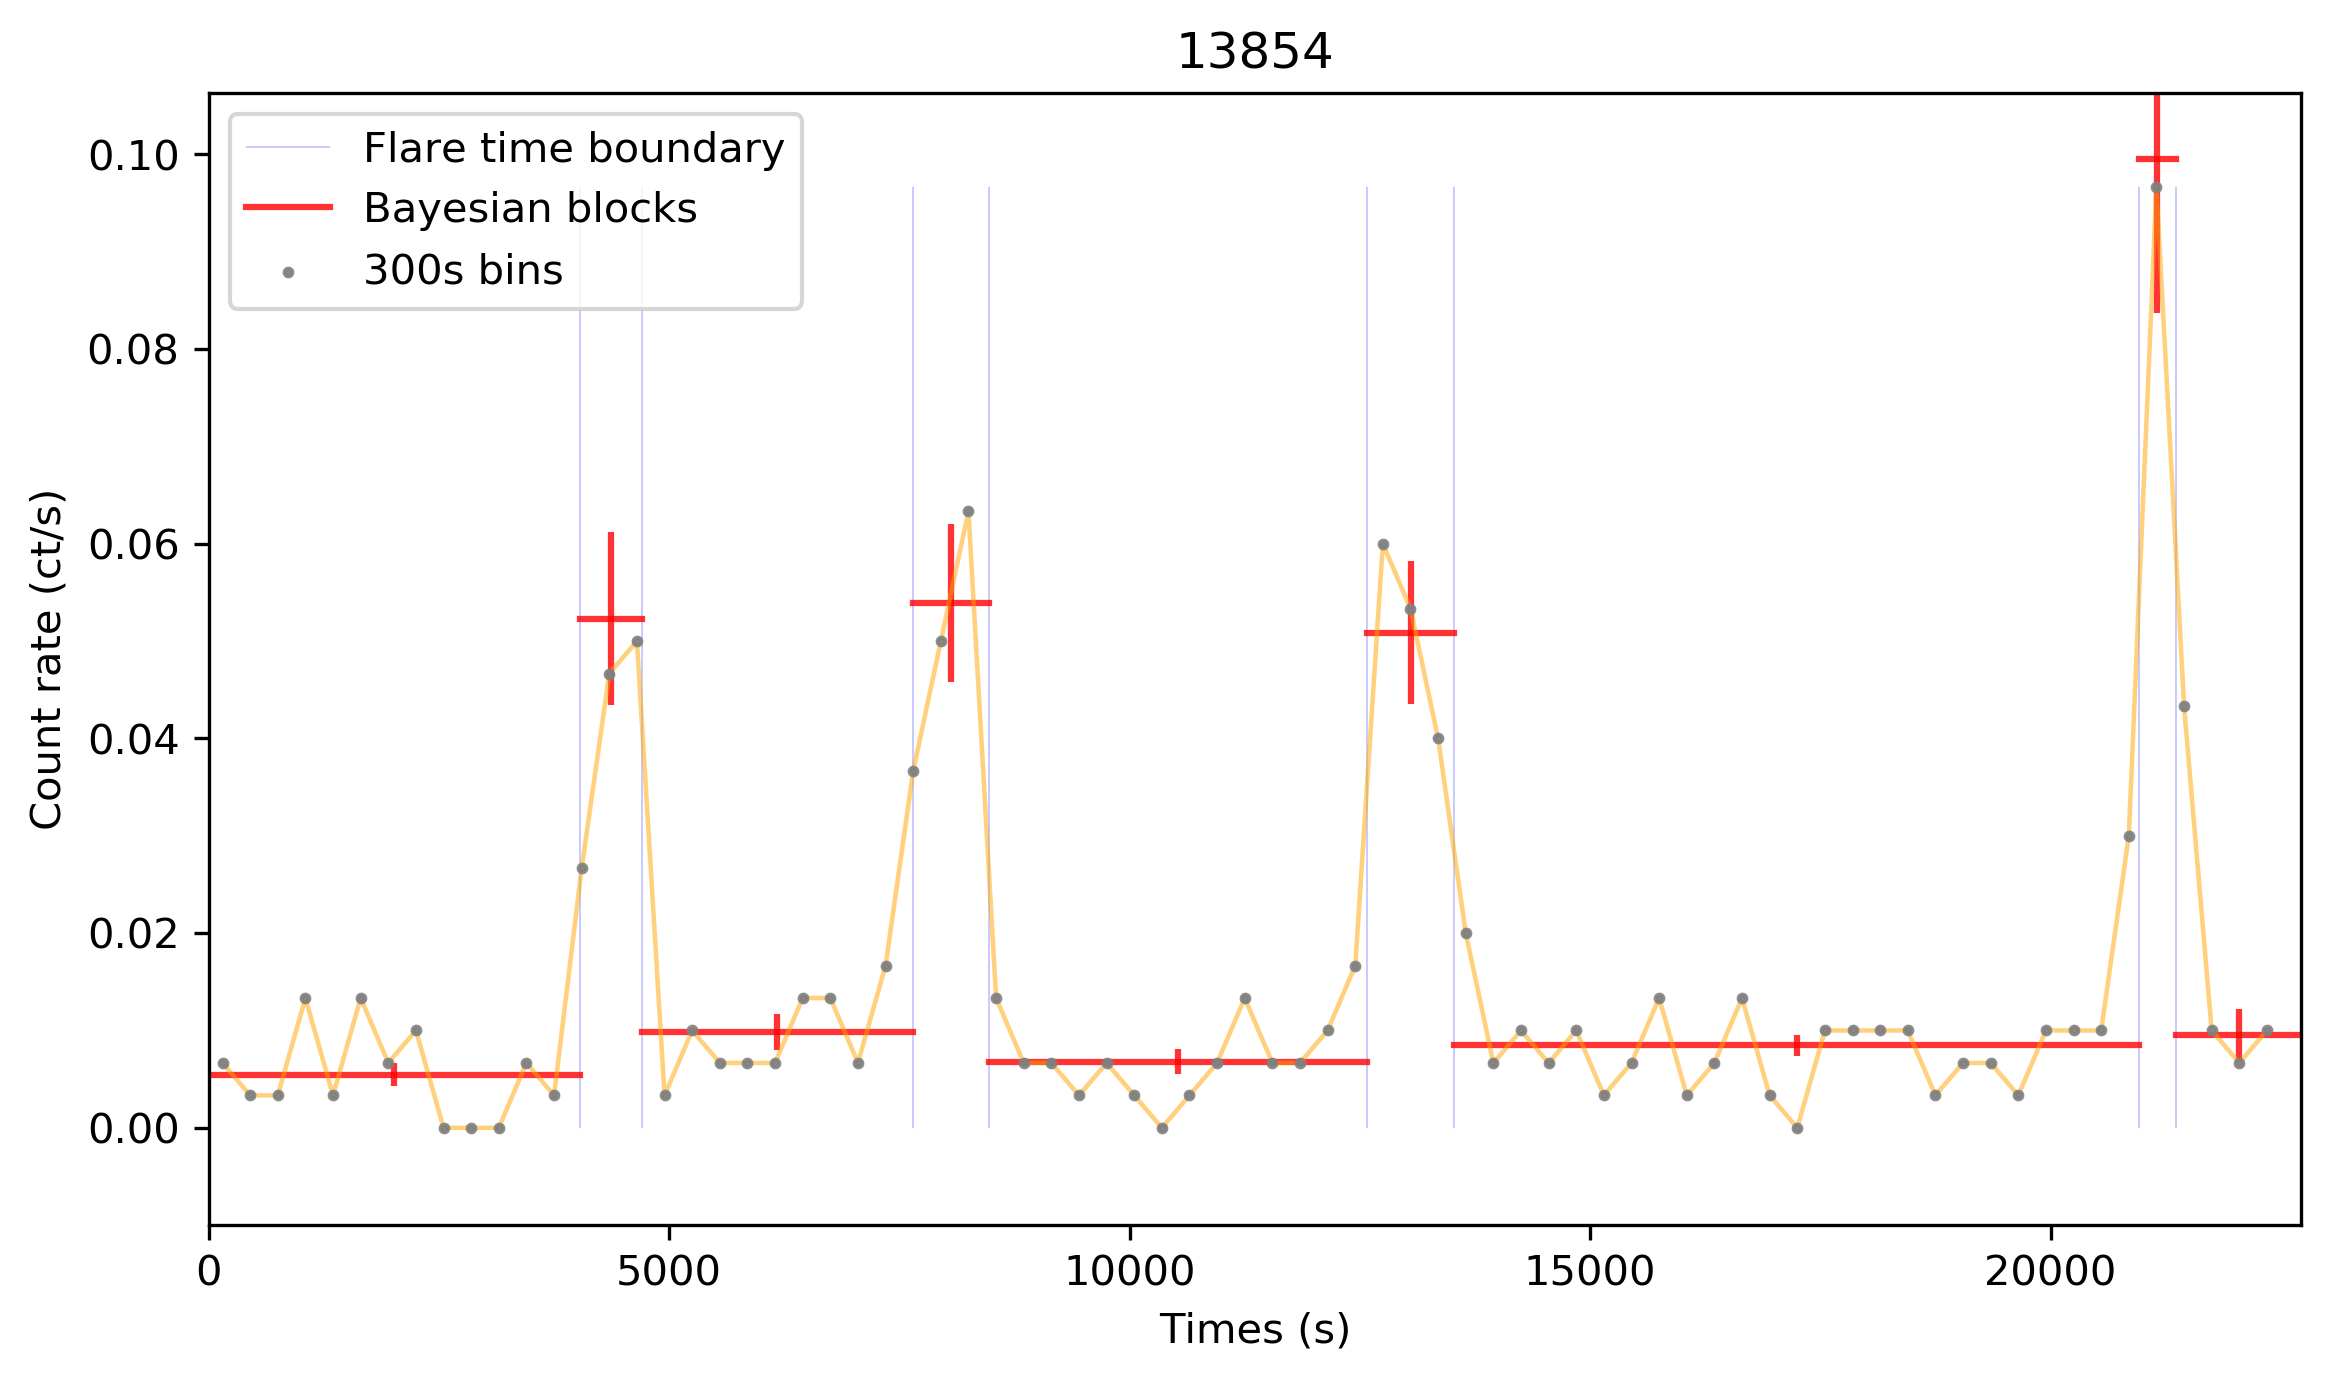

ObsID:  13855 
 Max count rate = : 0.0266666666667


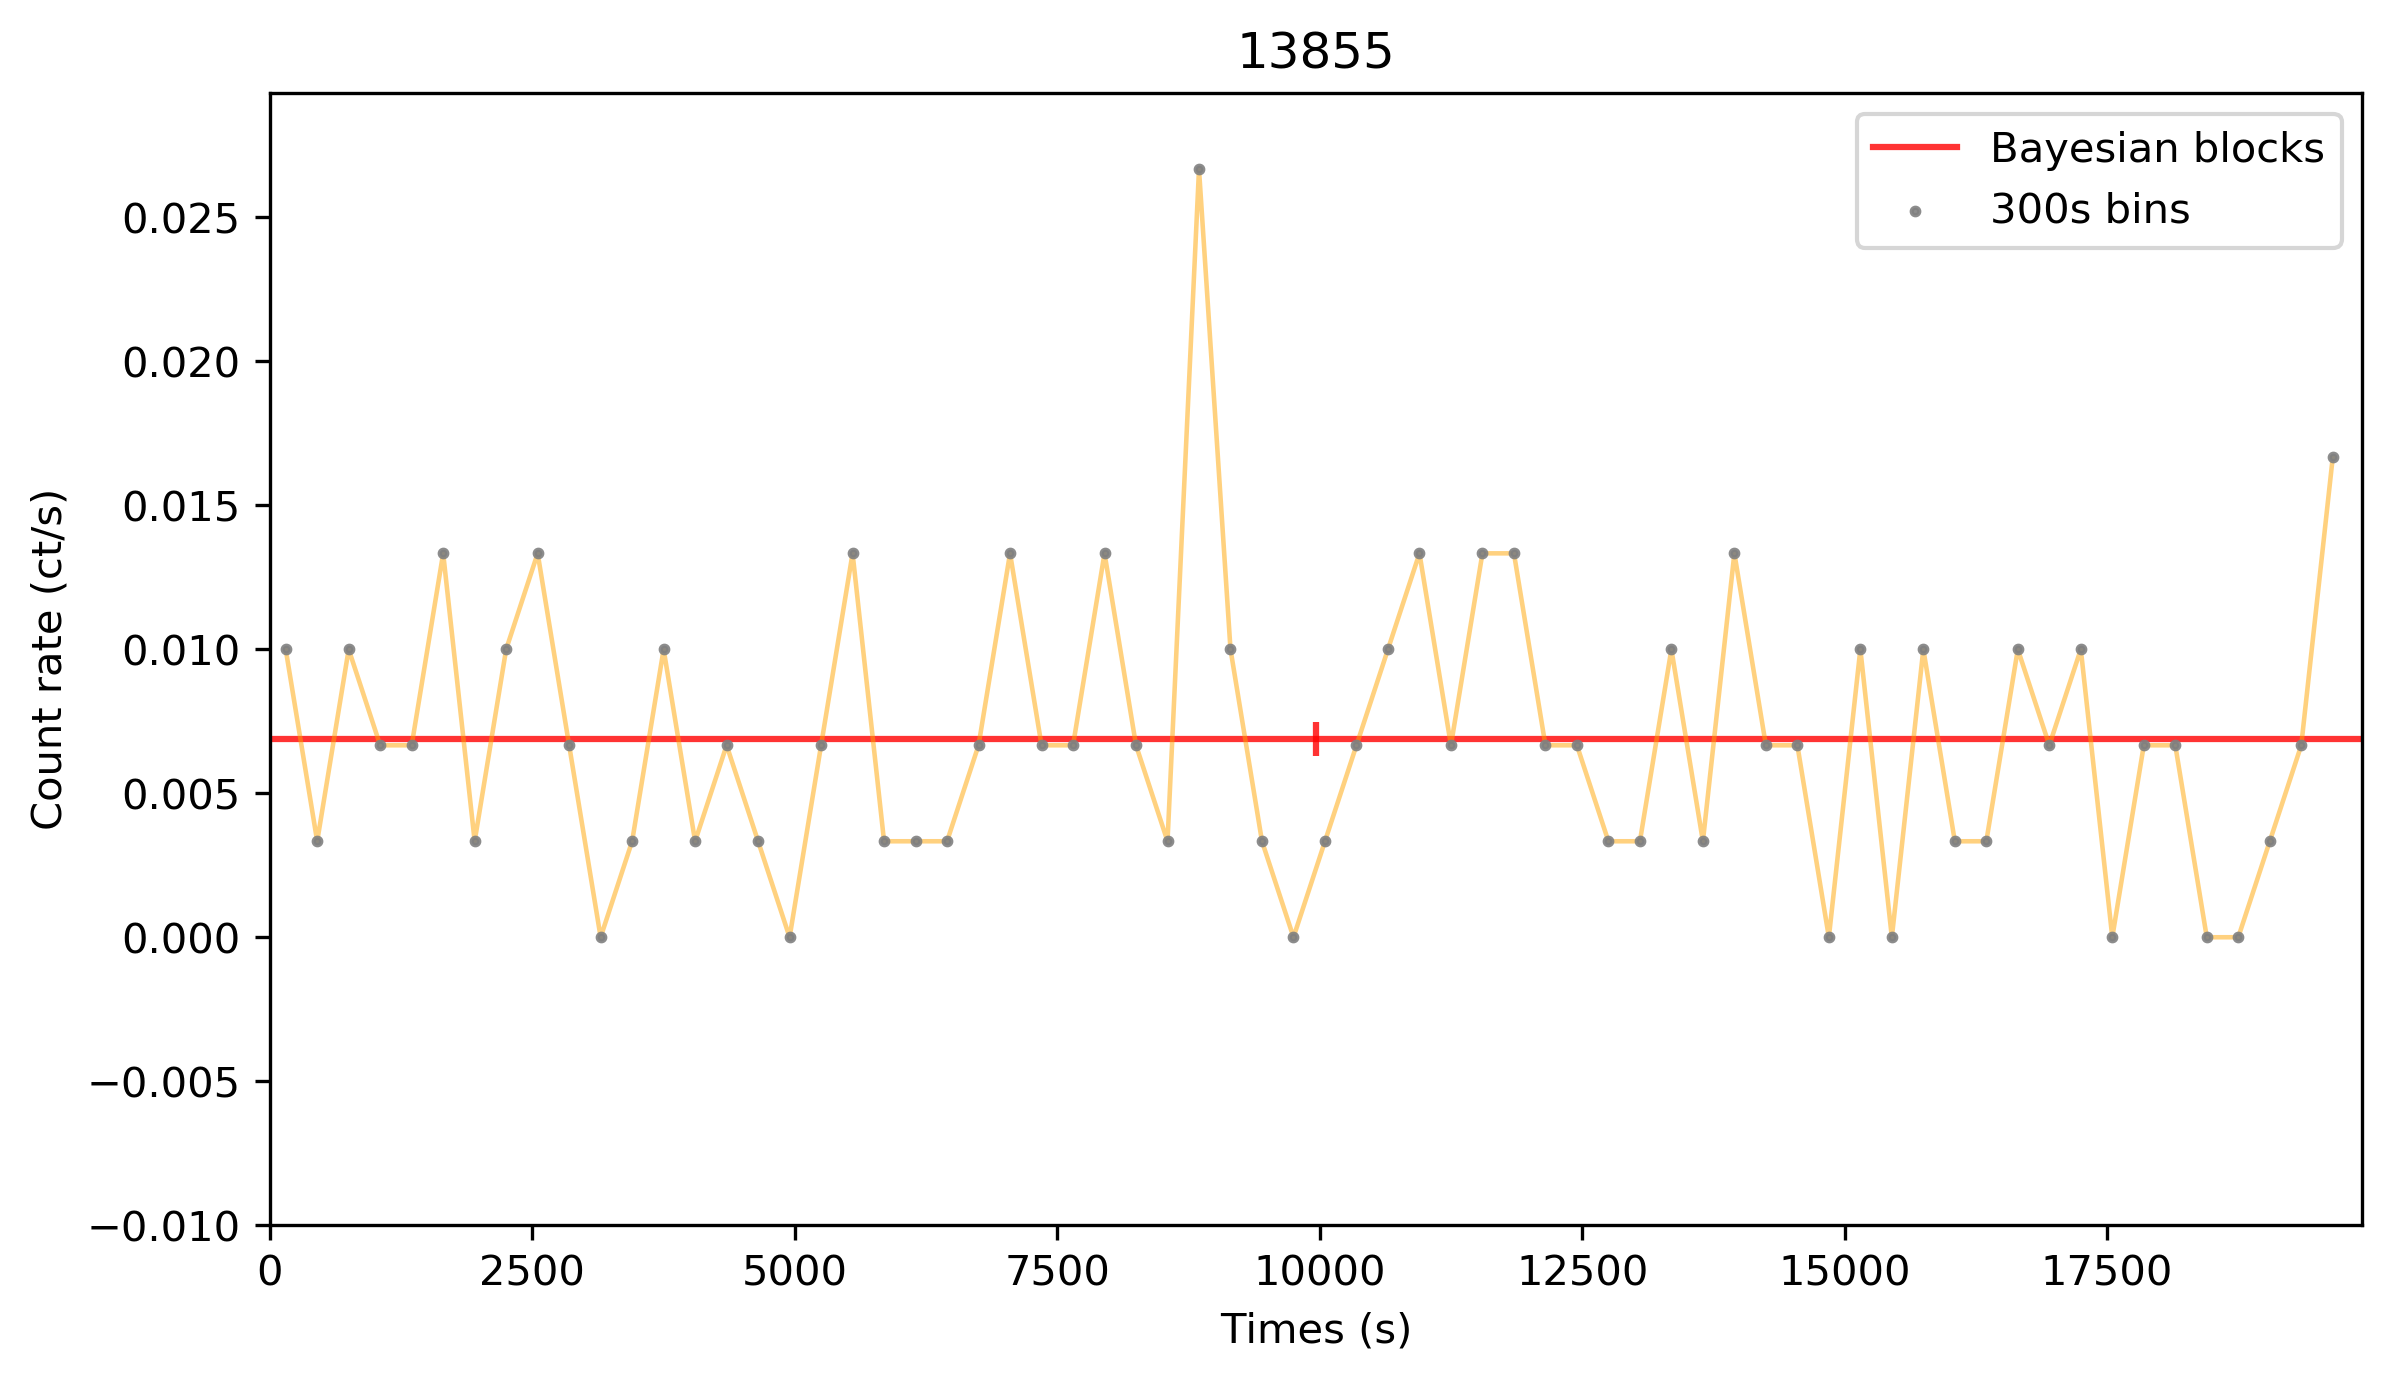

ObsID:  14413 
 Max count rate = : 0.0166666666667


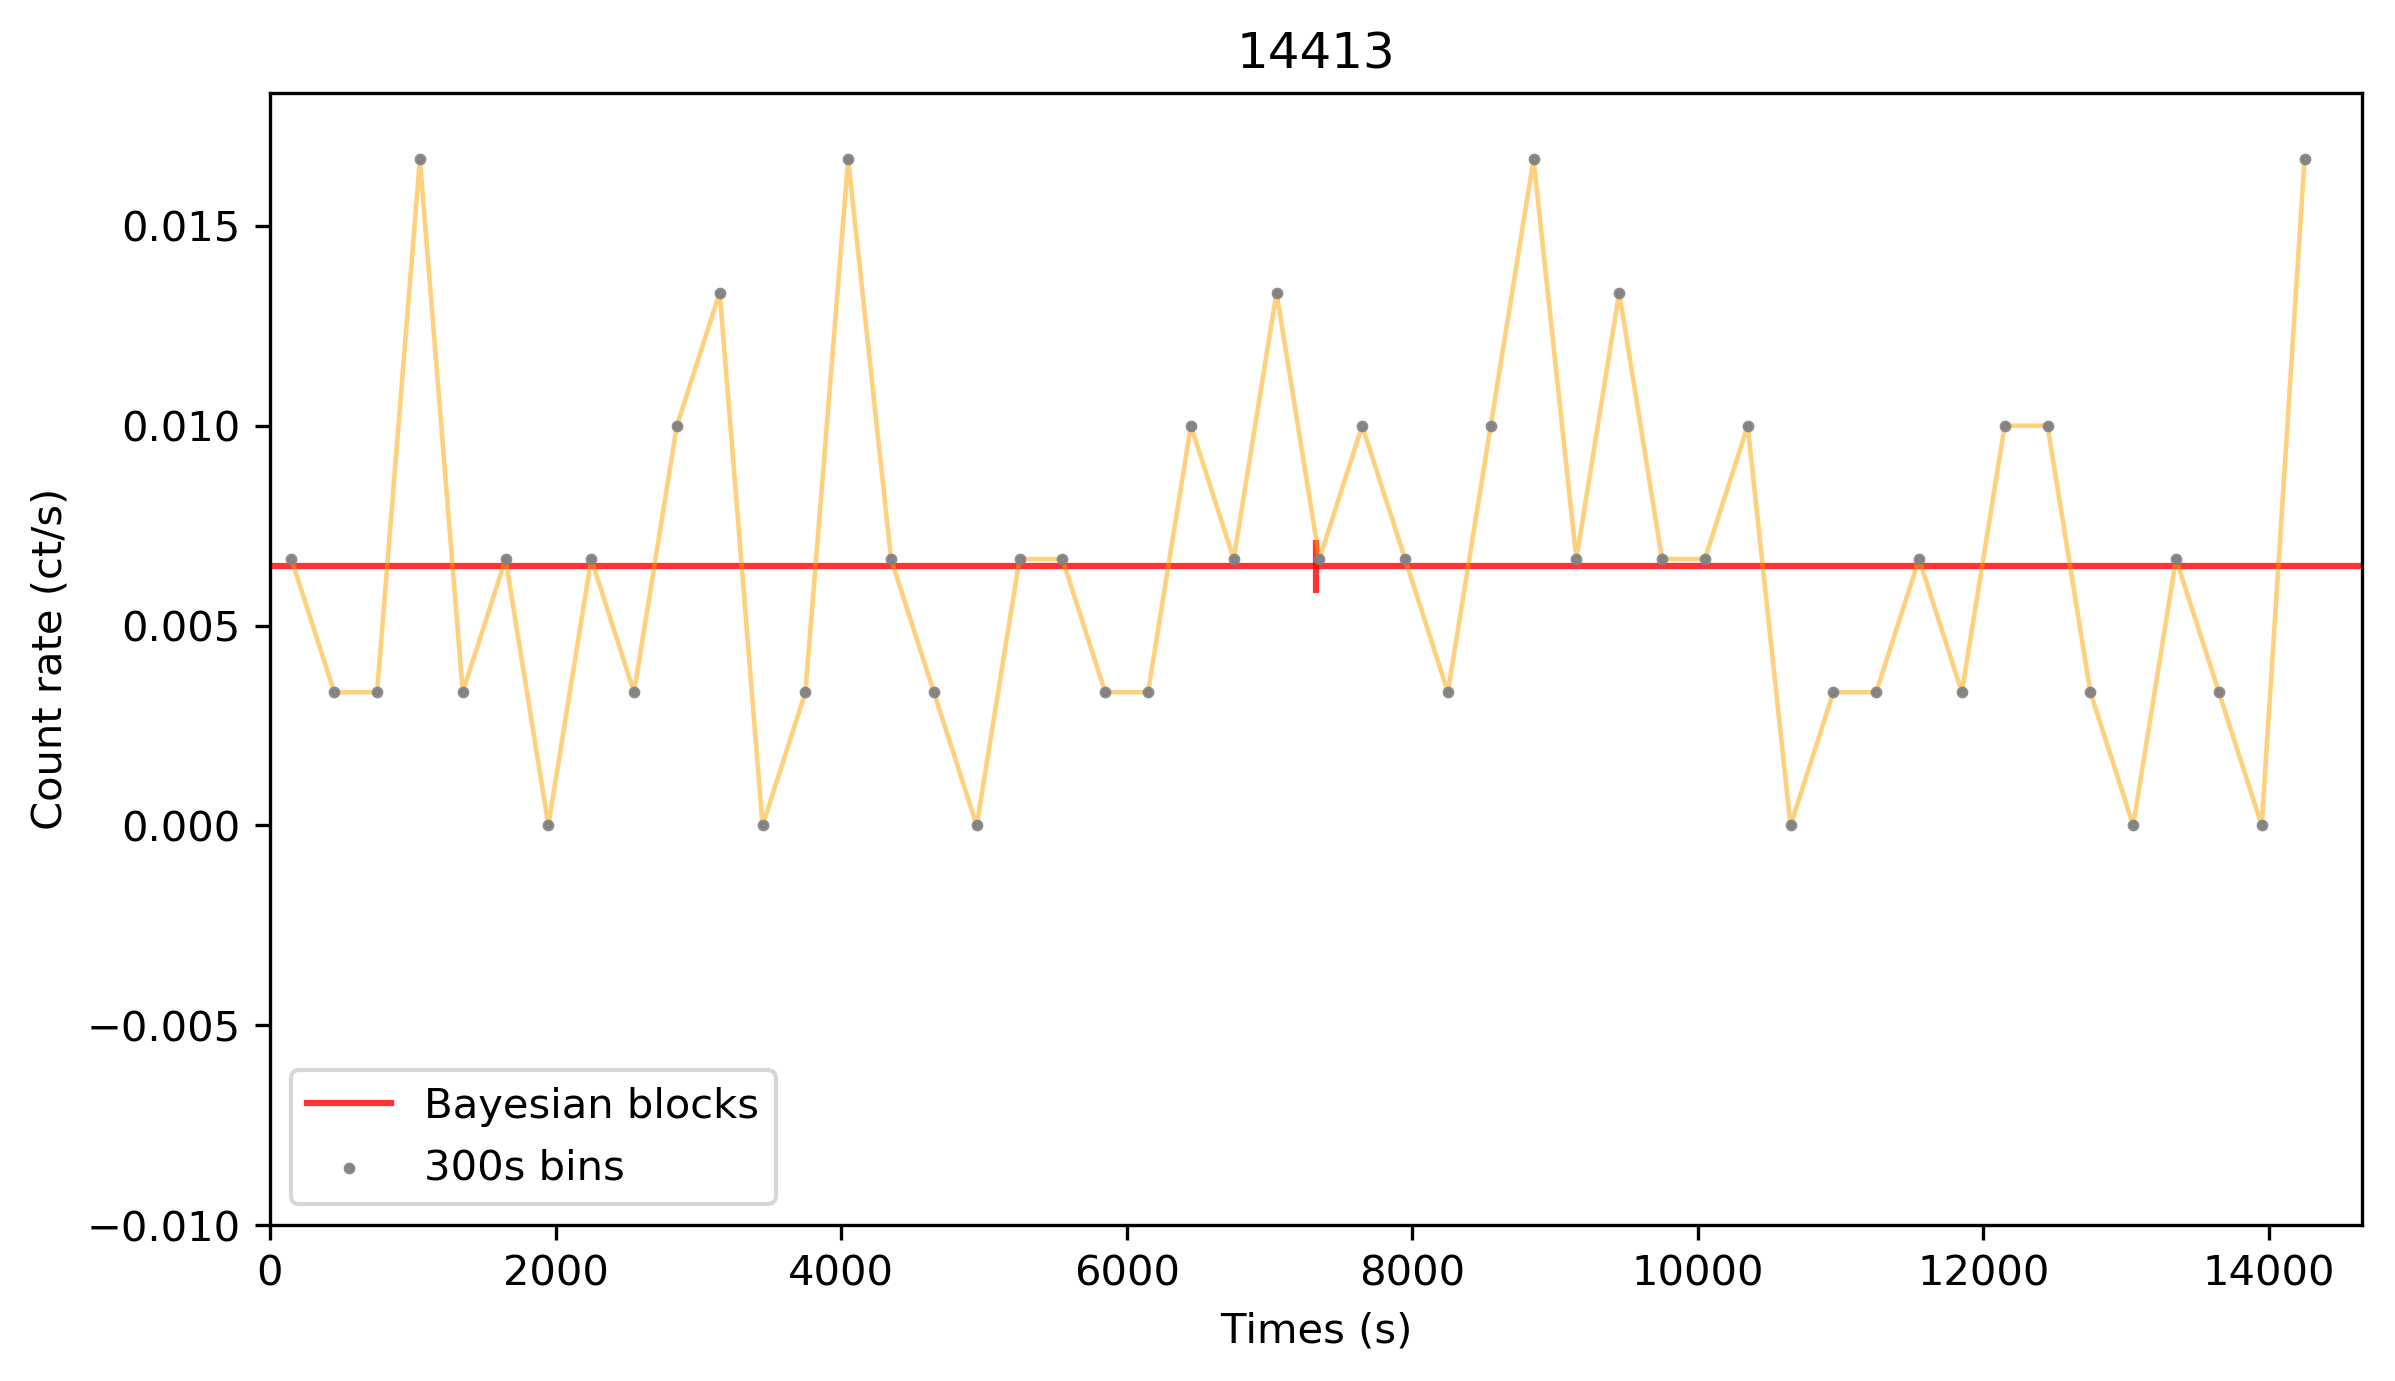

ObsID:  14414 
 Max count rate = : 0.02


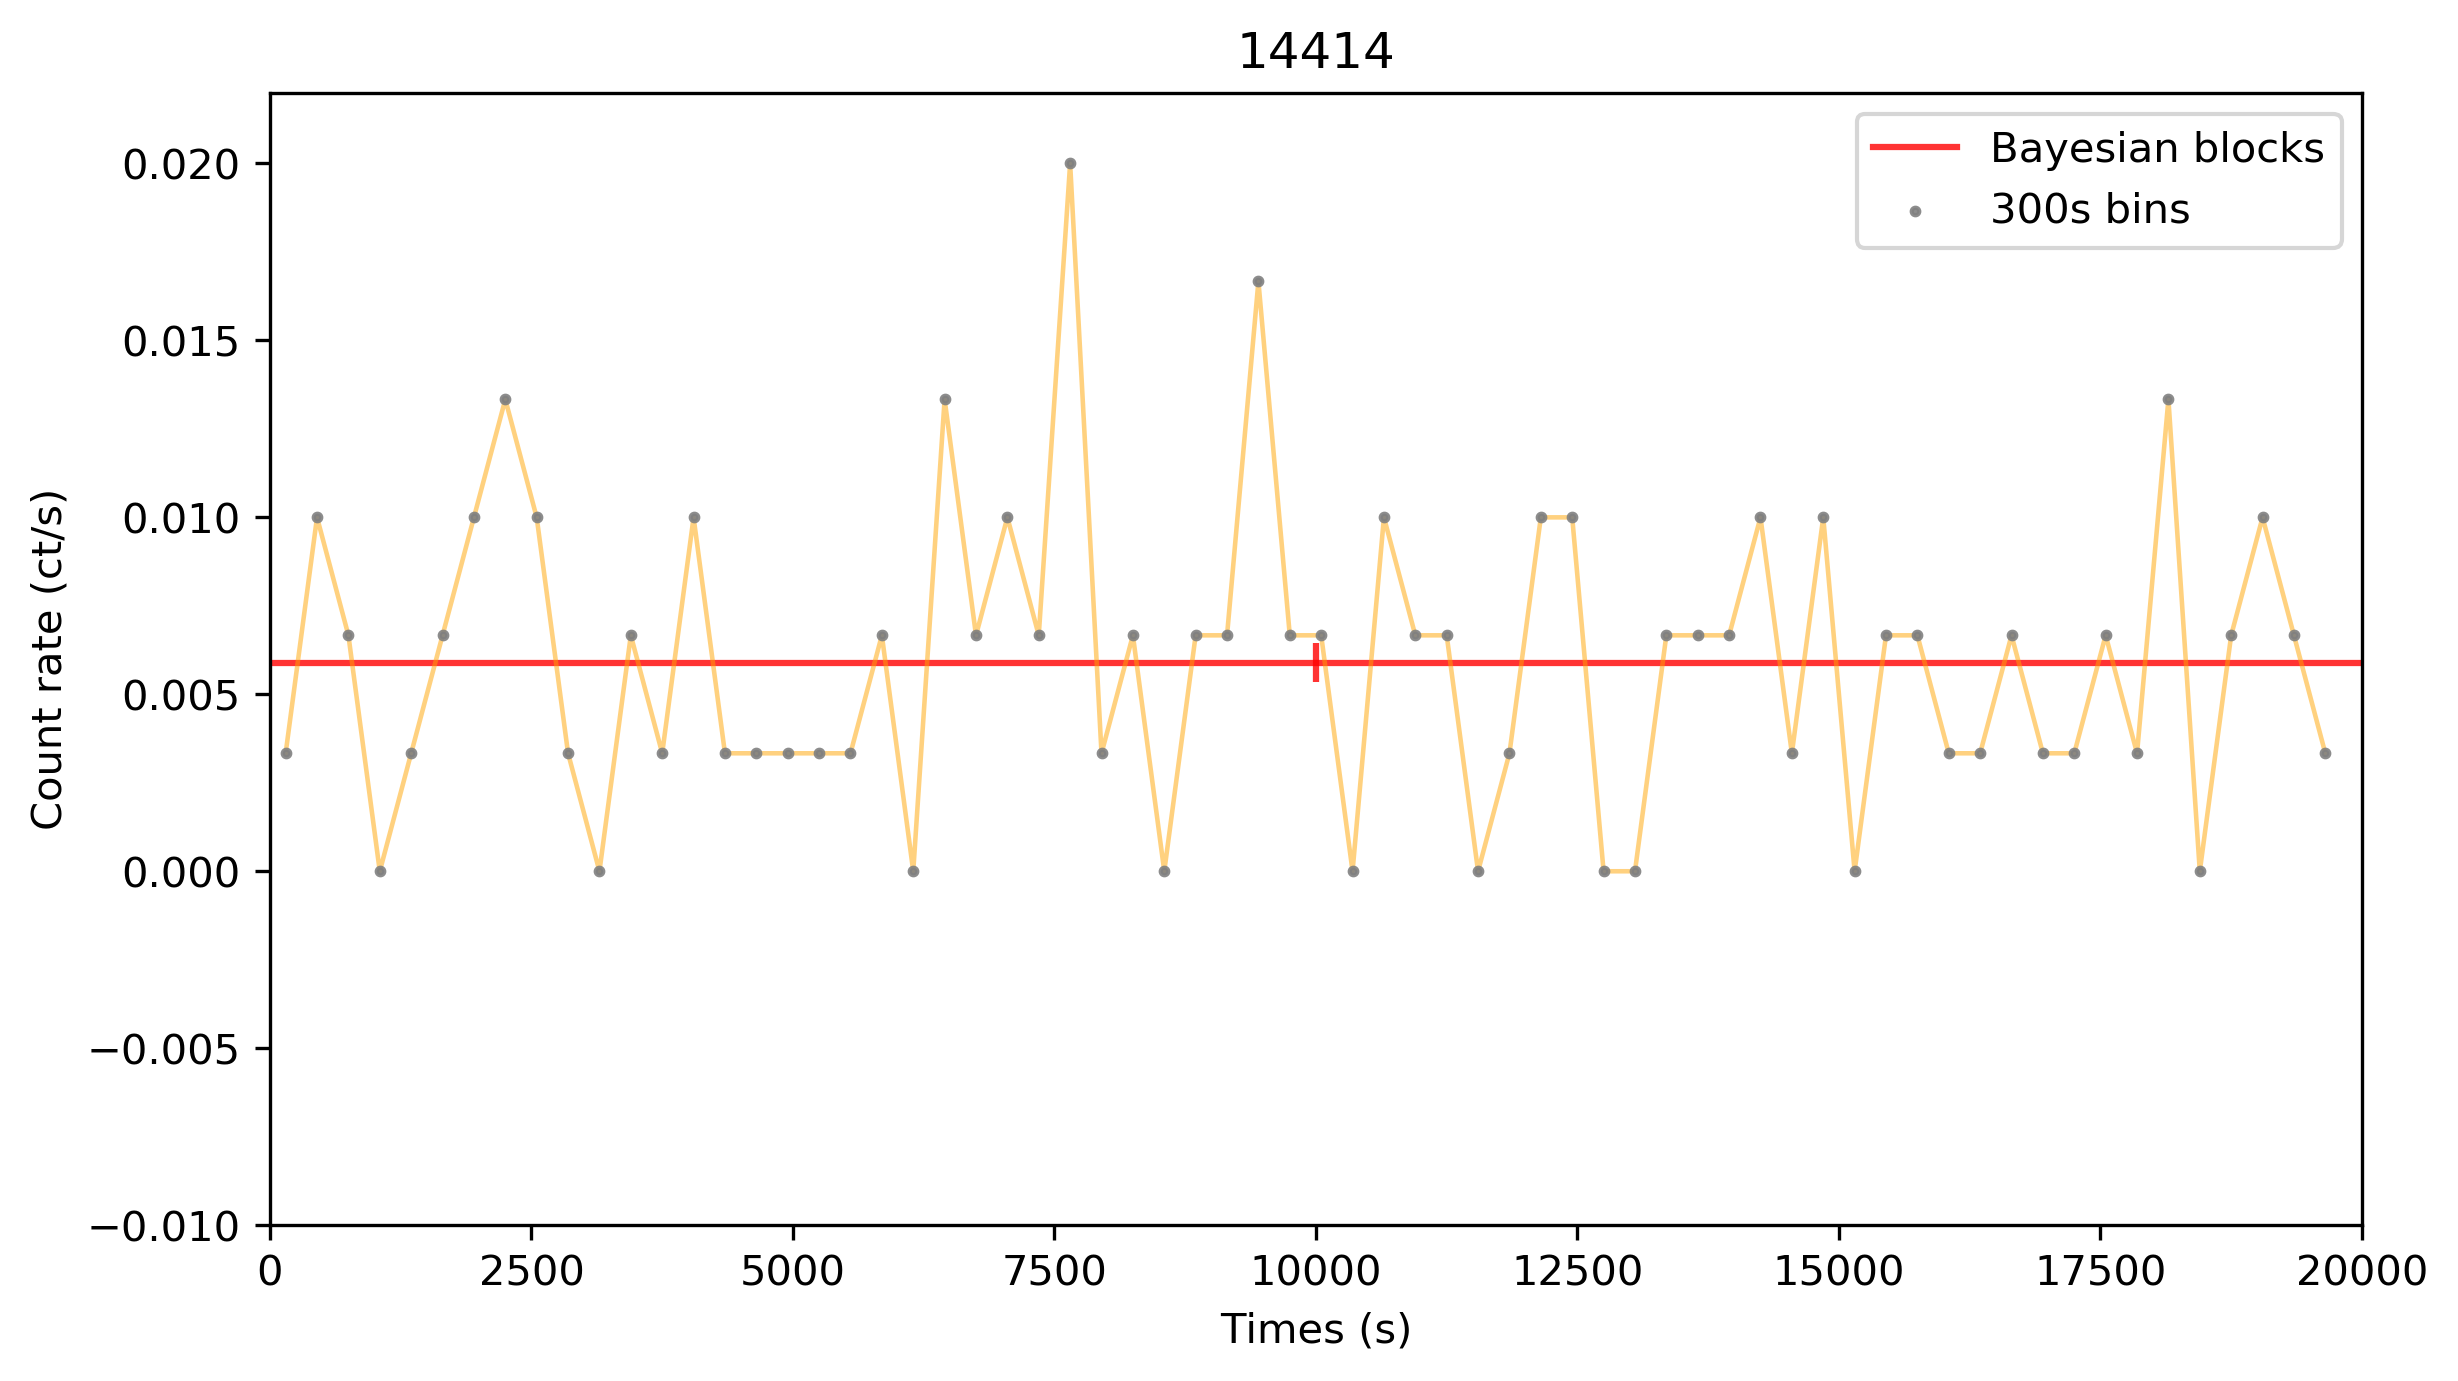

fff [ 70696.80000034]
ObsID:  13847 
 Max count rate = : 0.04


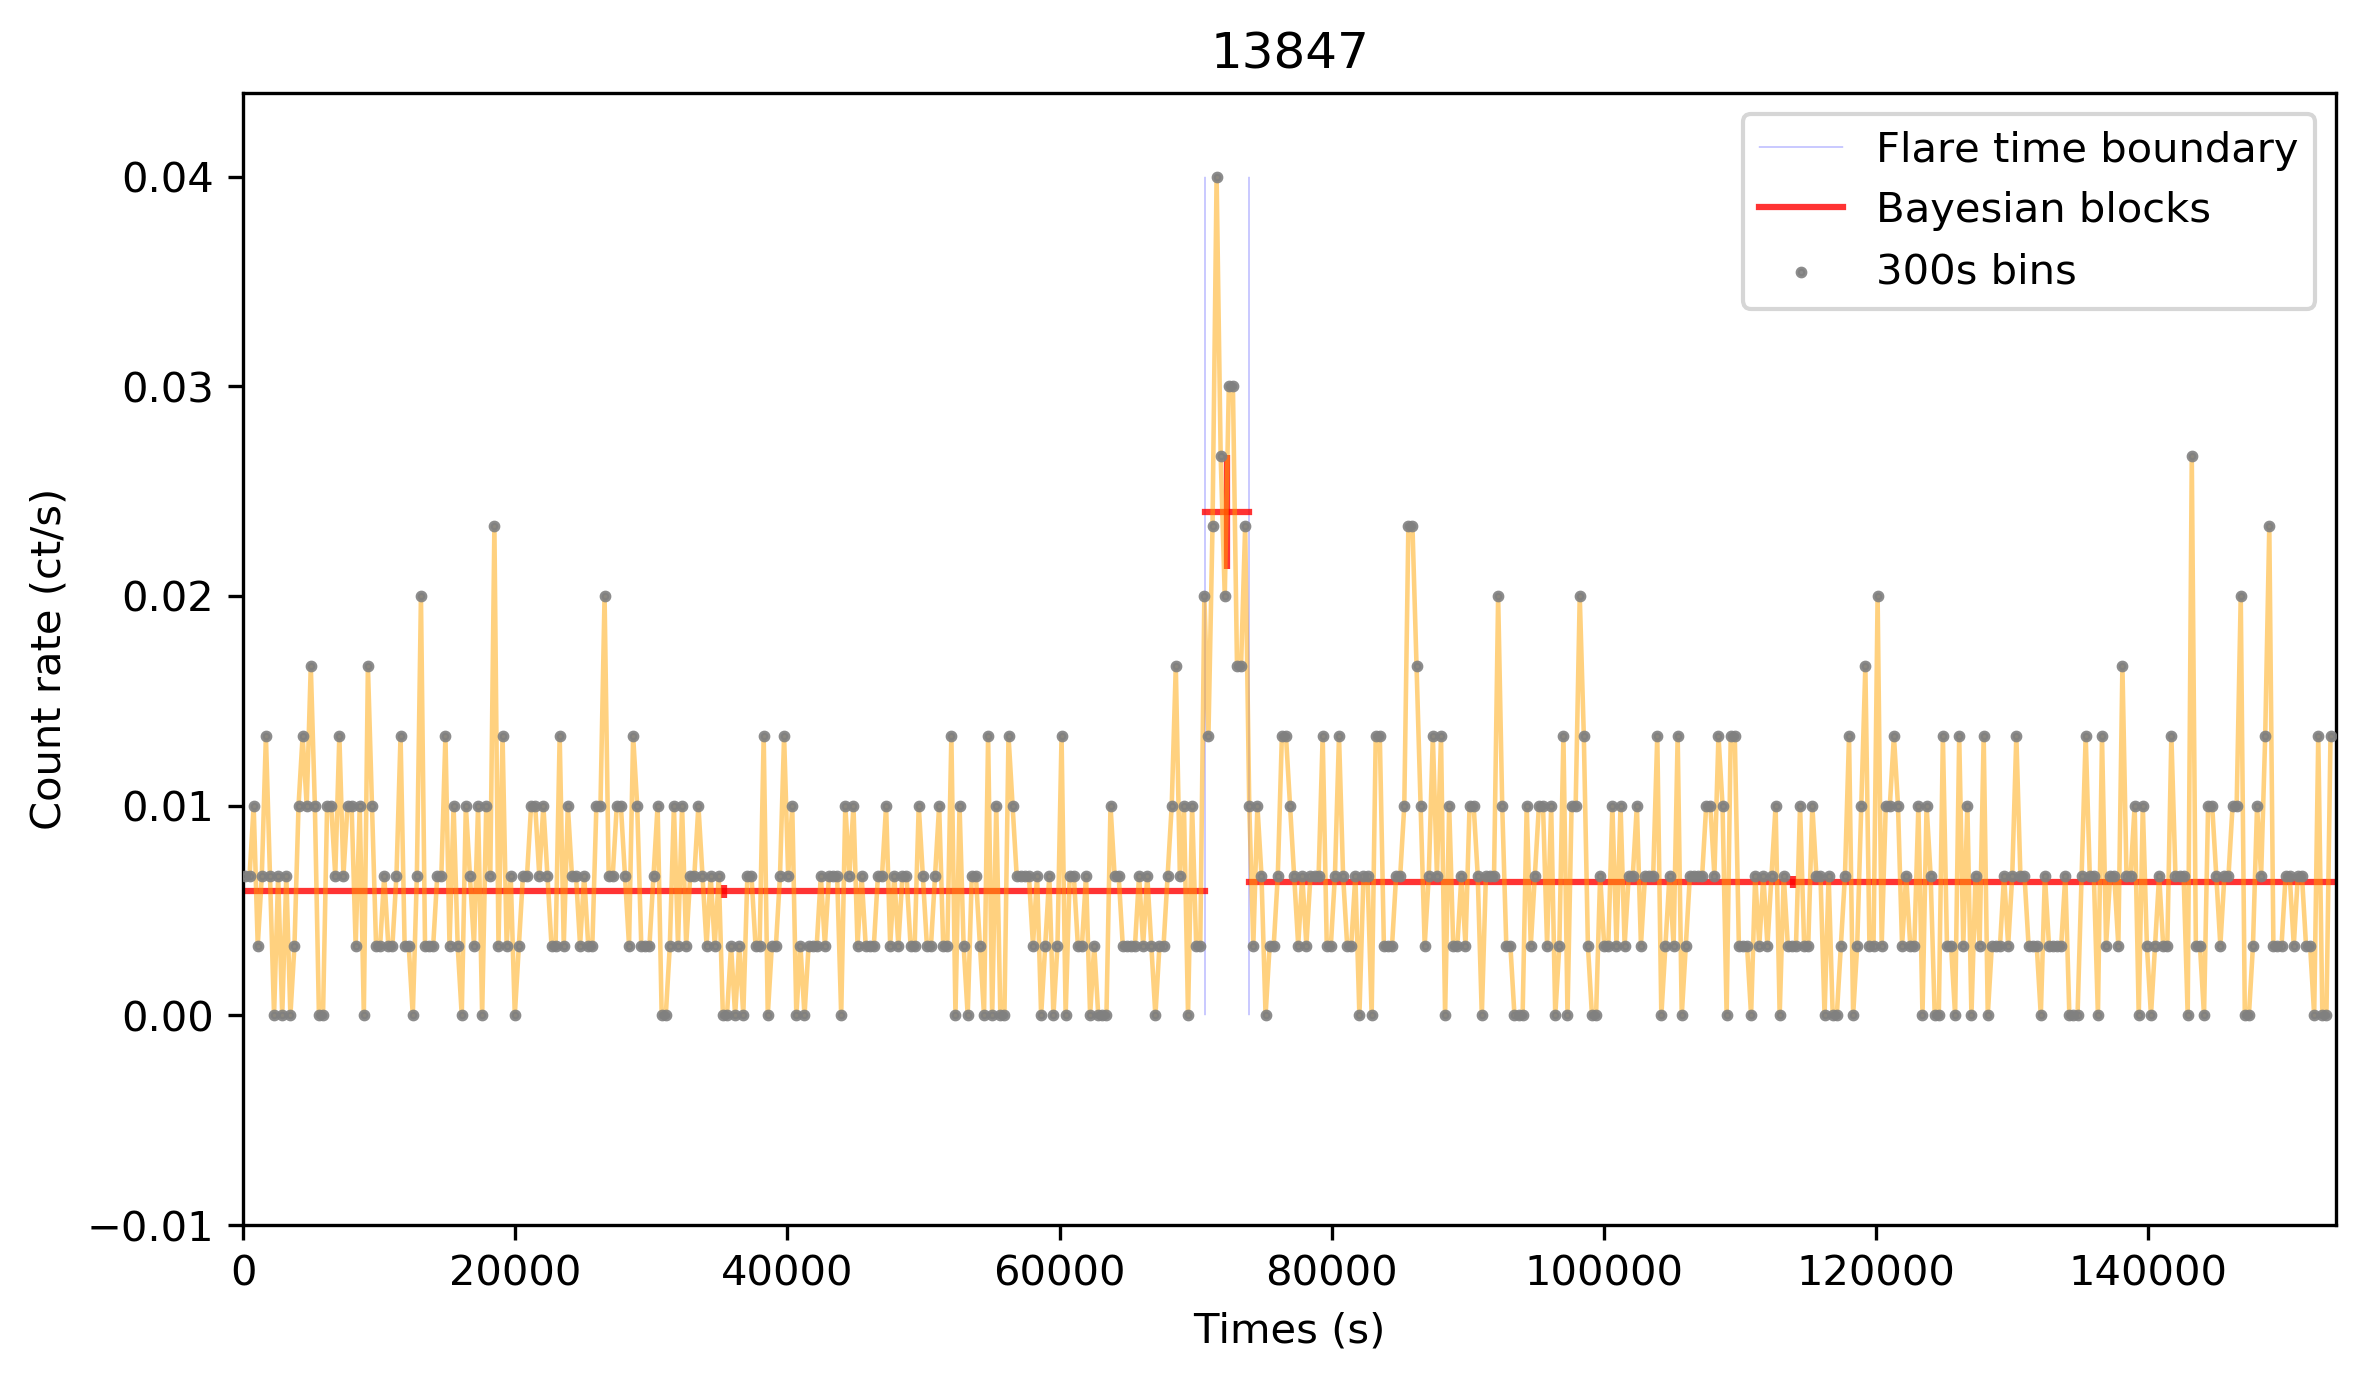

fff [ 21427.19999996  53479.87199994]
ObsID:  14427 
 Max count rate = : 0.0366666666667


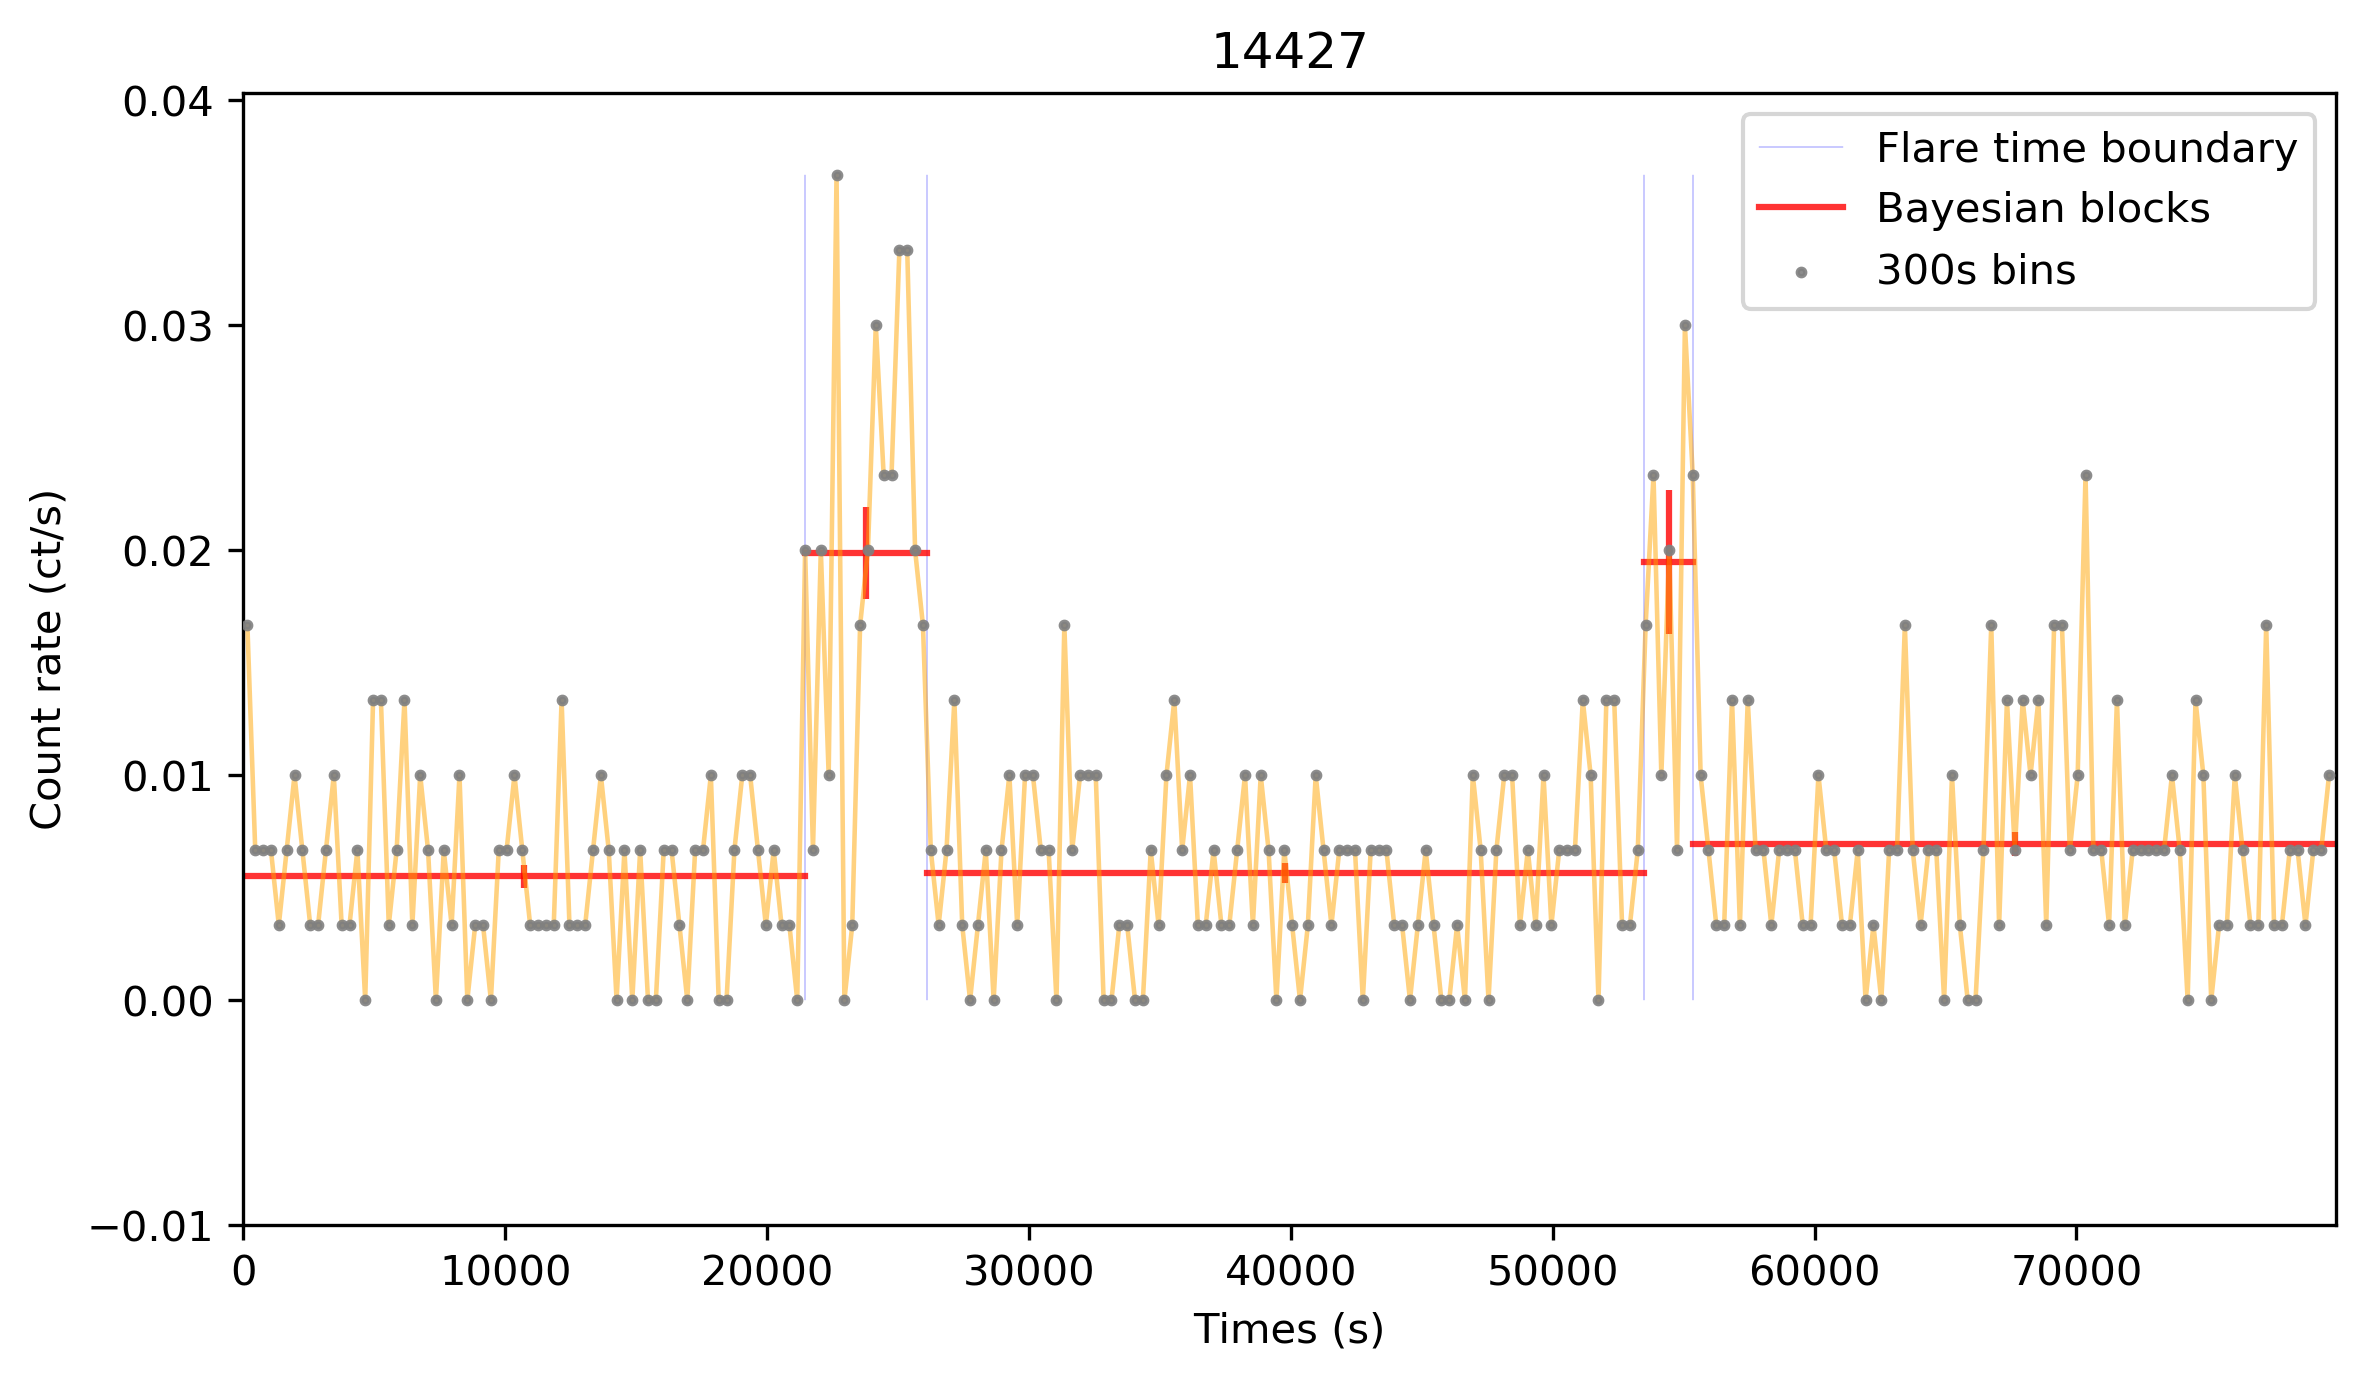

ObsID:  13848 
 Max count rate = : 0.03


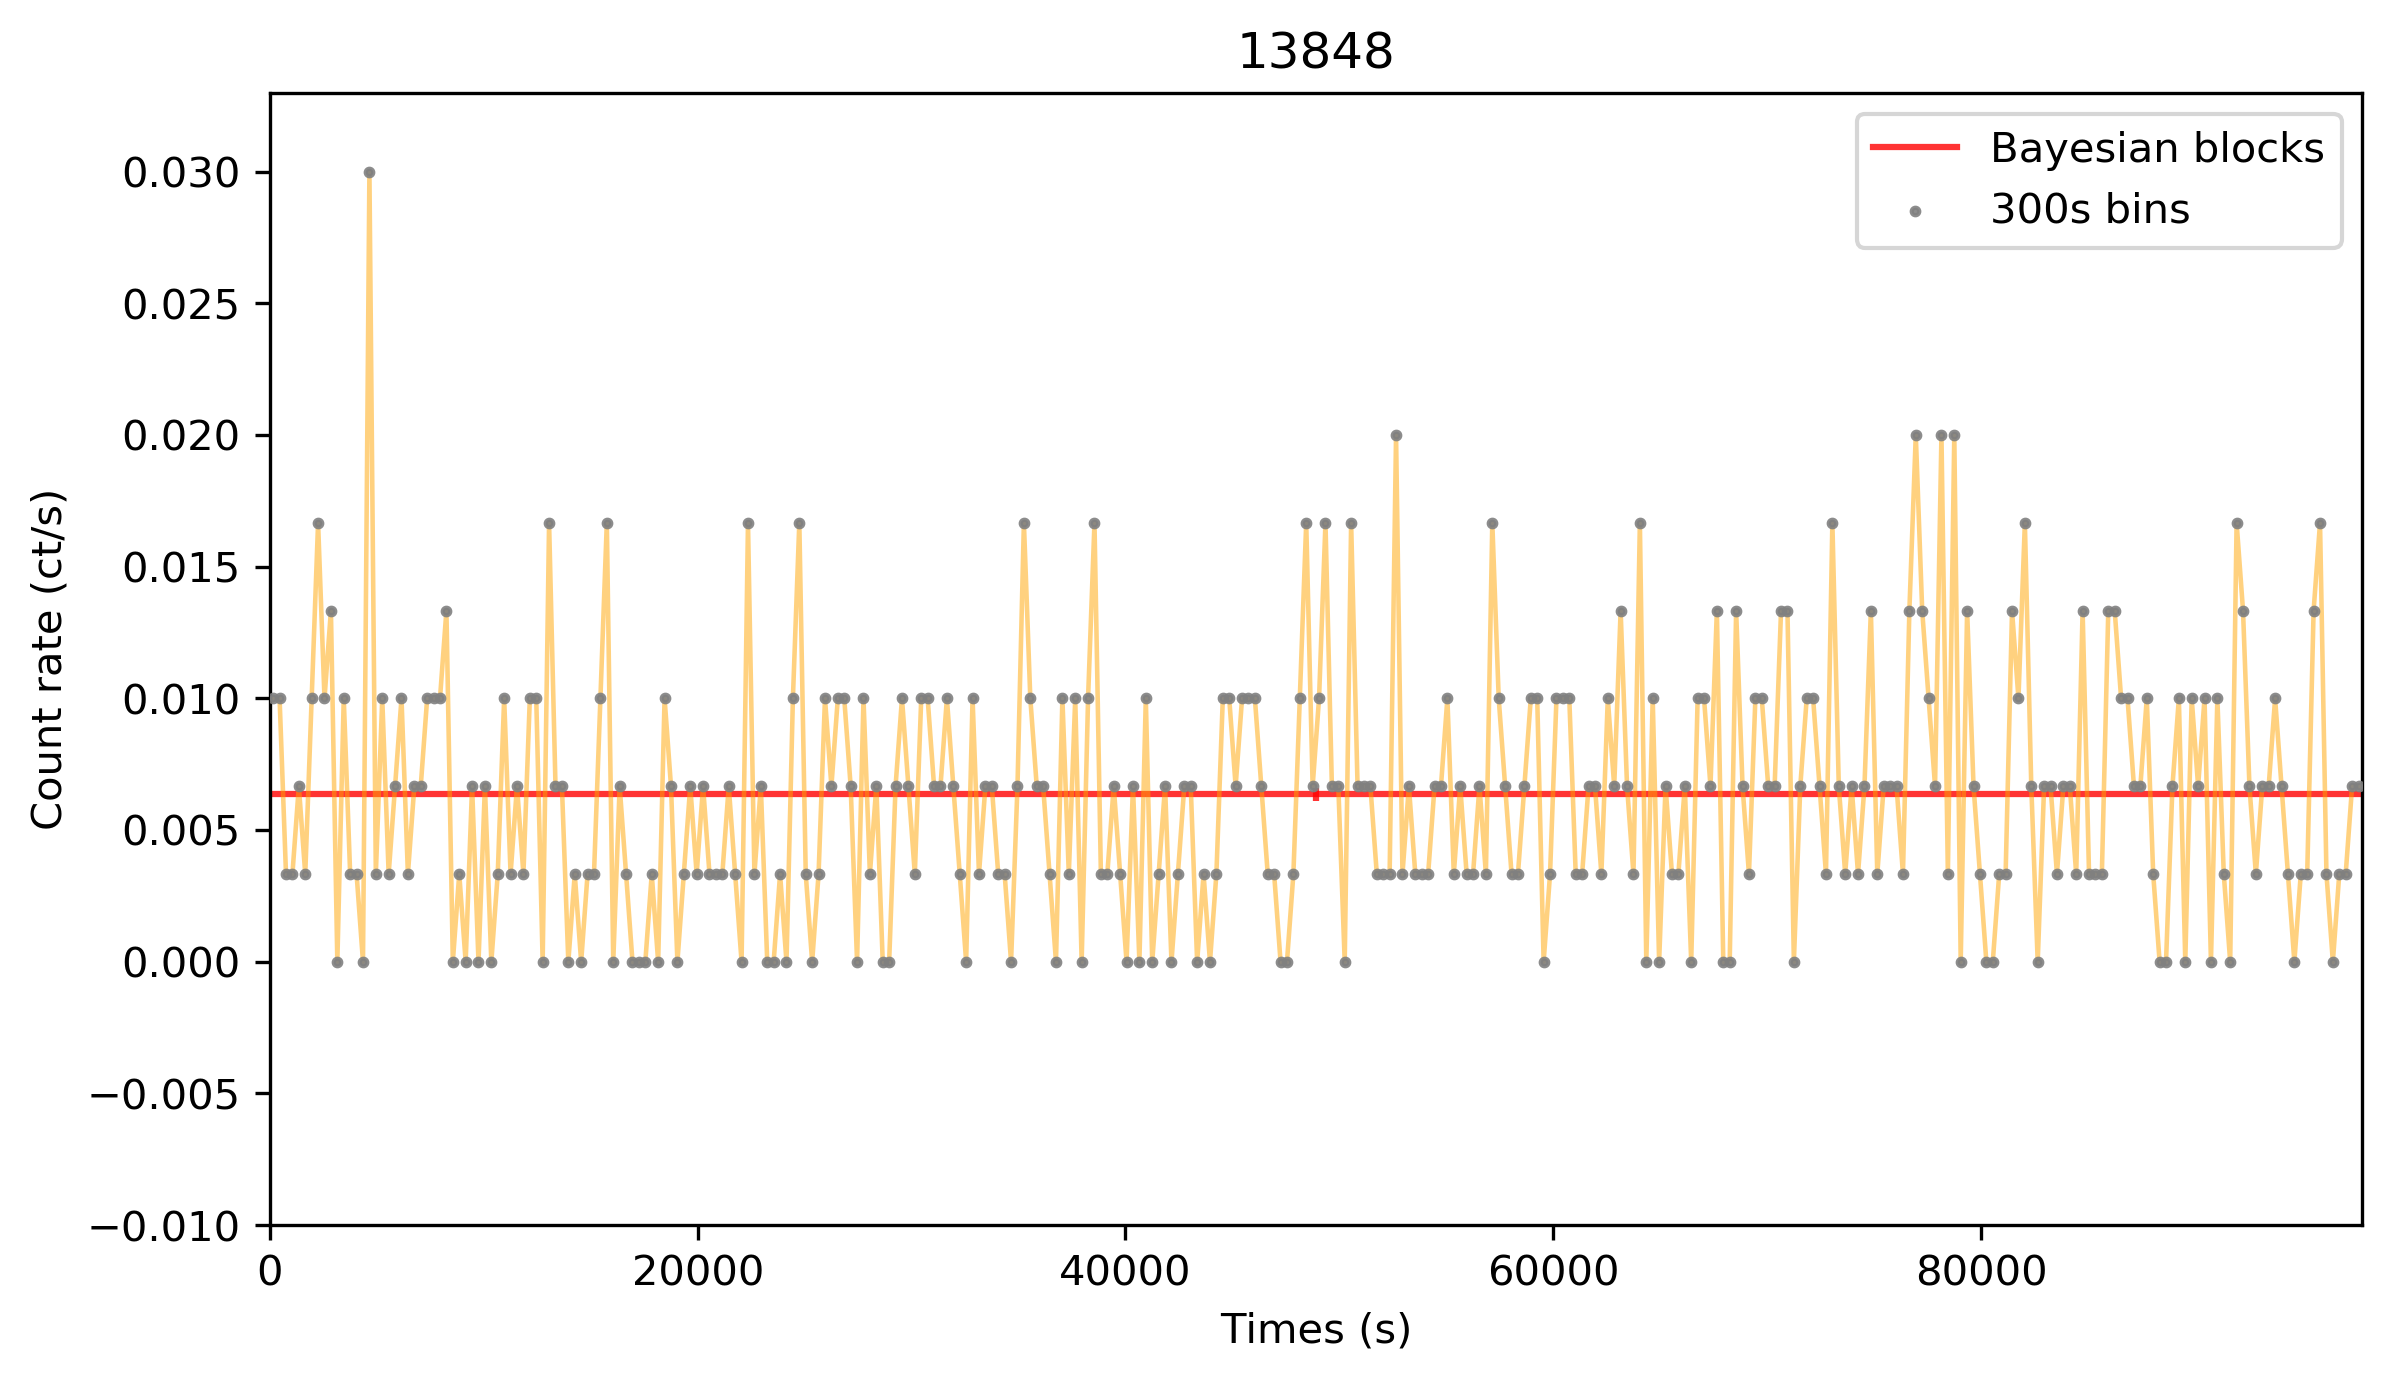

fff [  45984.67200038   73416.67200015   99998.49600003  171026.20799986]
ObsID:  13849 
 Max count rate = : 0.0733333333333


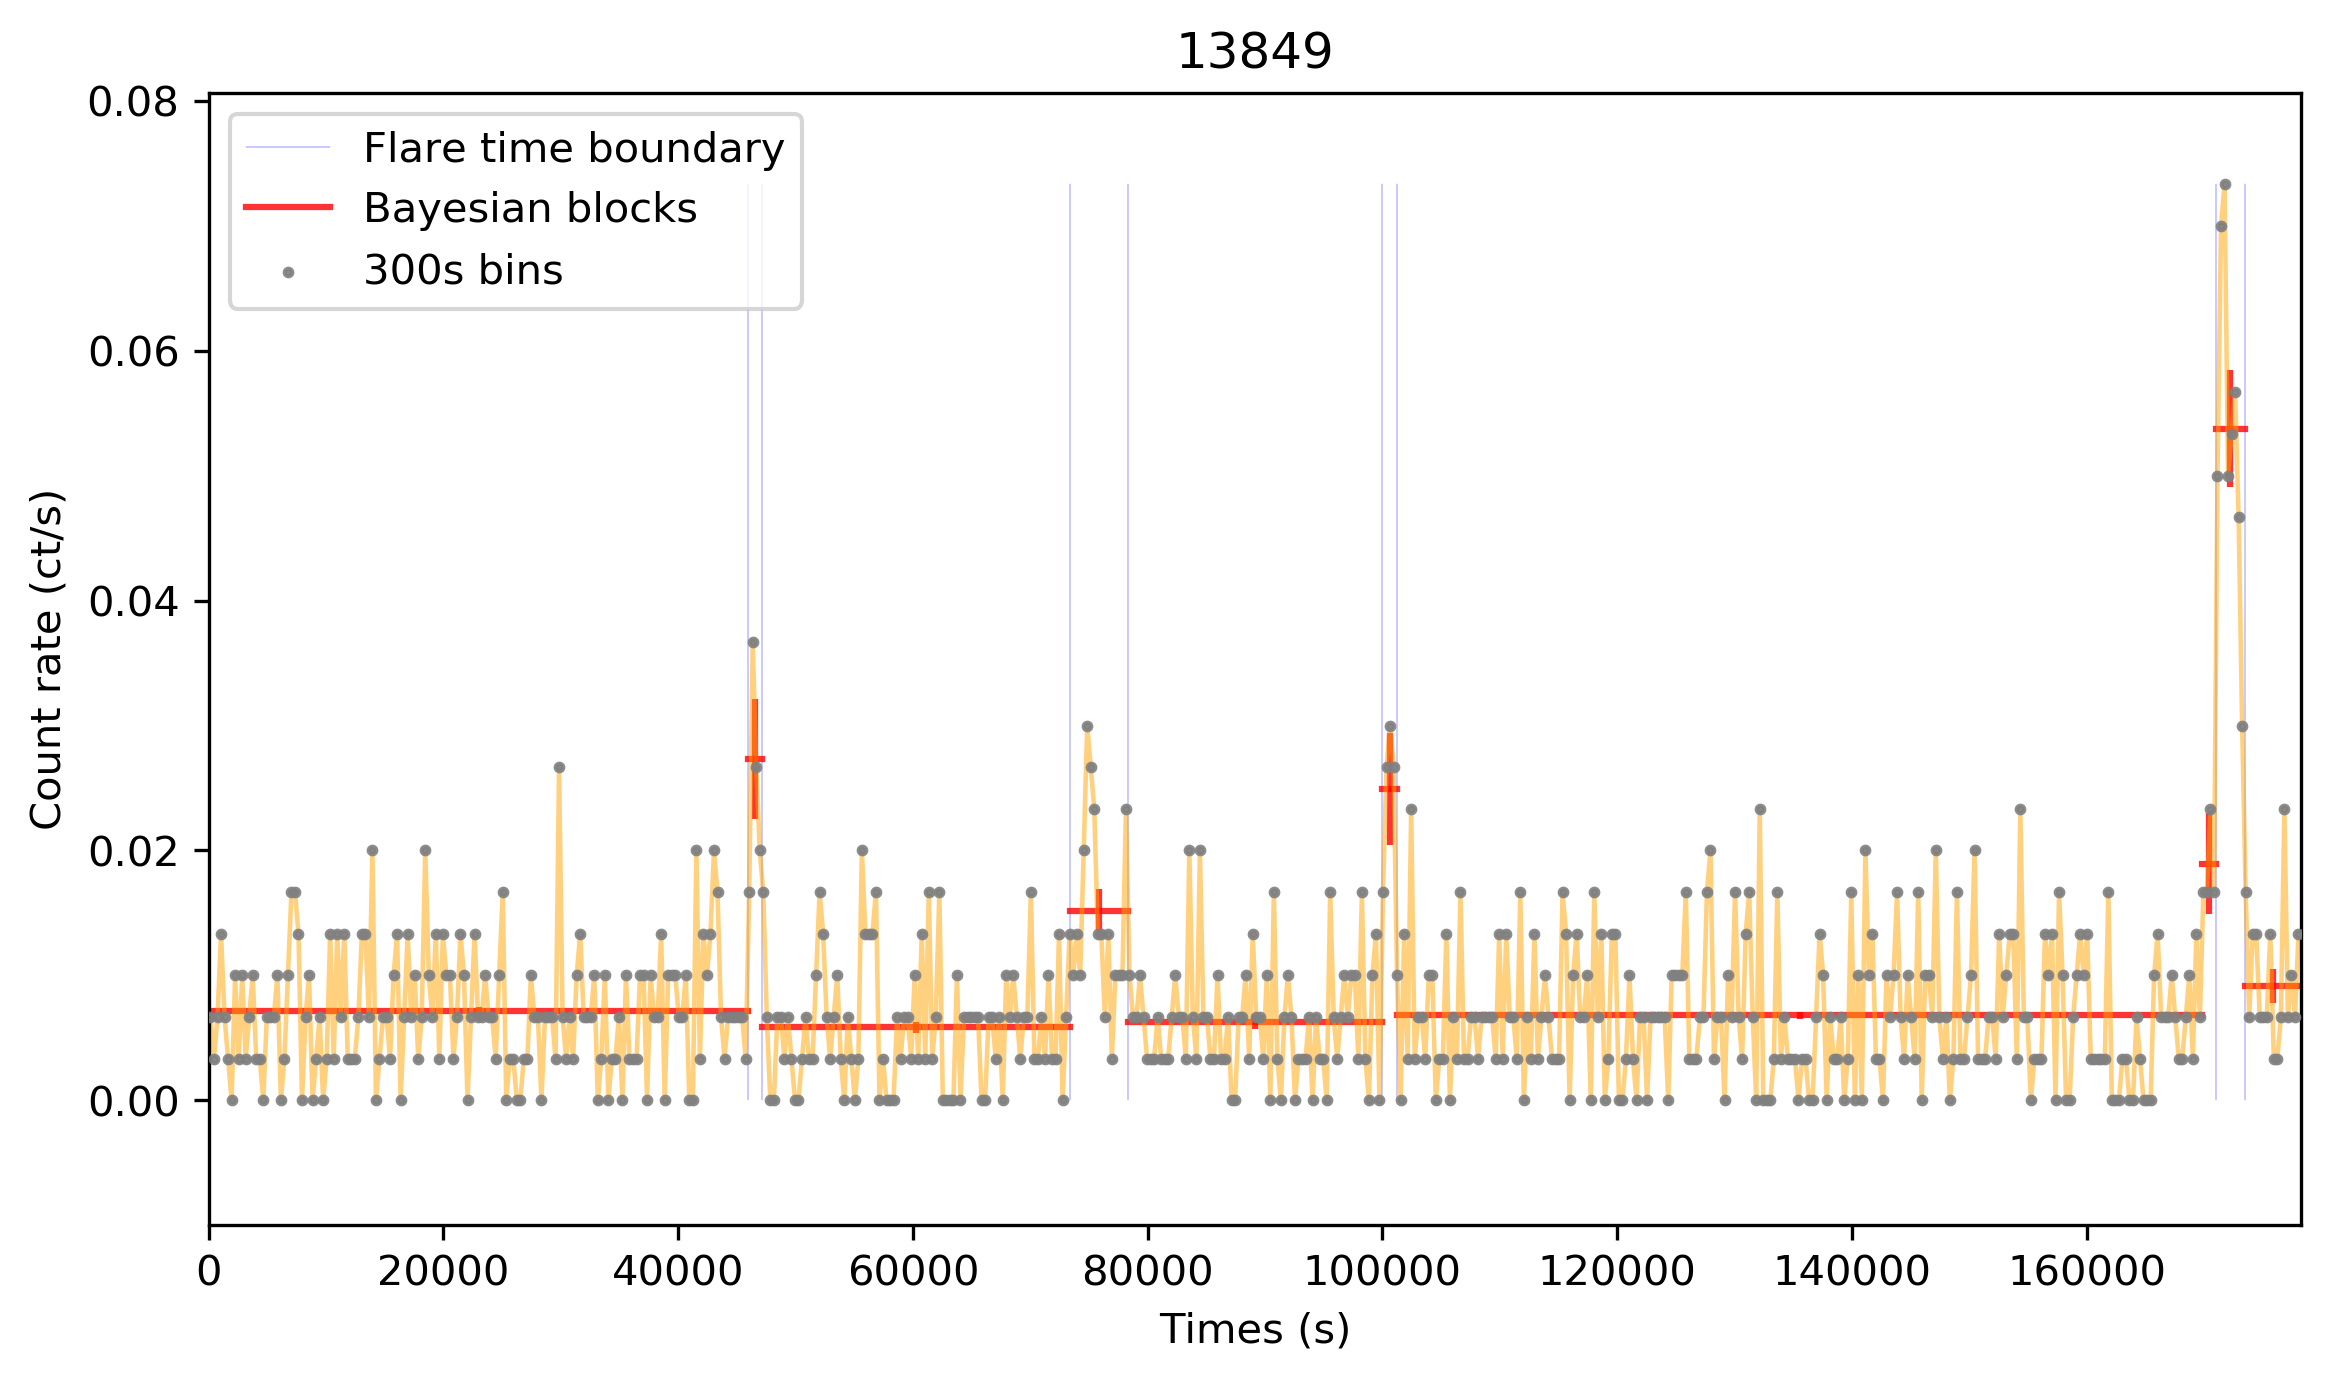

ObsID:  13846 
 Max count rate = : 0.0266666666667


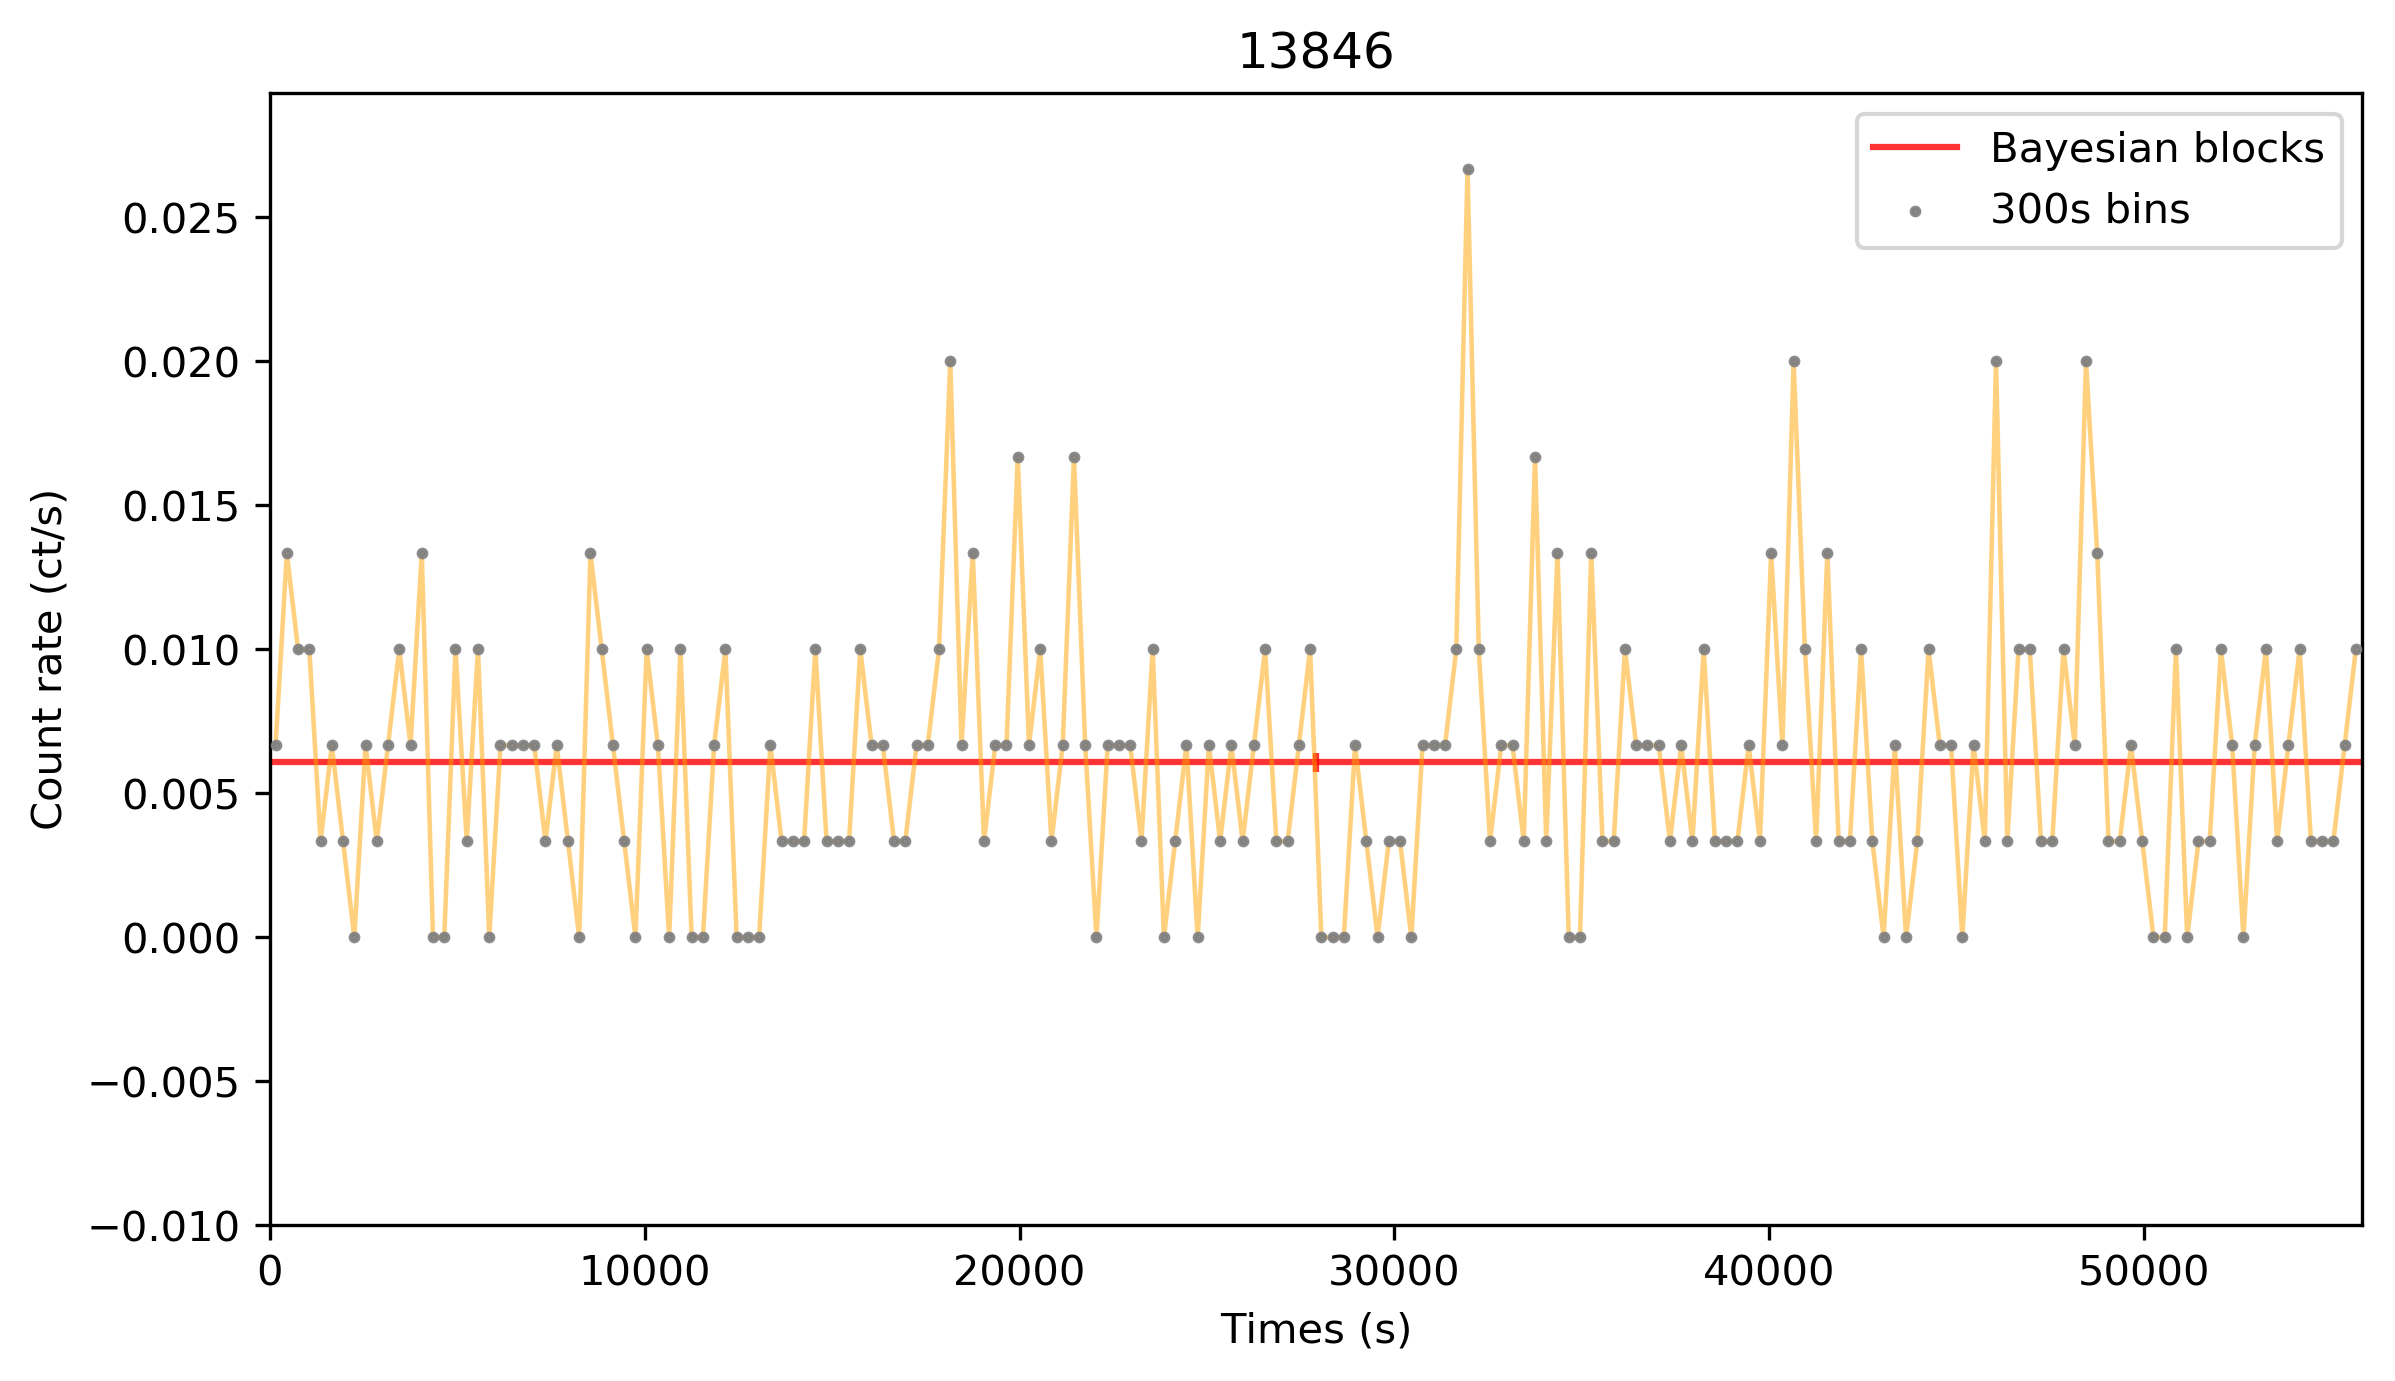

ObsID:  14438 
 Max count rate = : 0.0233333333333


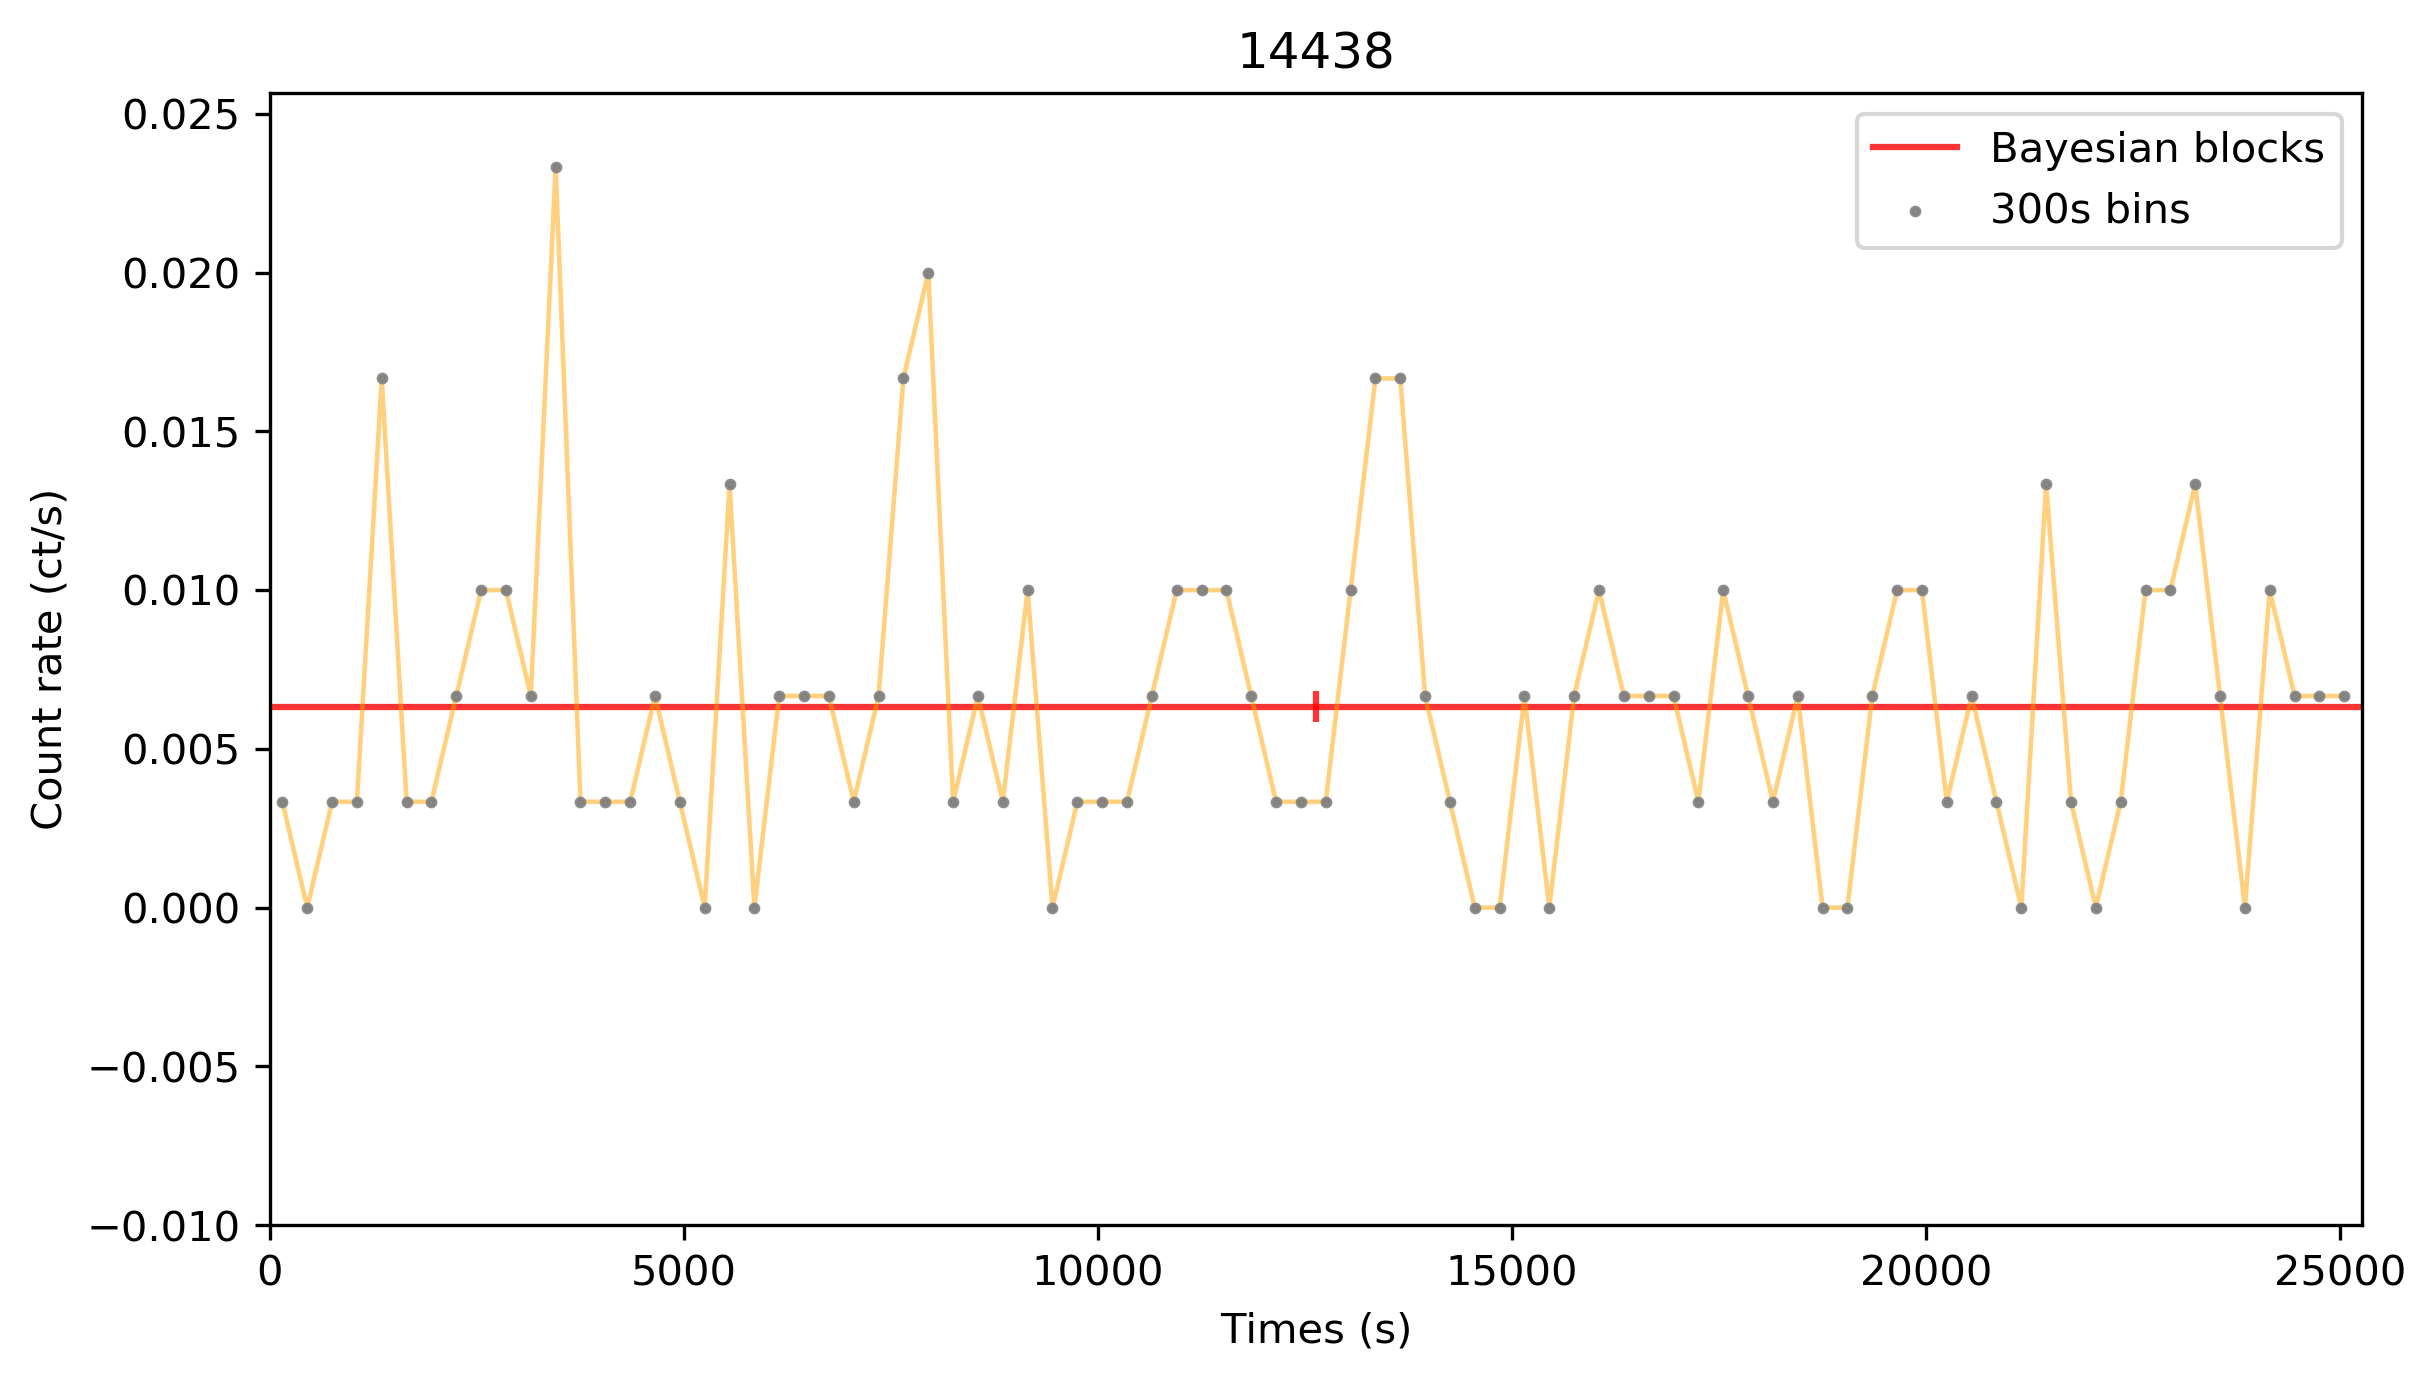

fff [   9986.97600011  121265.85599994]
ObsID:  13845 
 Max count rate = : 0.09


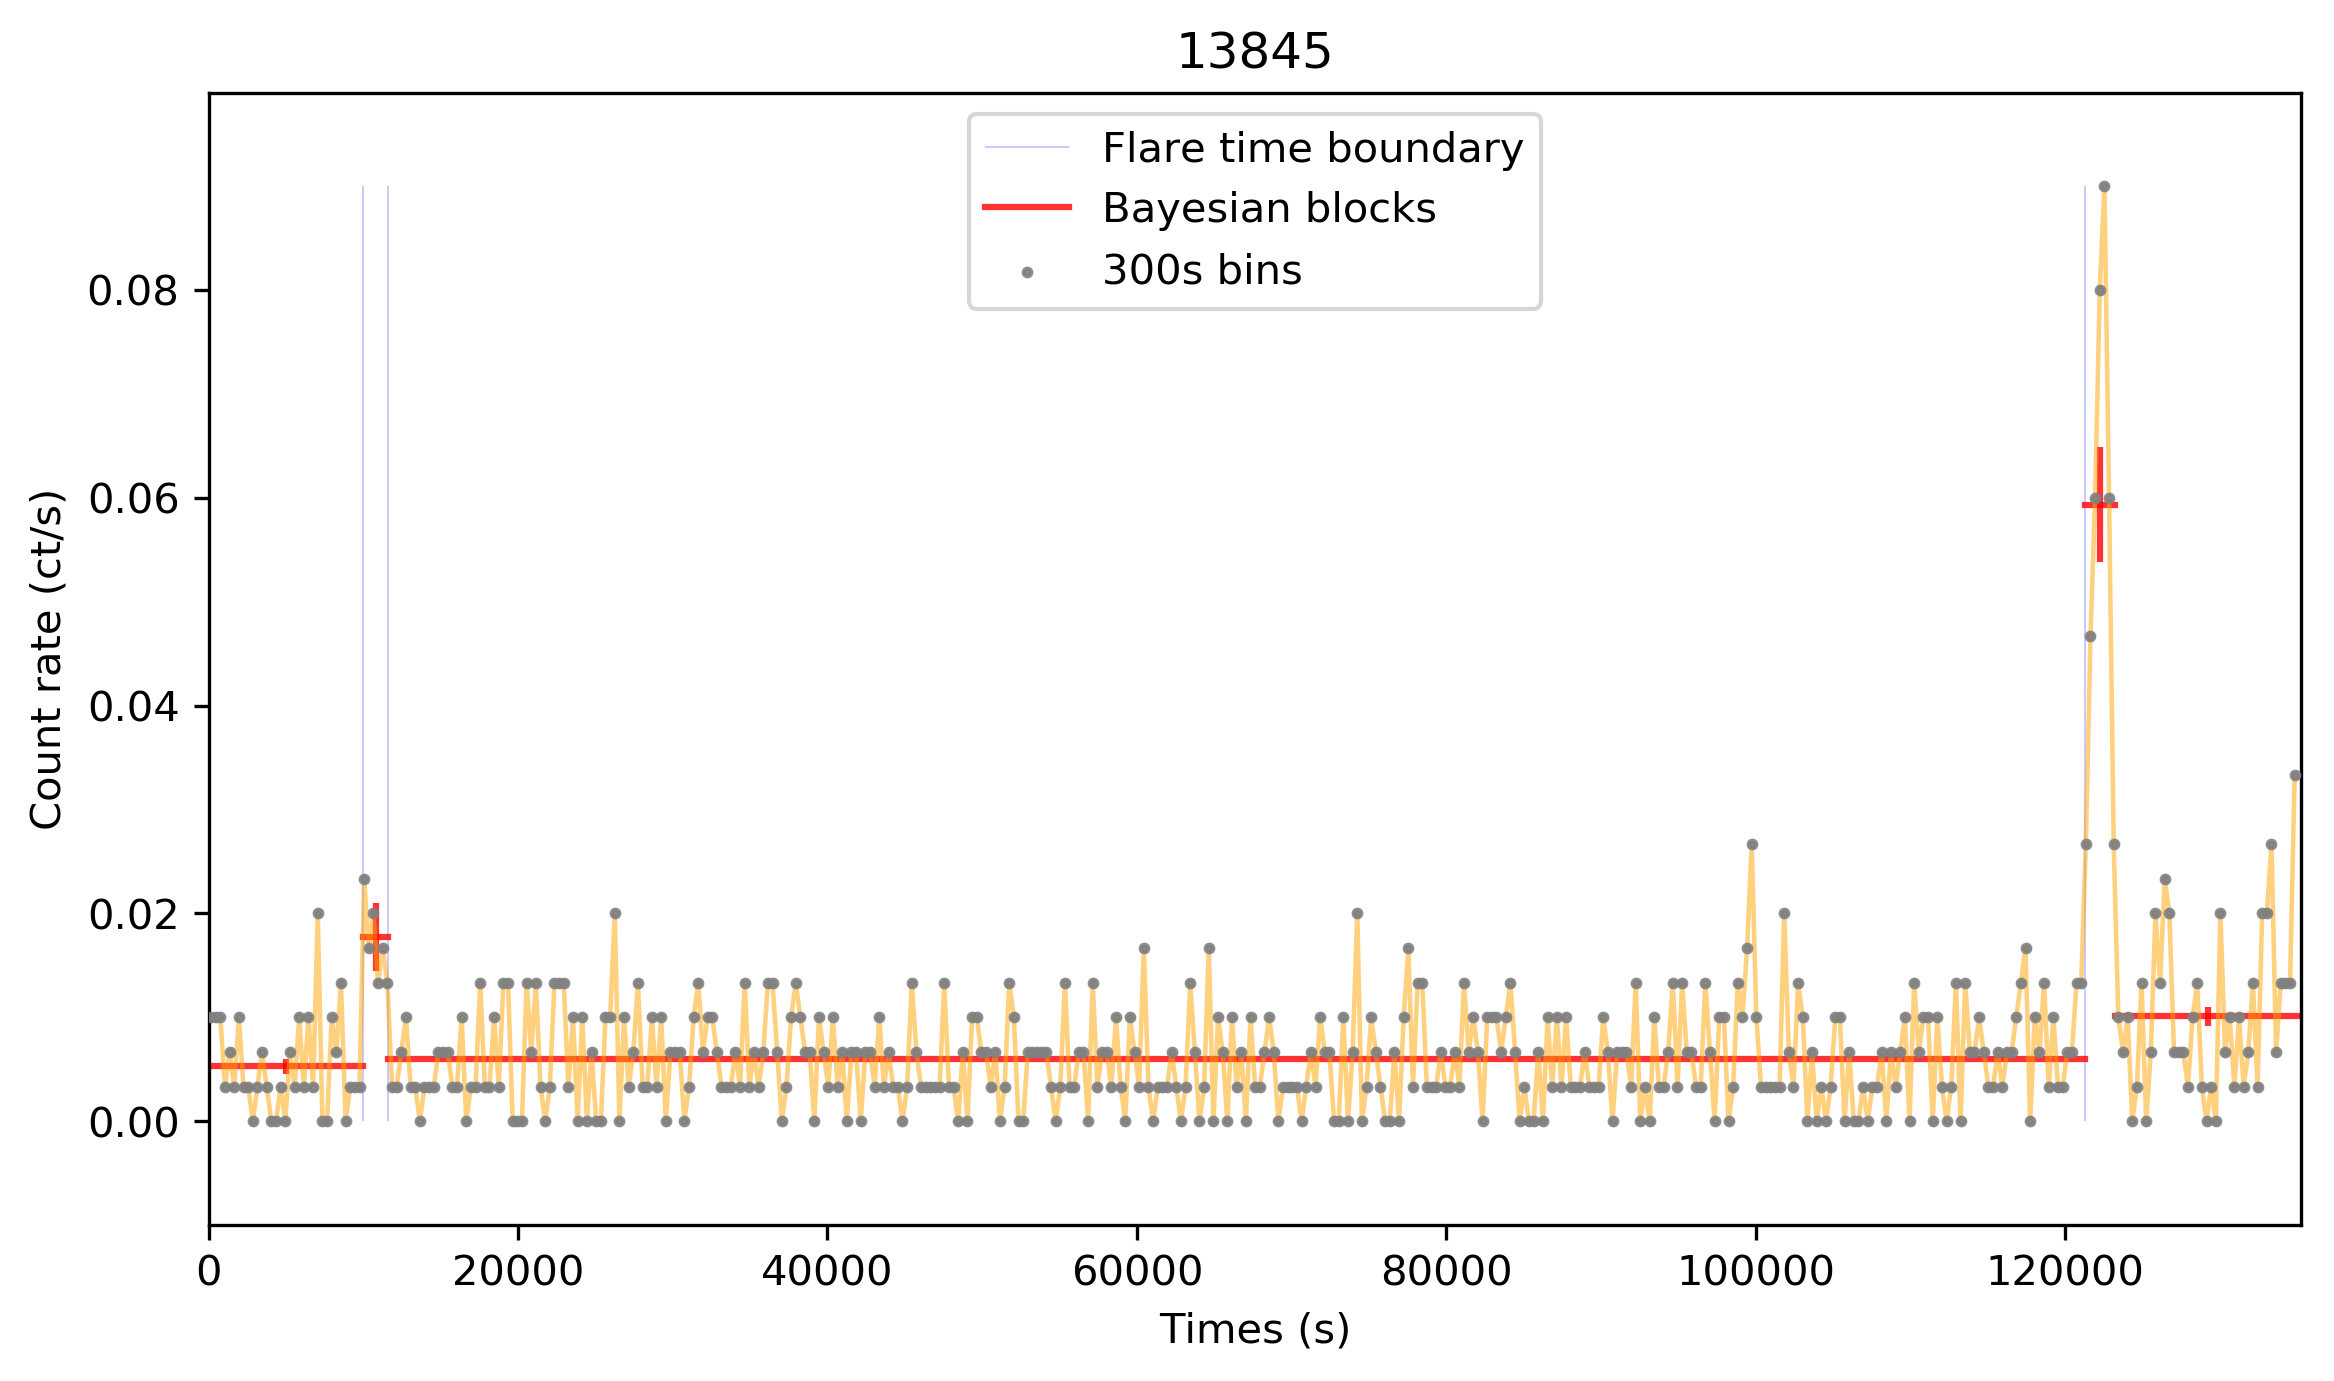

ObsID:  14460 
 Max count rate = : 0.0333333333333


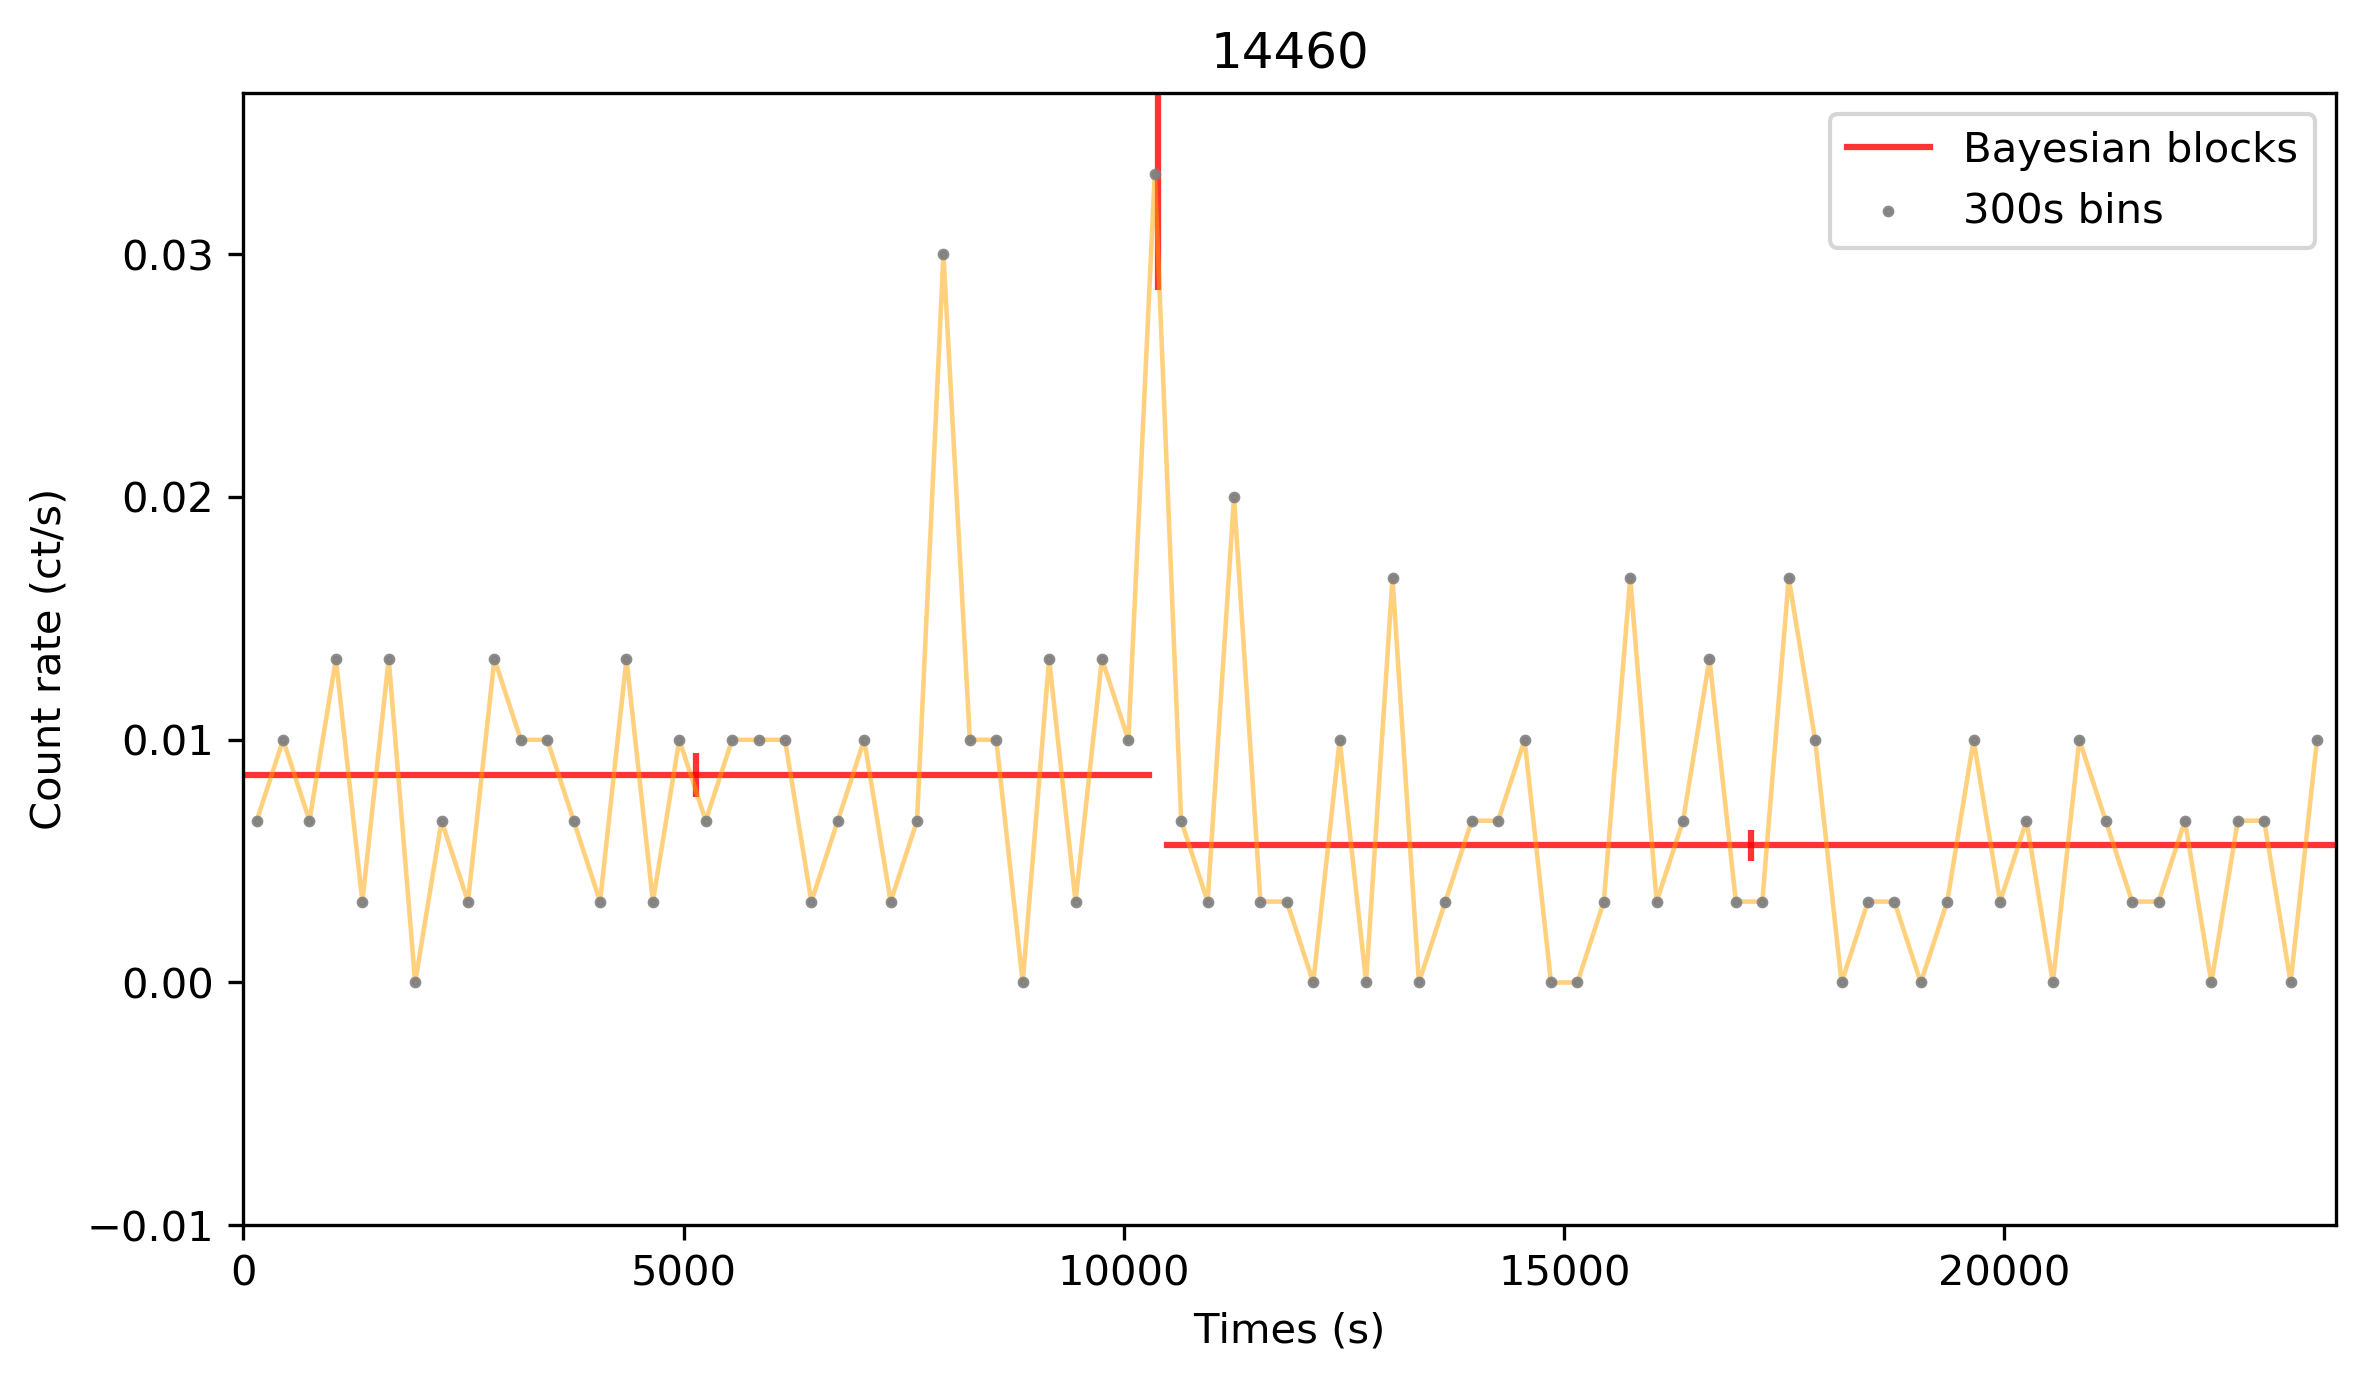

ObsID:  13844 
 Max count rate = : 0.0233333333333


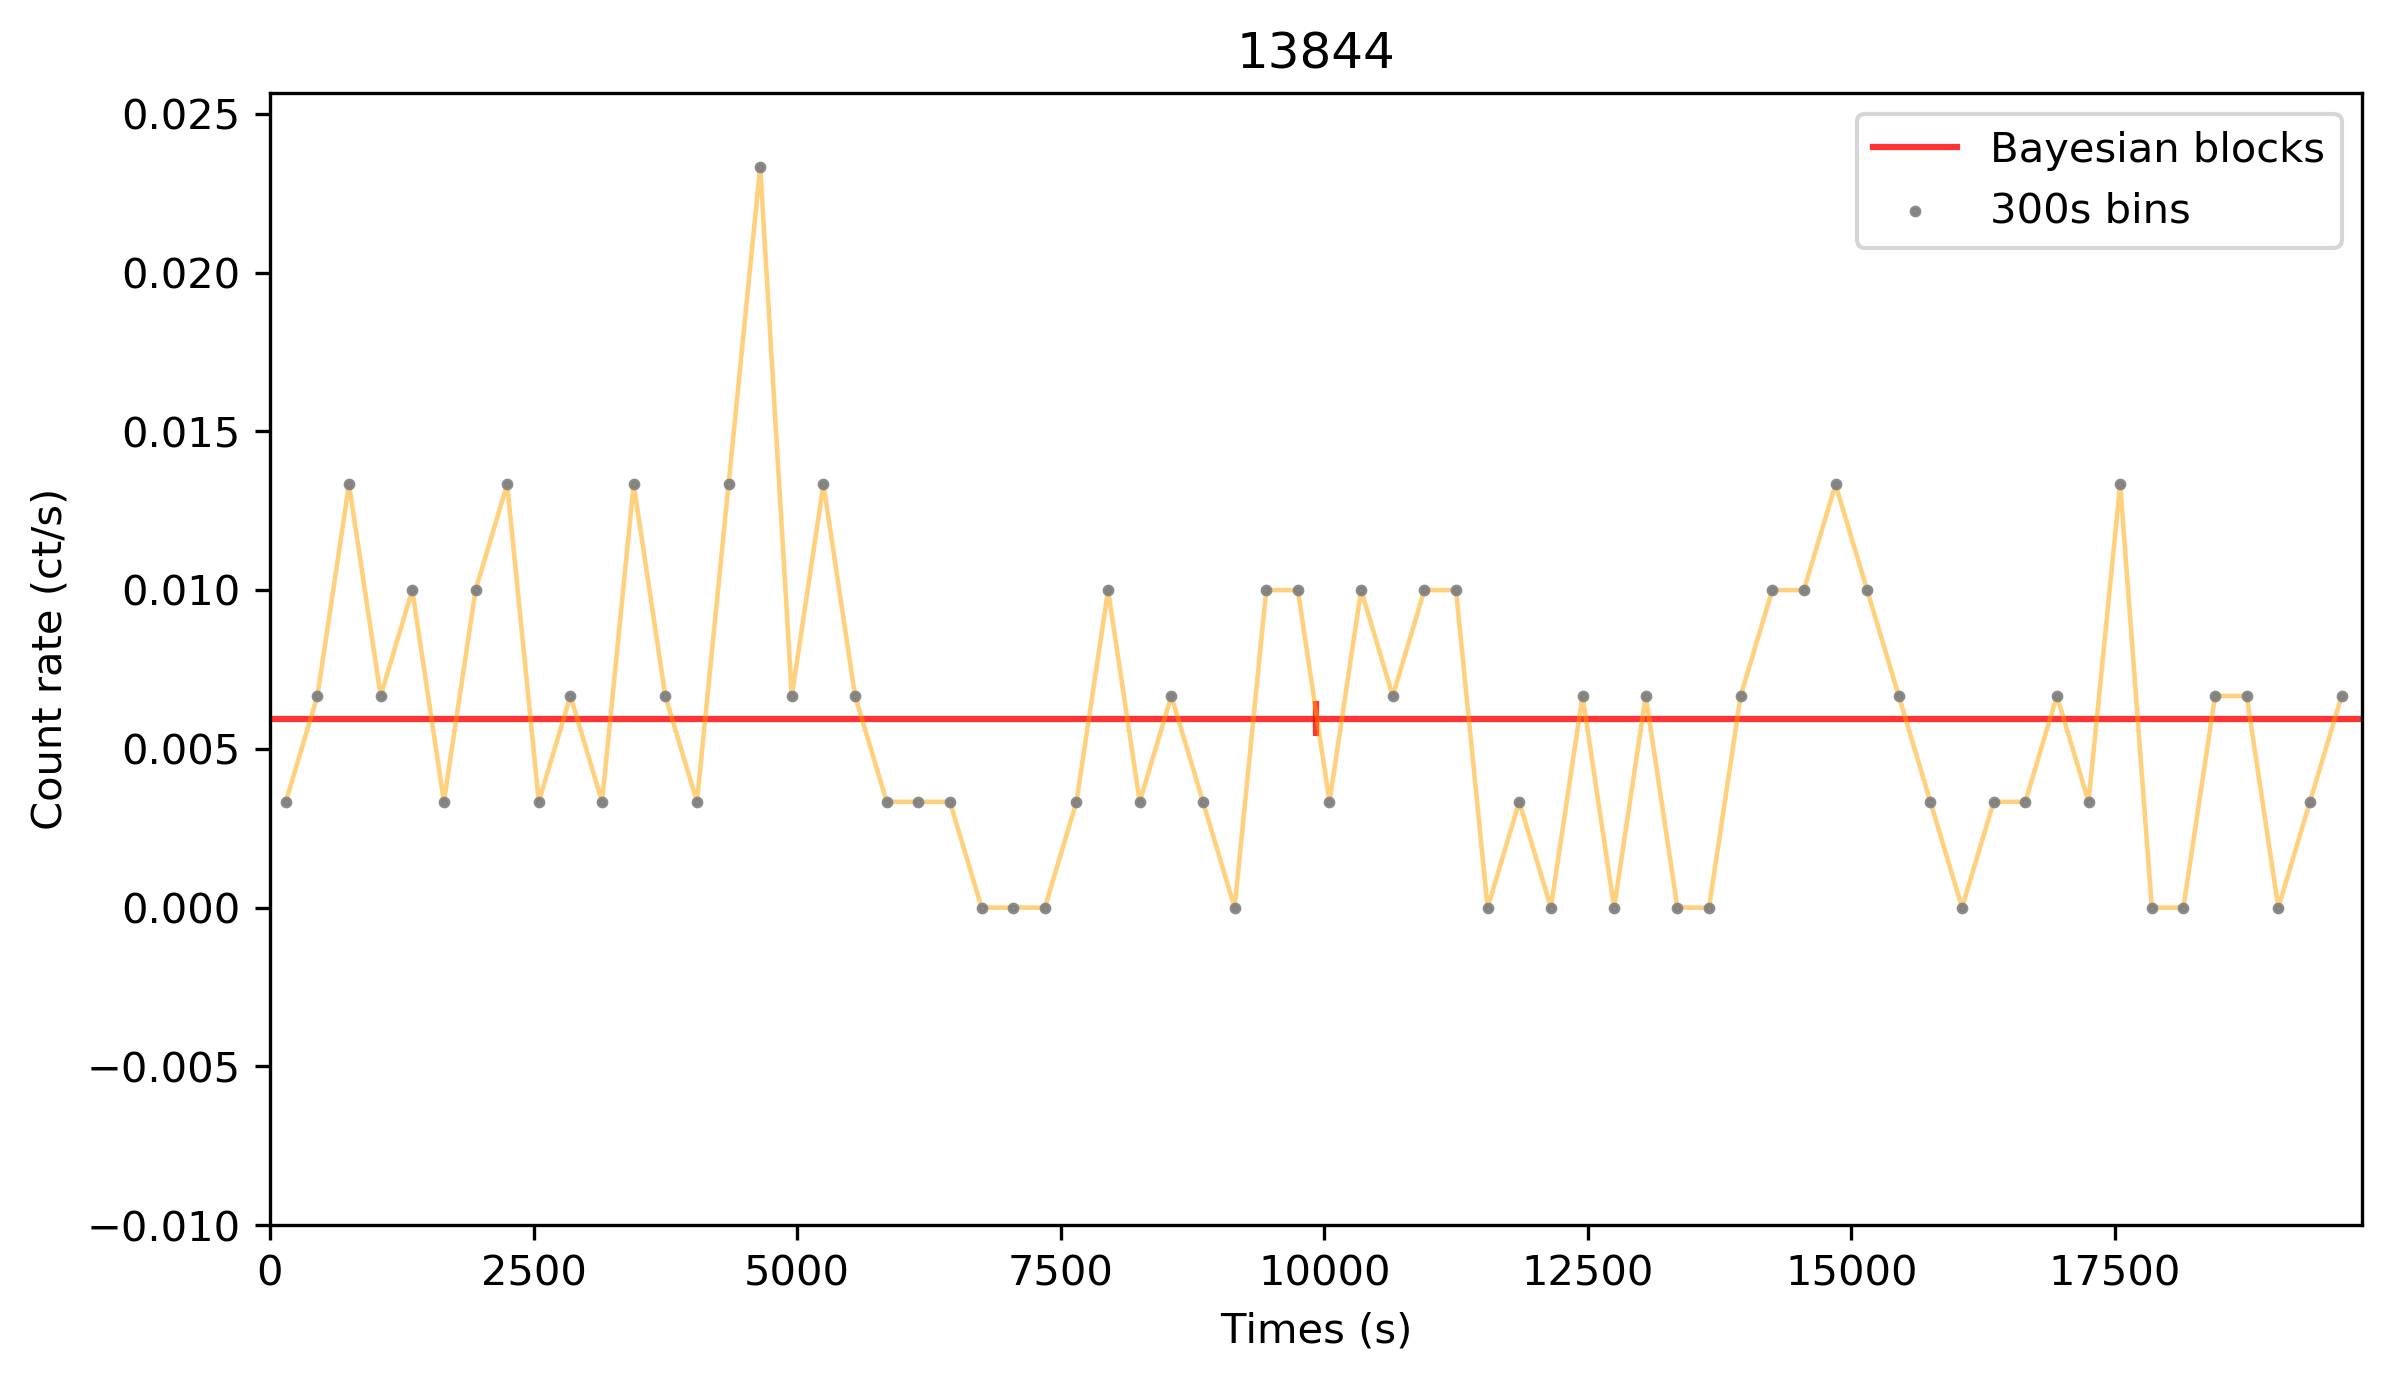

ObsID:  14461 
 Max count rate = : 0.02


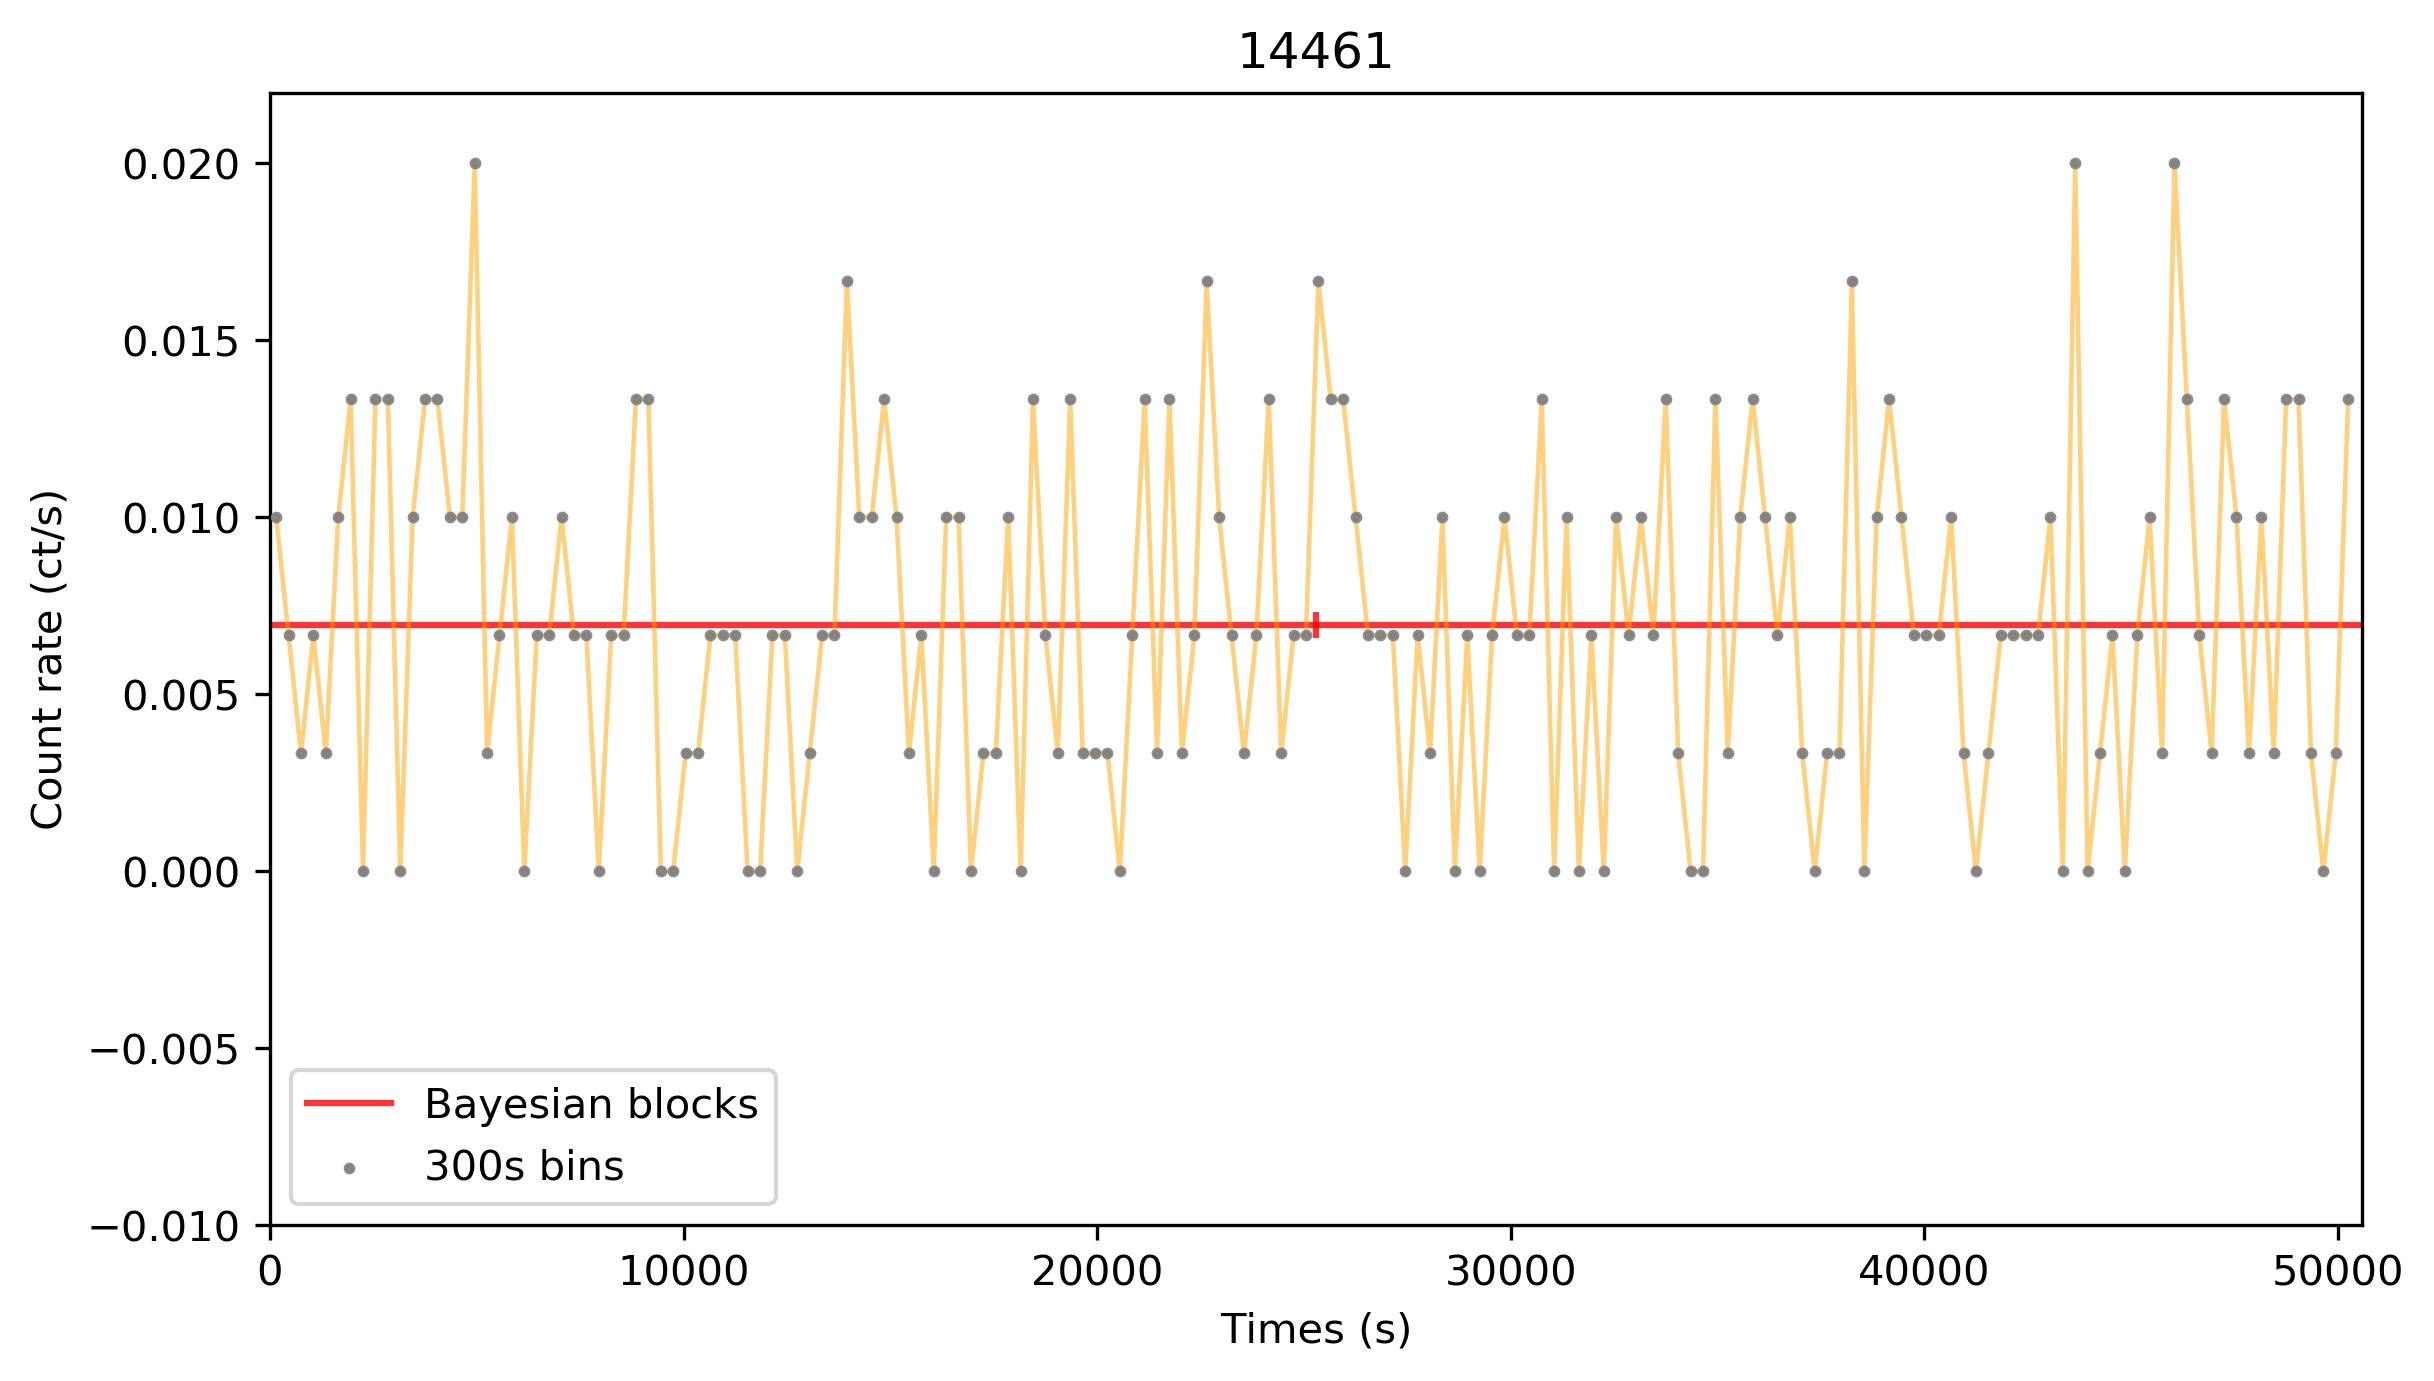

ObsID:  13853 
 Max count rate = : 0.03


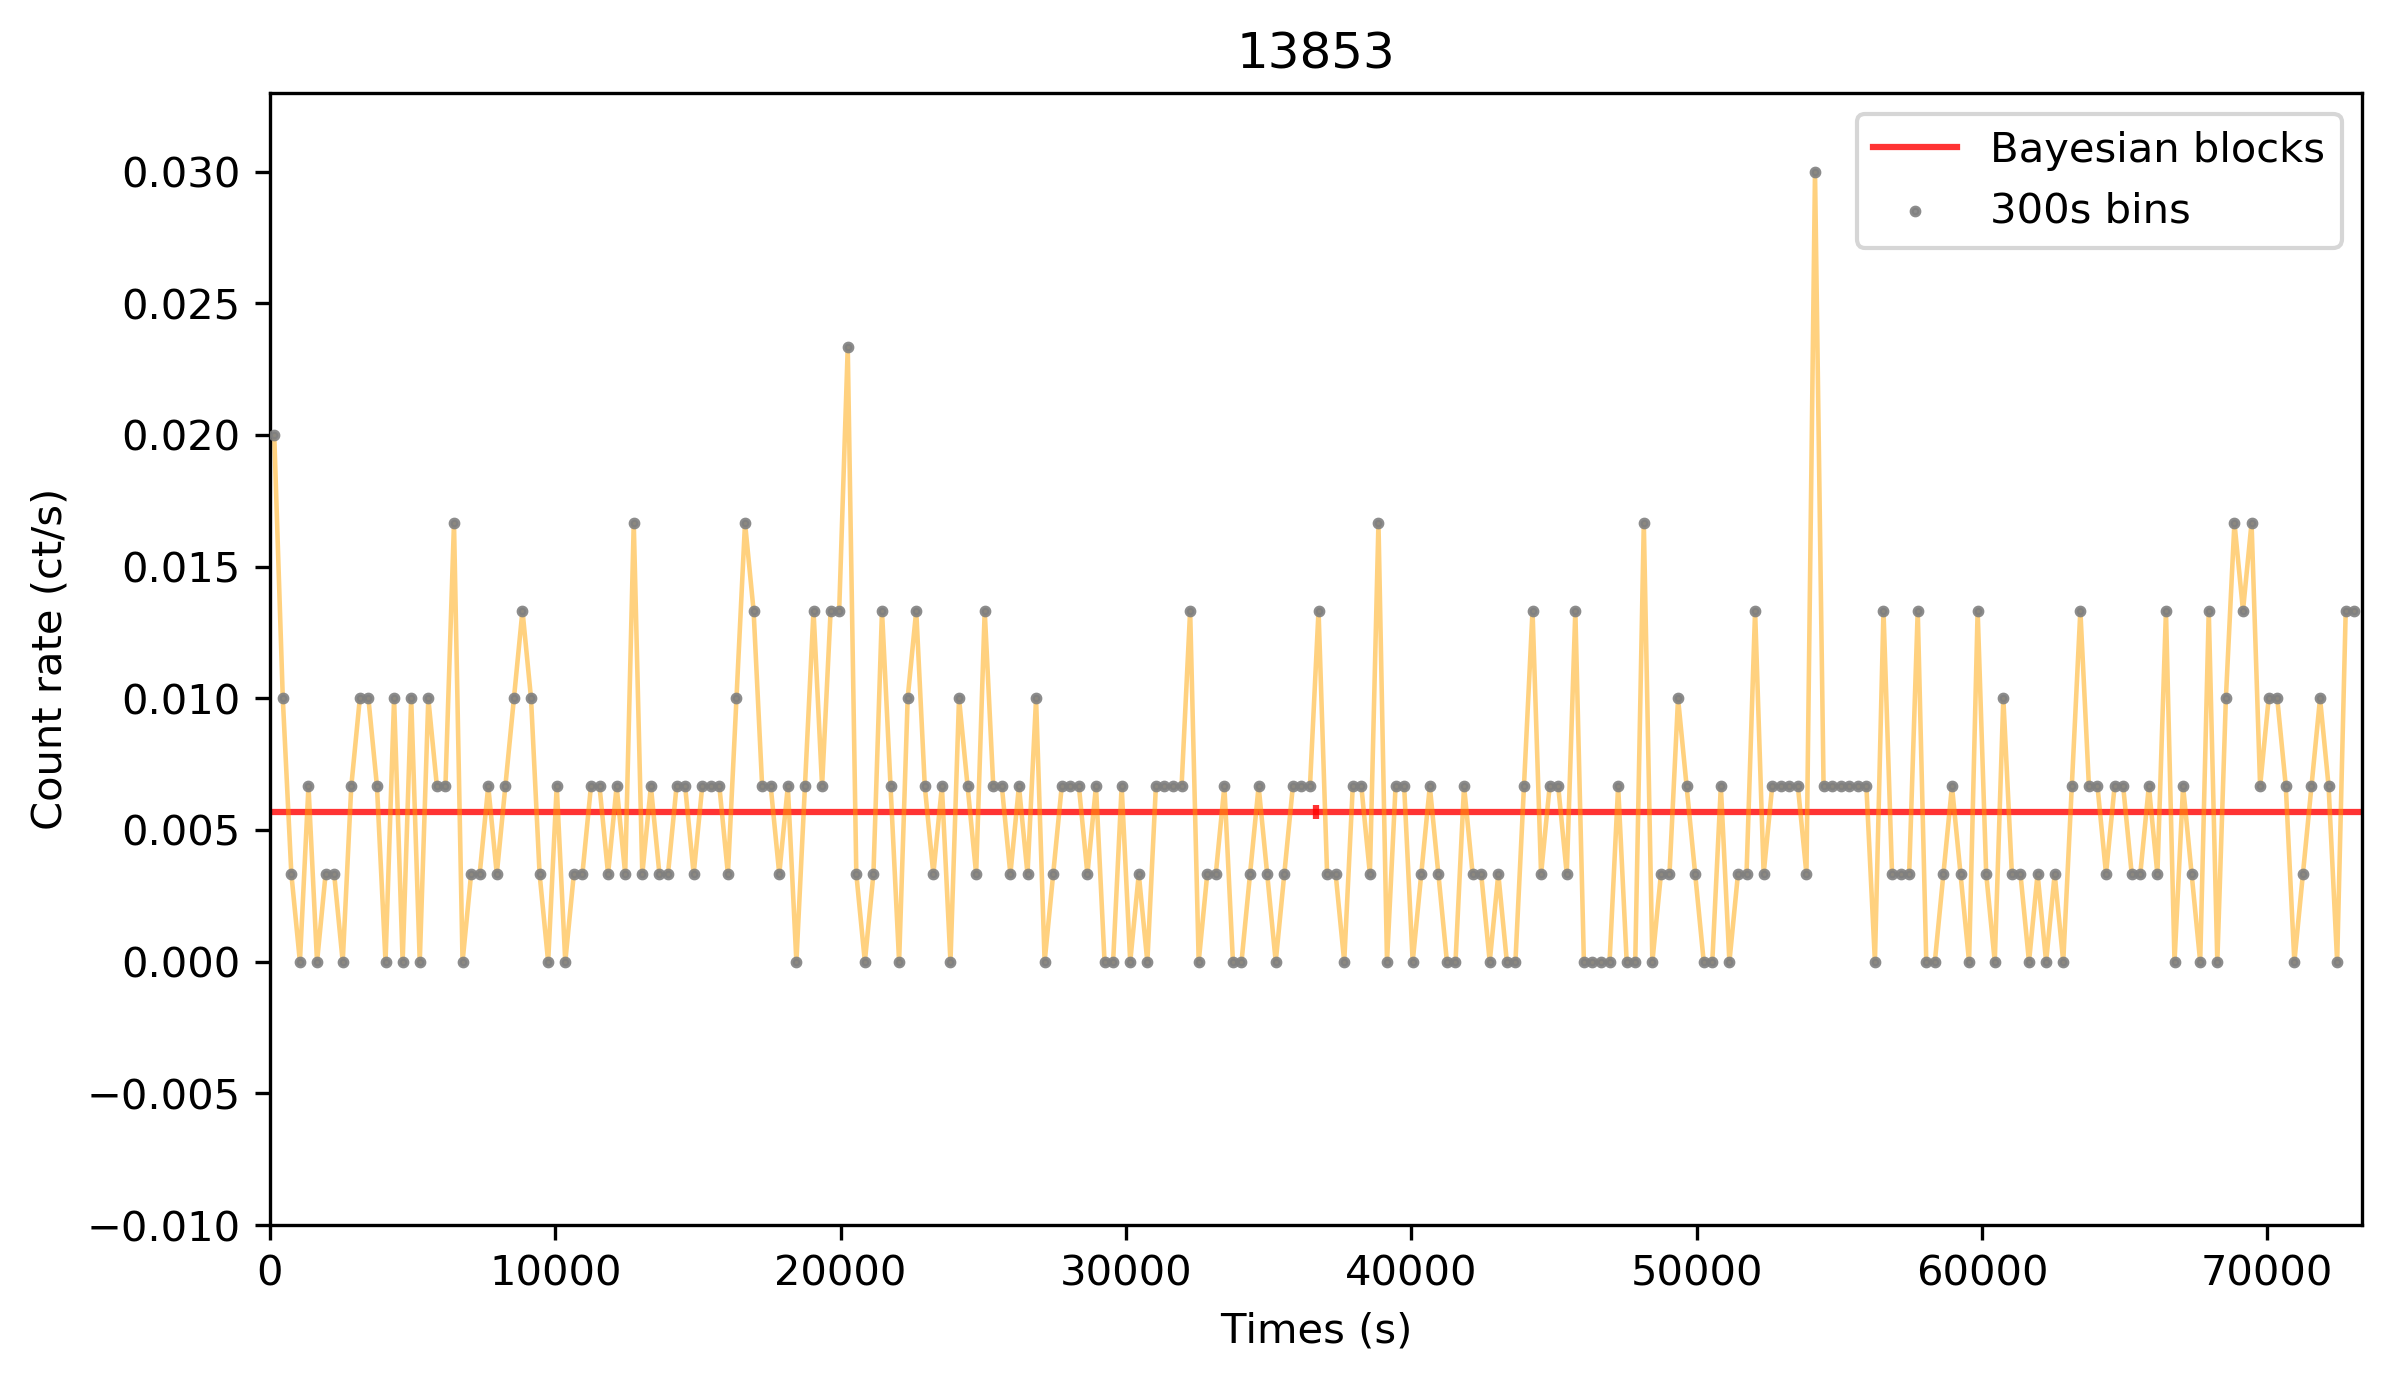

ObsID:  13841 
 Max count rate = : 0.0233333333333


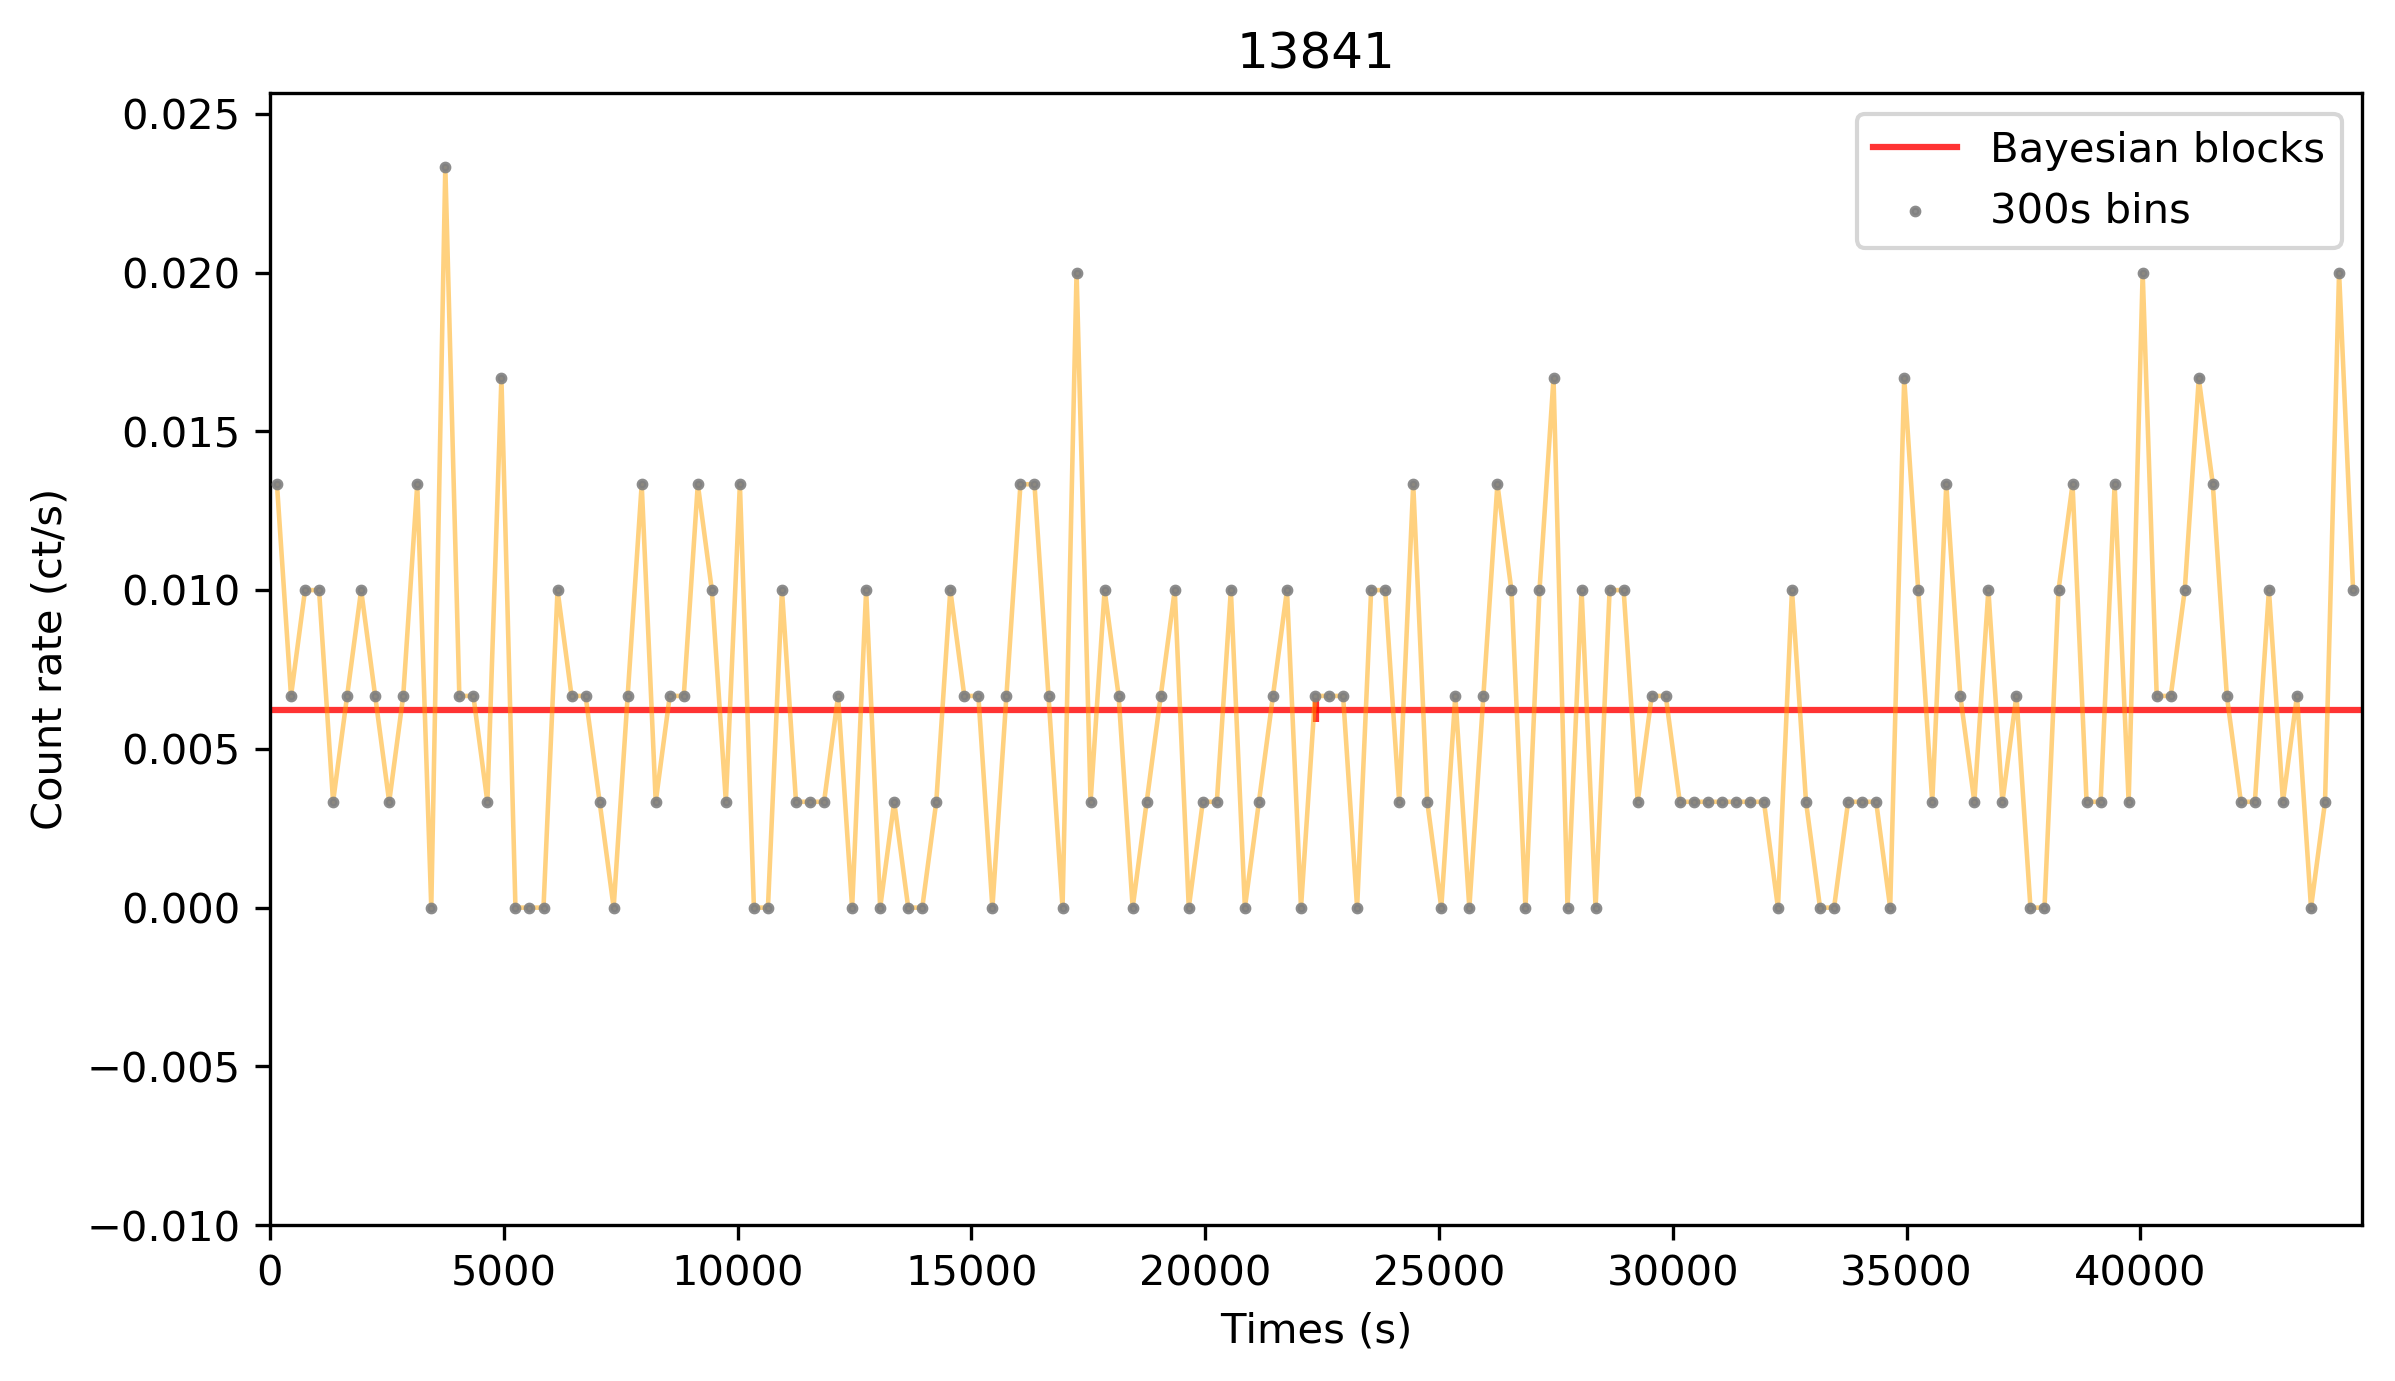

fff [     0.         17249.7600002]
ObsID:  14465 
 Max count rate = : 0.0333333333333


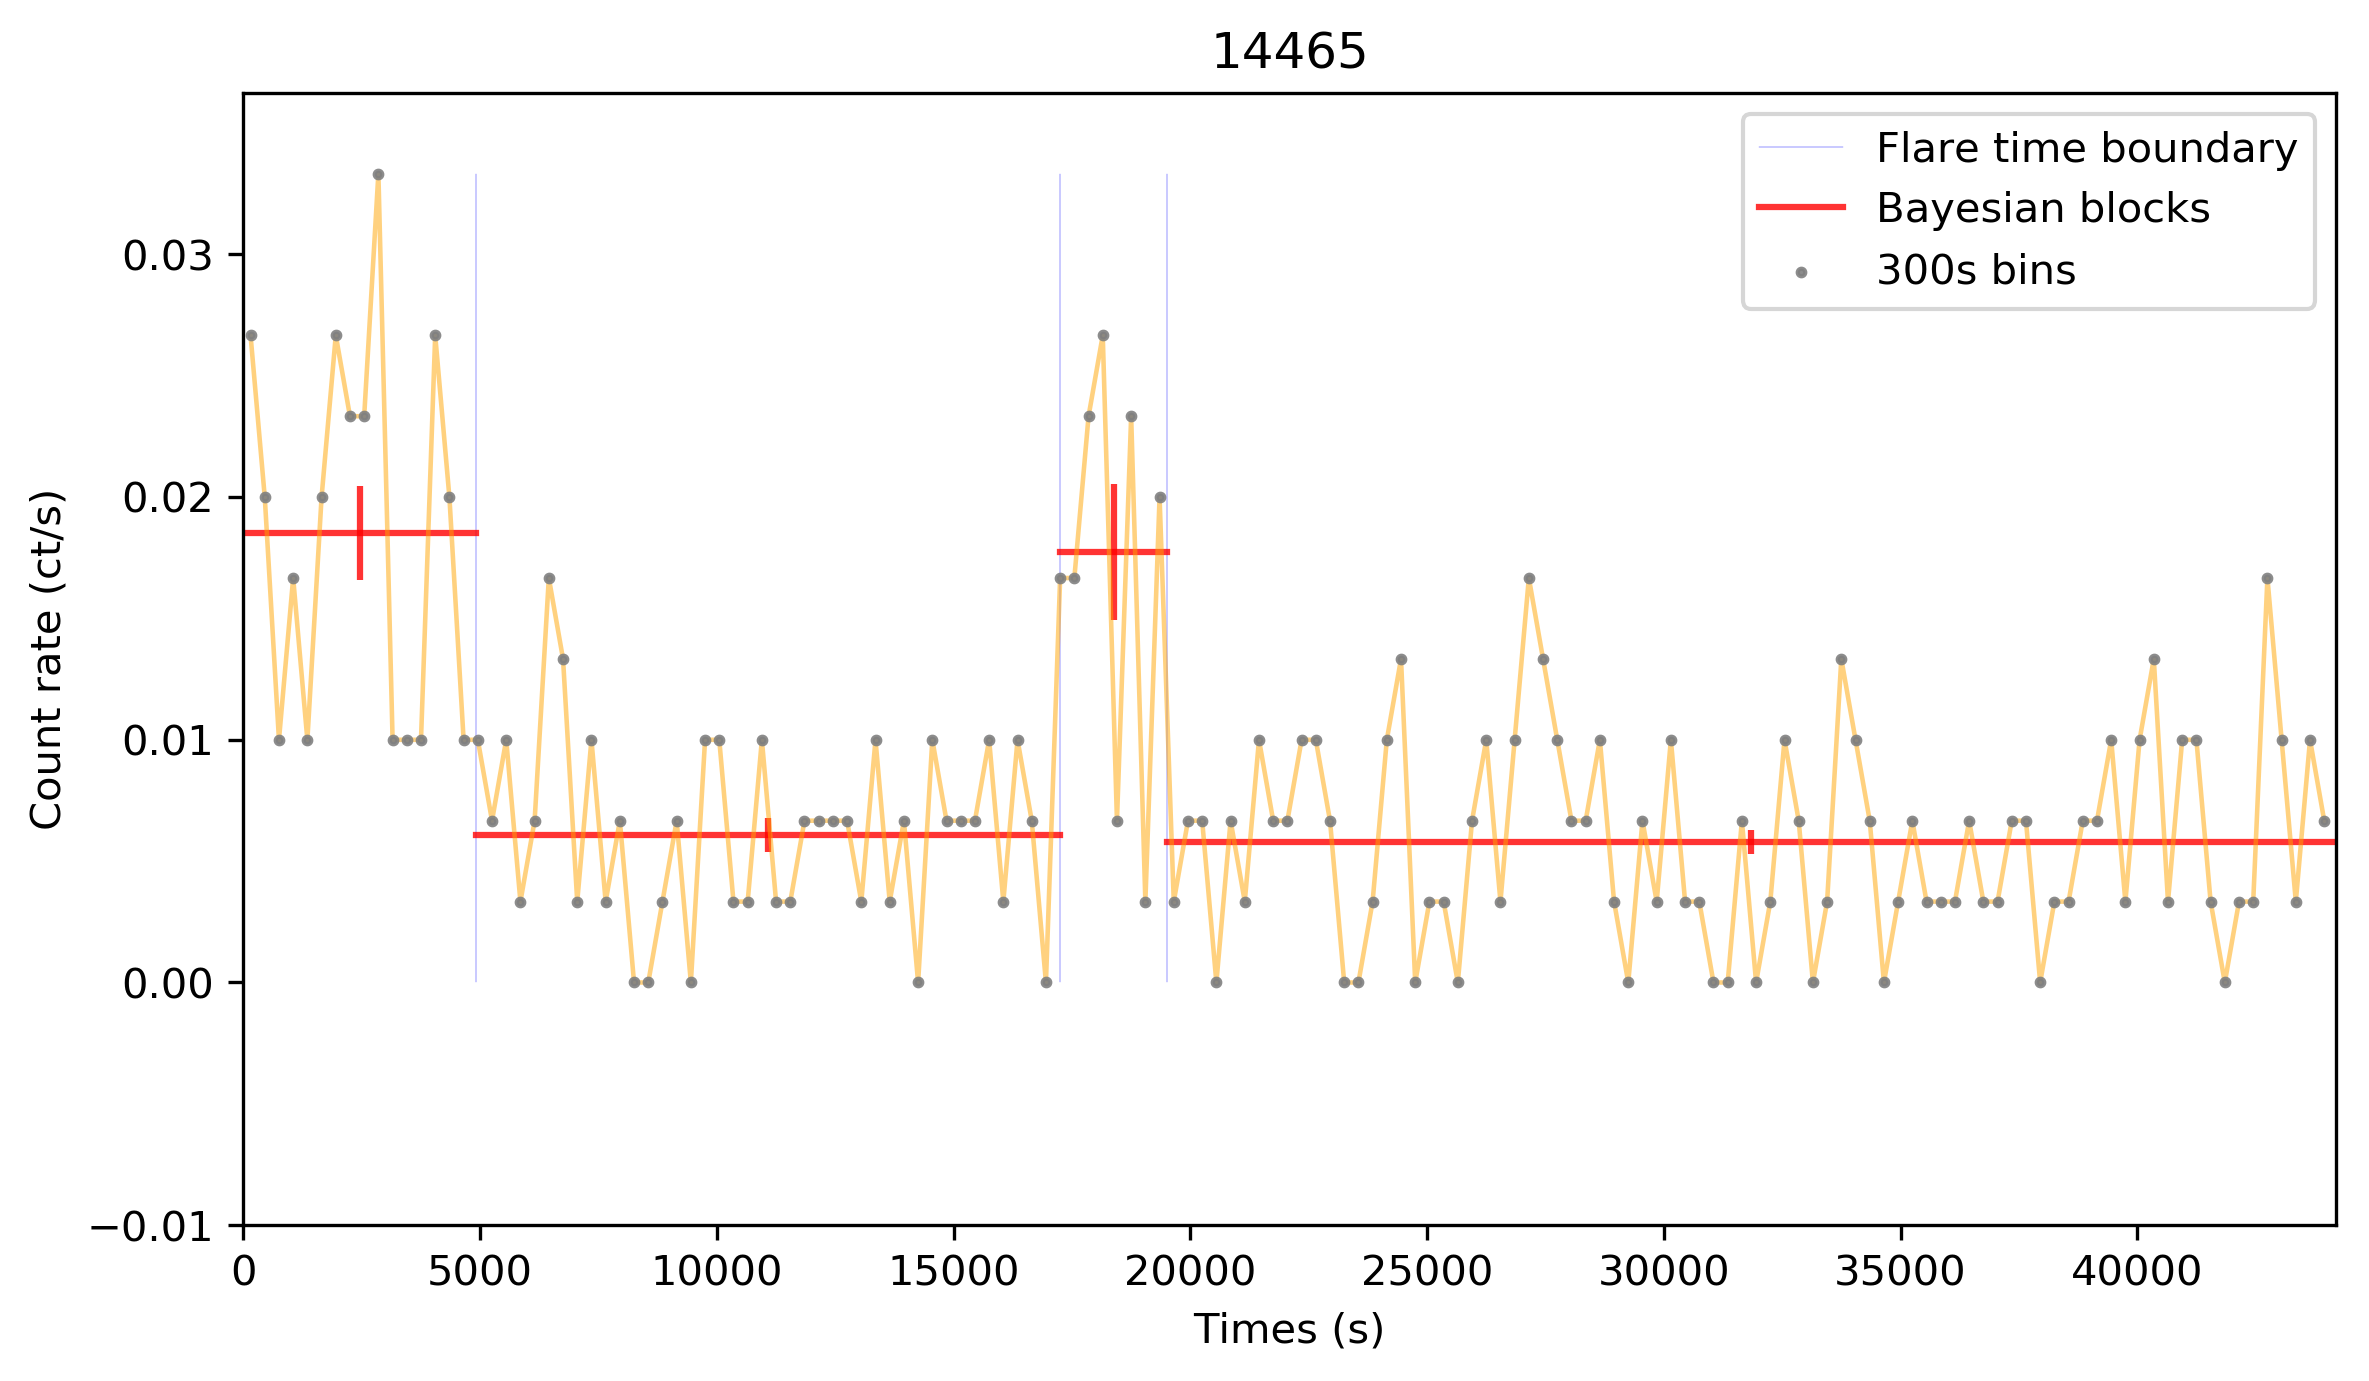

low counts: [3]
fff [ 823.39200026]
ObsID:  14466 
 Max count rate = : 0.0633333333333


/home/elie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/elie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:70: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/elie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/elie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:72: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/elie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:73: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/elie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/_

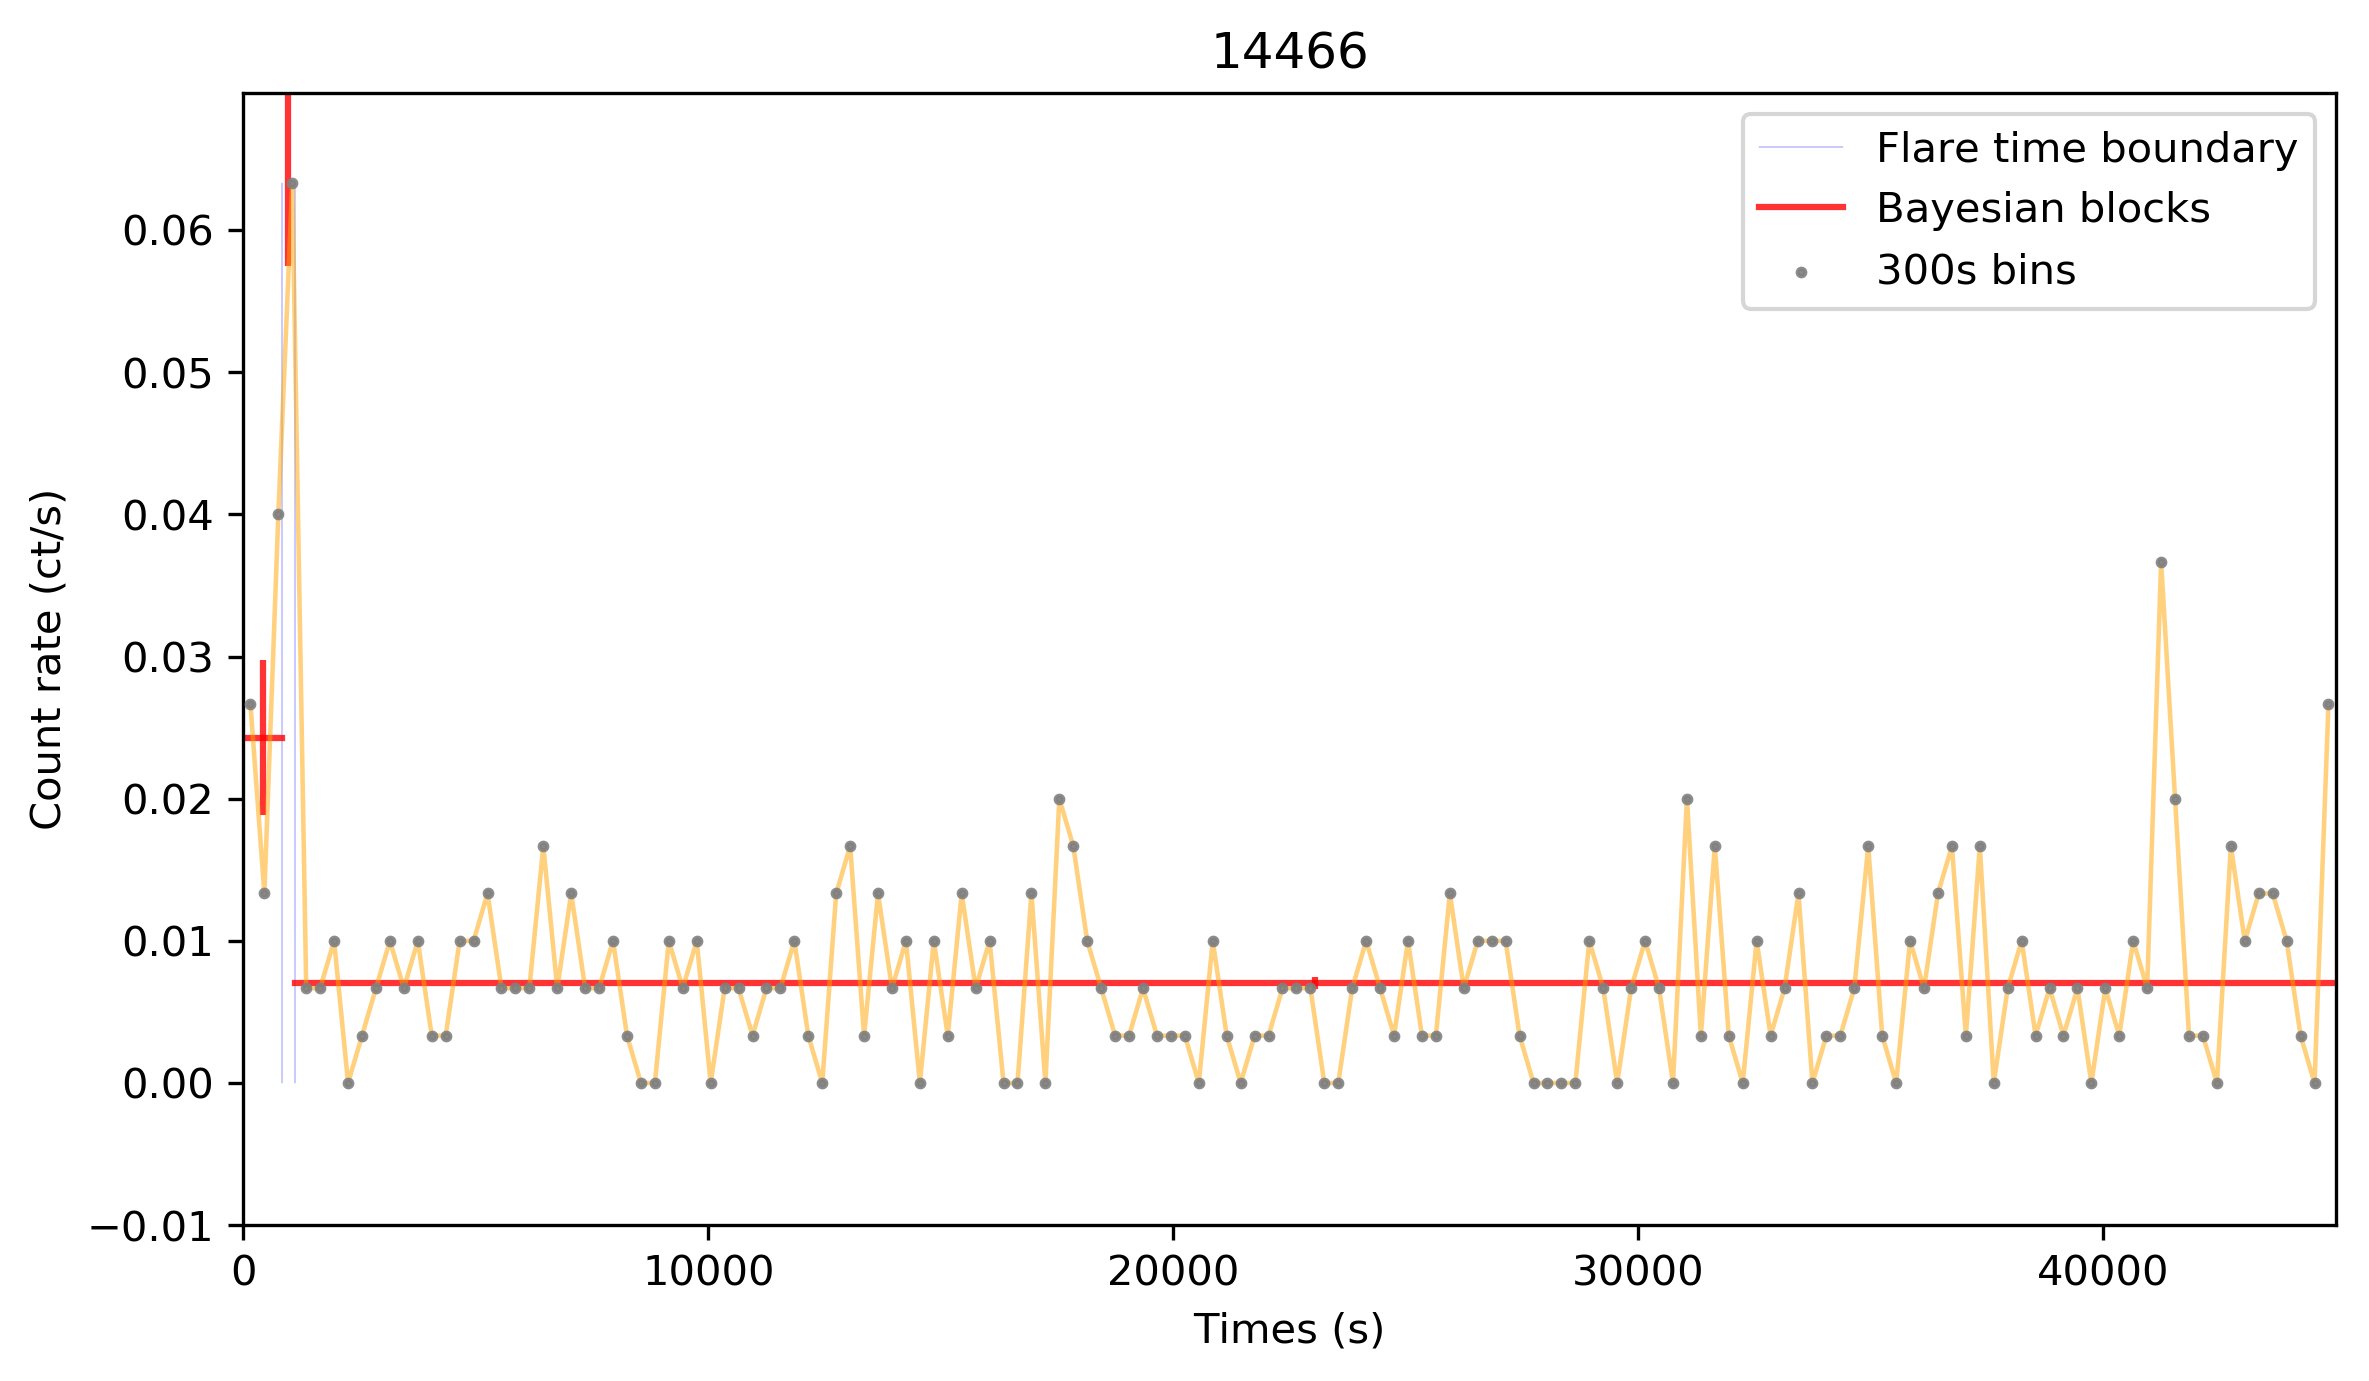

fff [  57752.35199982  120088.22399983  170679.7439995 ]
ObsID:  13842 
 Max count rate = : 0.0633333333333


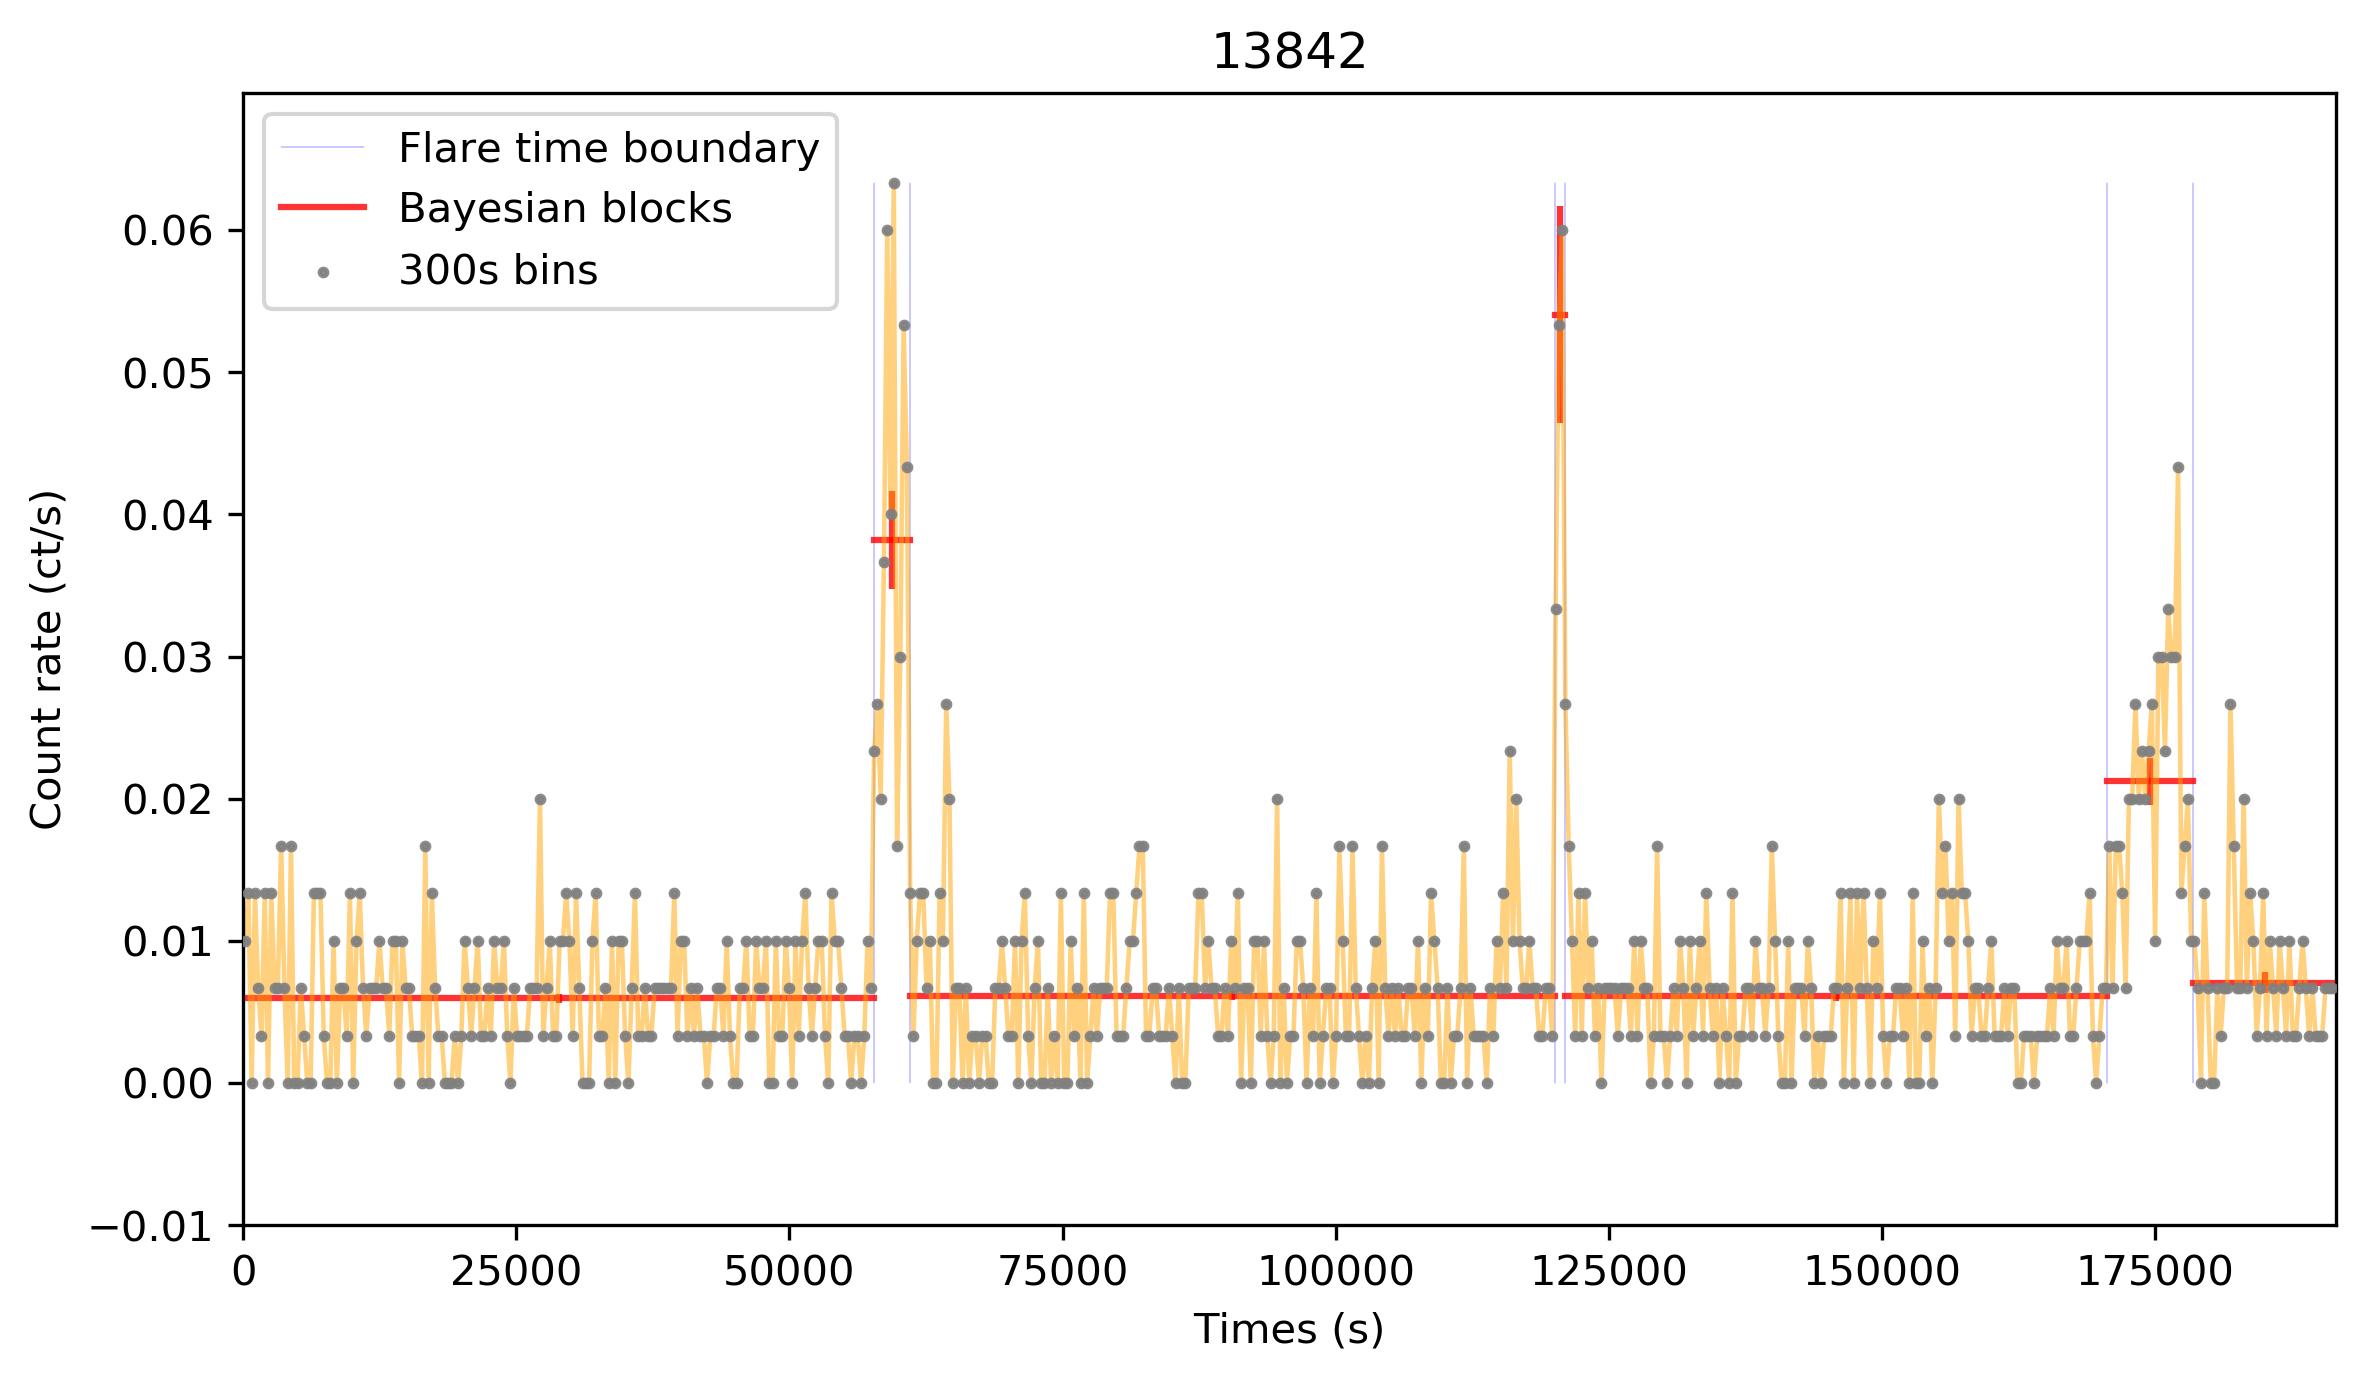

fff [   6866.20800036  145989.21599993]
ObsID:  13839 
 Max count rate = : 0.166666666667


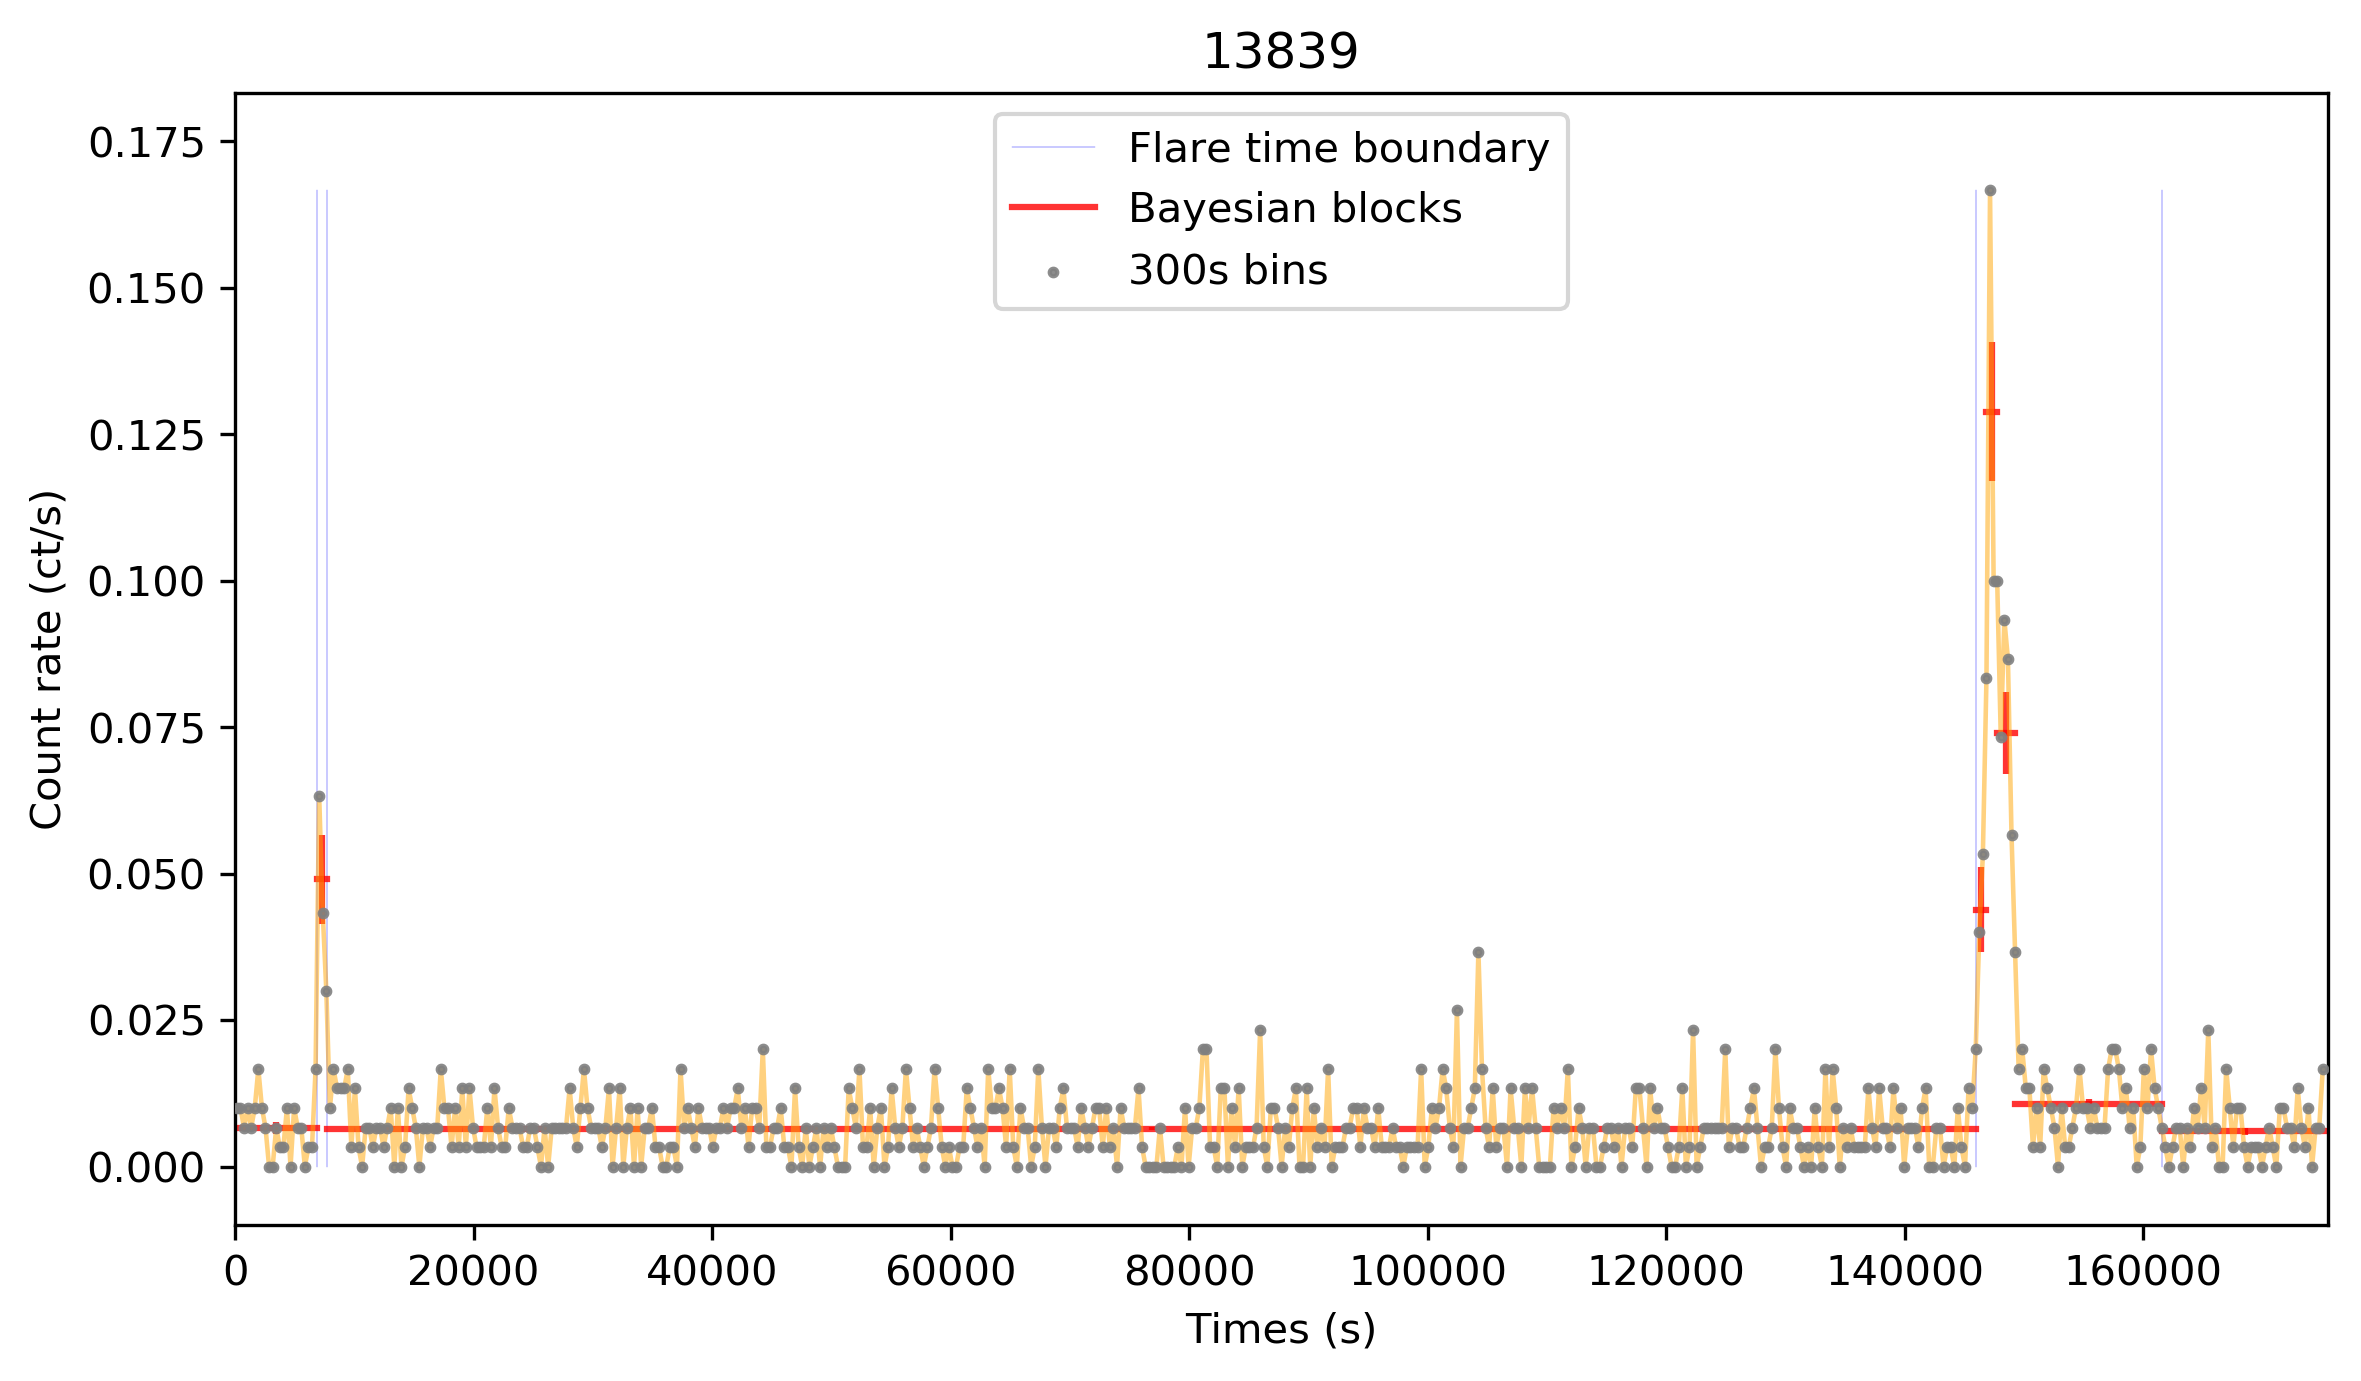

fff [ 138697.05599996  153419.61600019]
ObsID:  13840 
 Max count rate = : 0.03


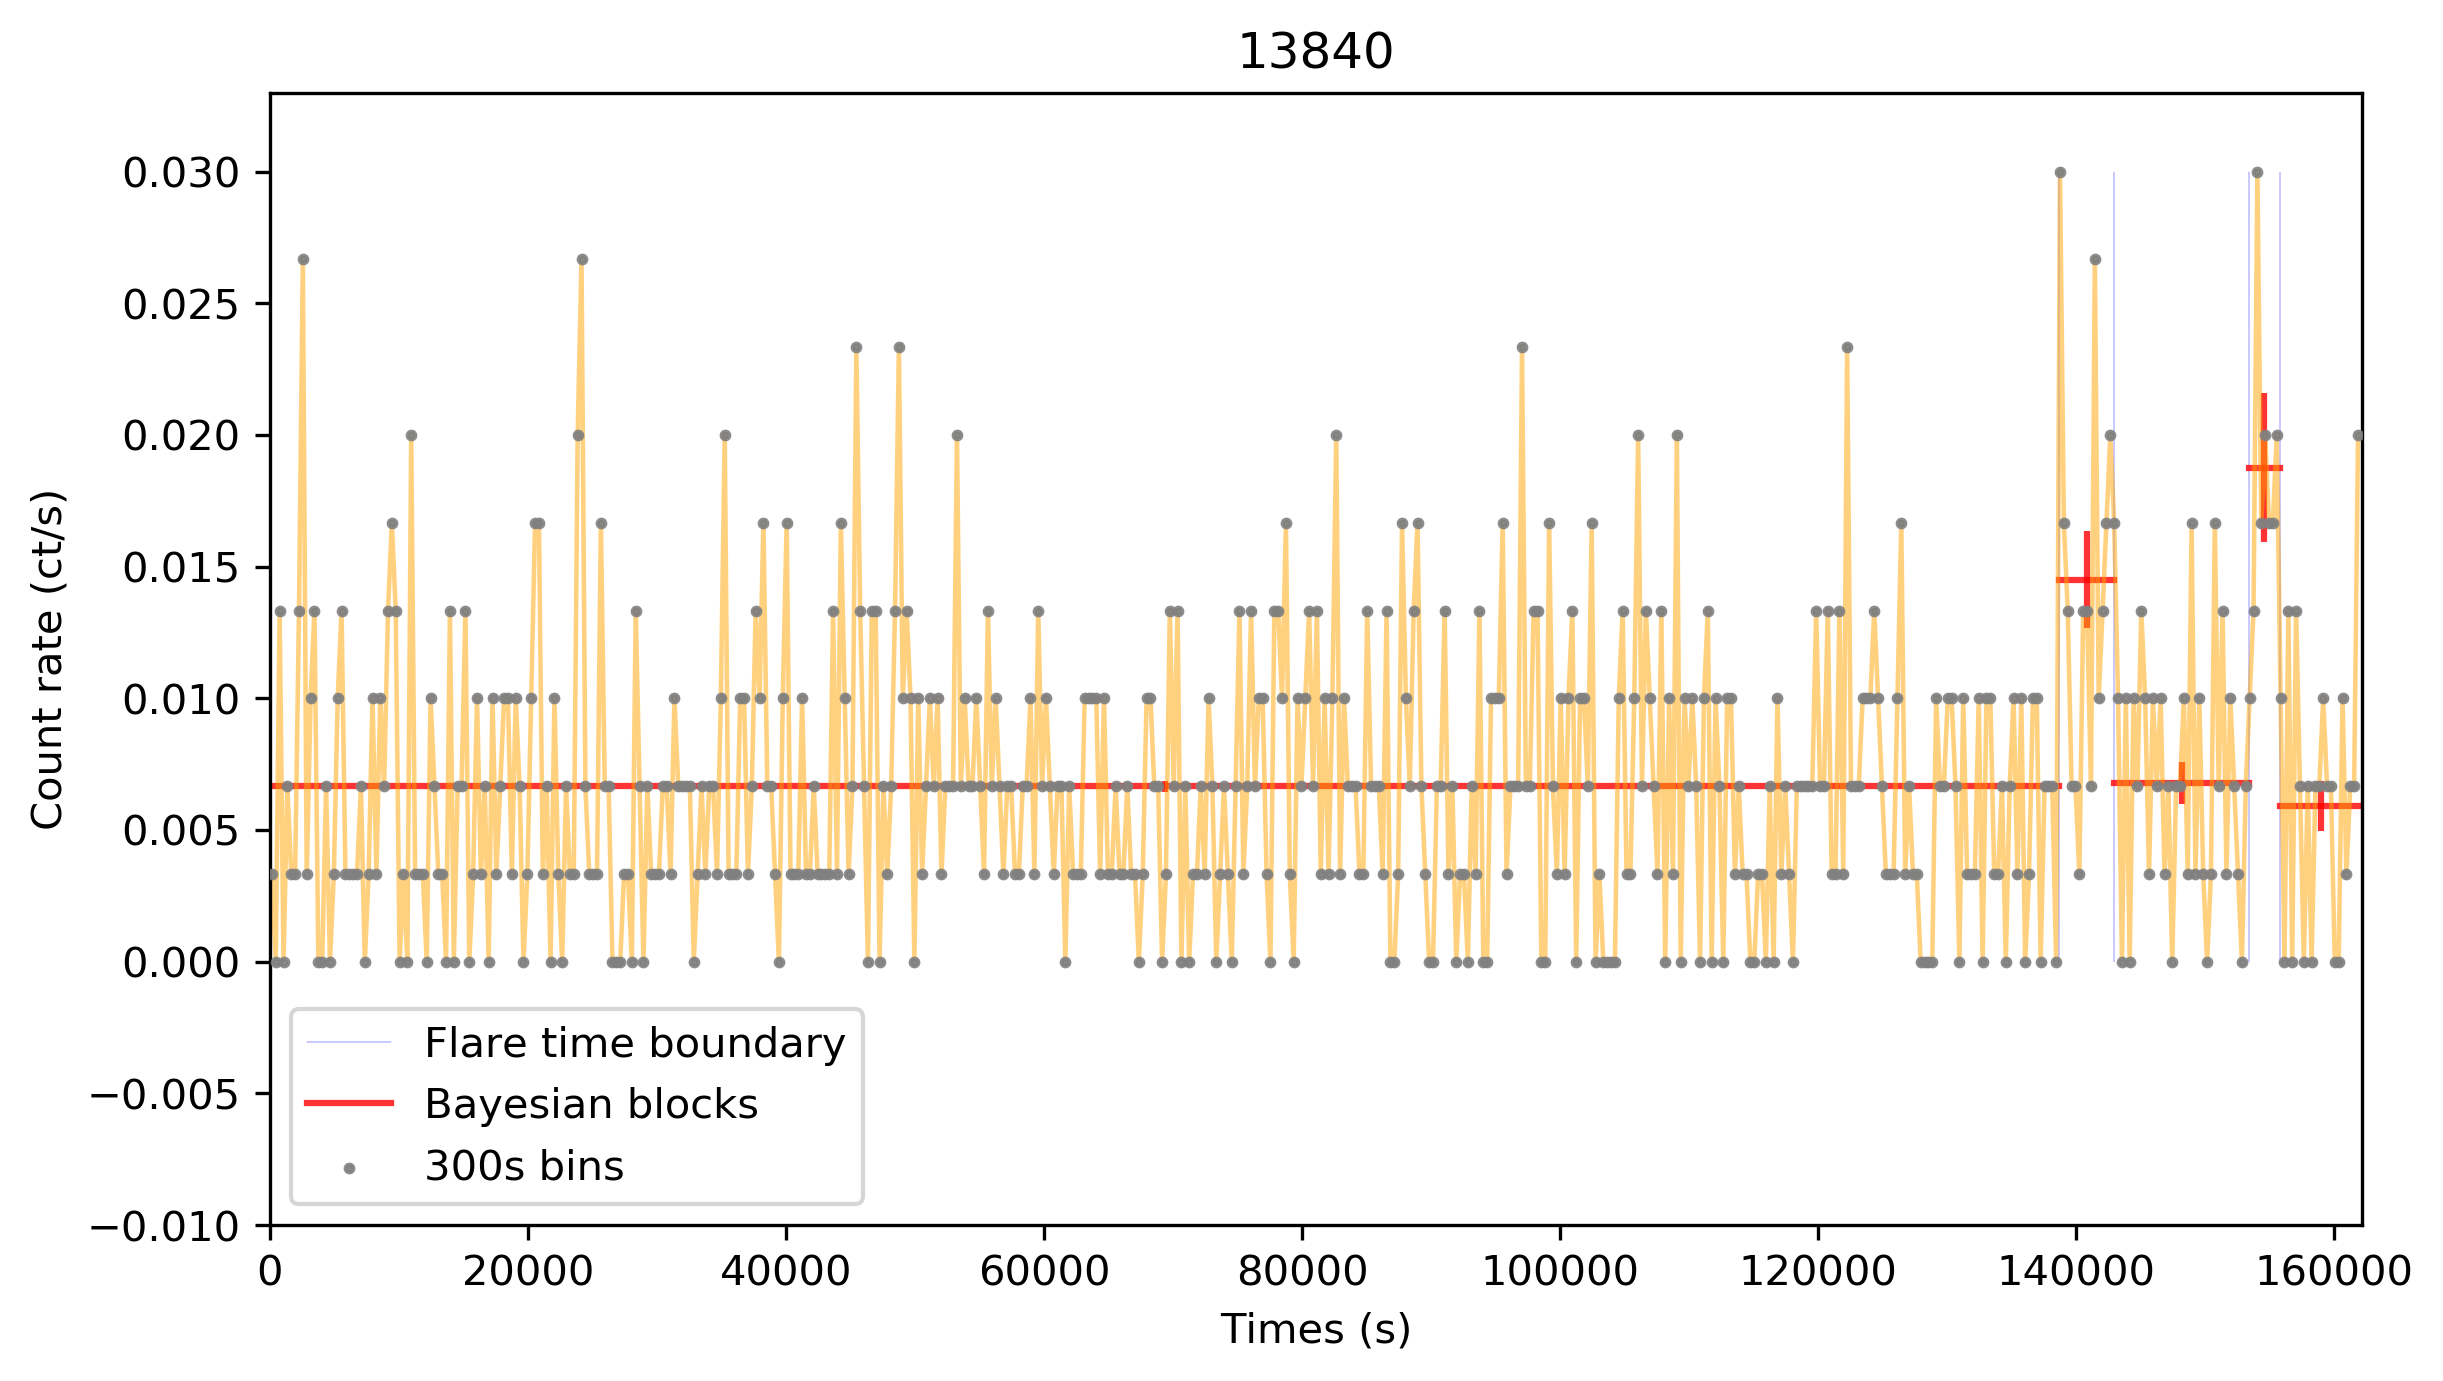

fff [     0.          70536.96000029]
ObsID:  14432 
 Max count rate = : 0.106666666667


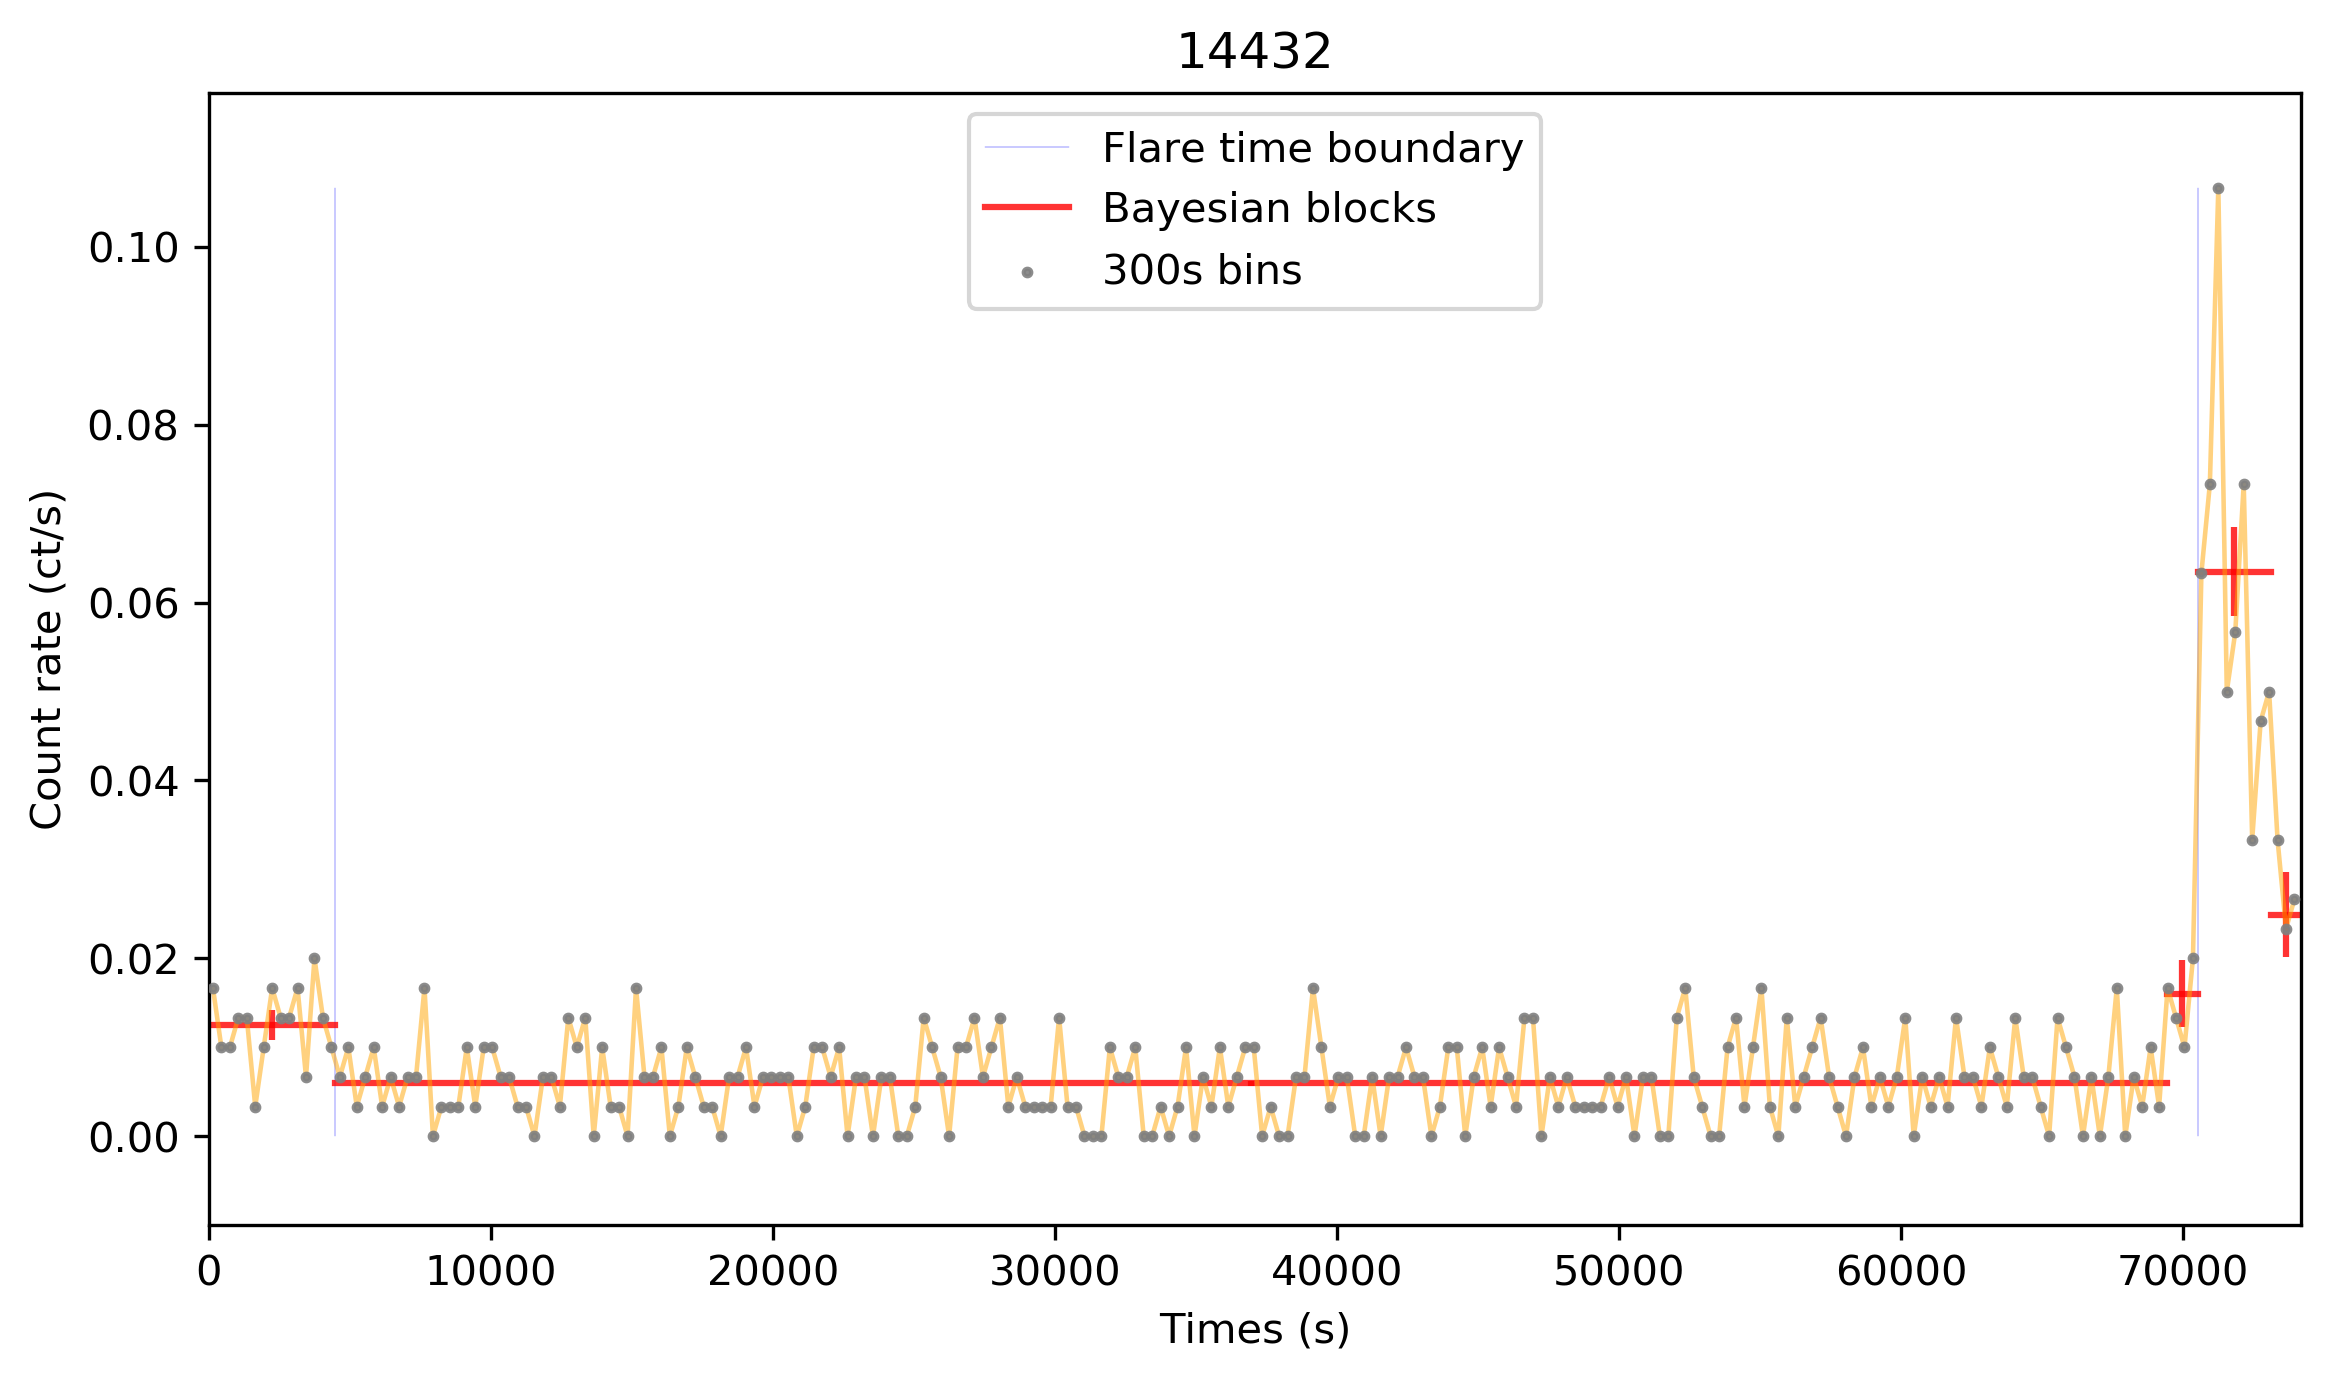

fff [ 22901.18399982]
ObsID:  13838 
 Max count rate = : 0.123333333333


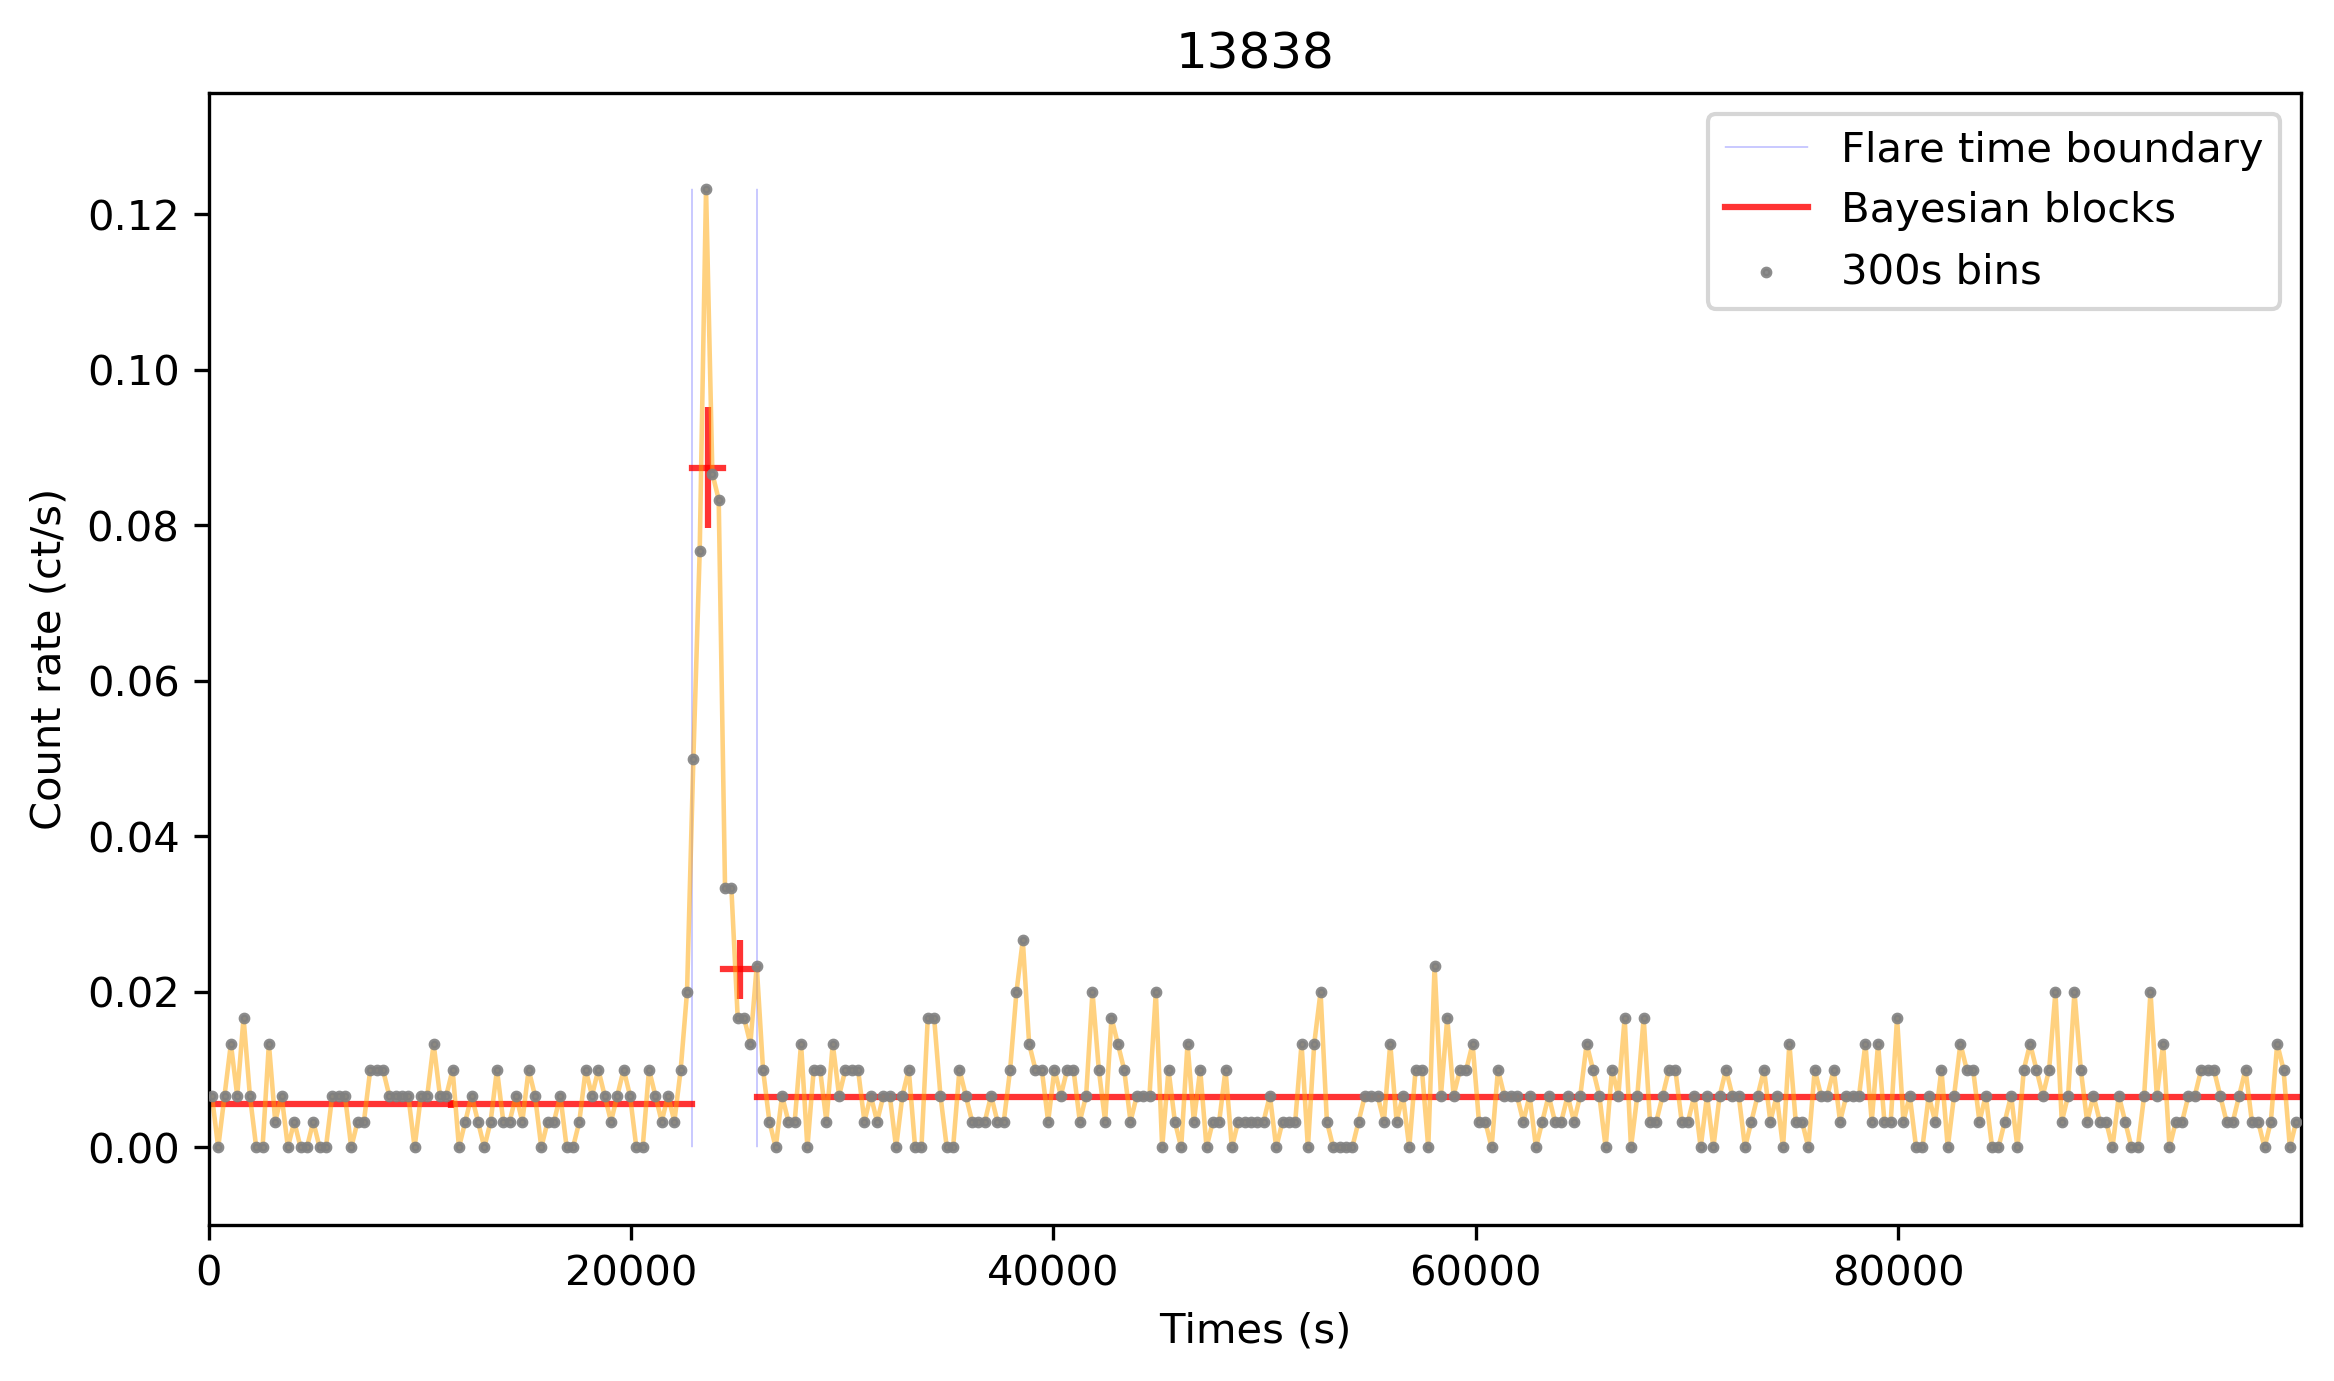

fff [  15848.35199977  103337.85599959]
ObsID:  13852 
 Max count rate = : 0.06


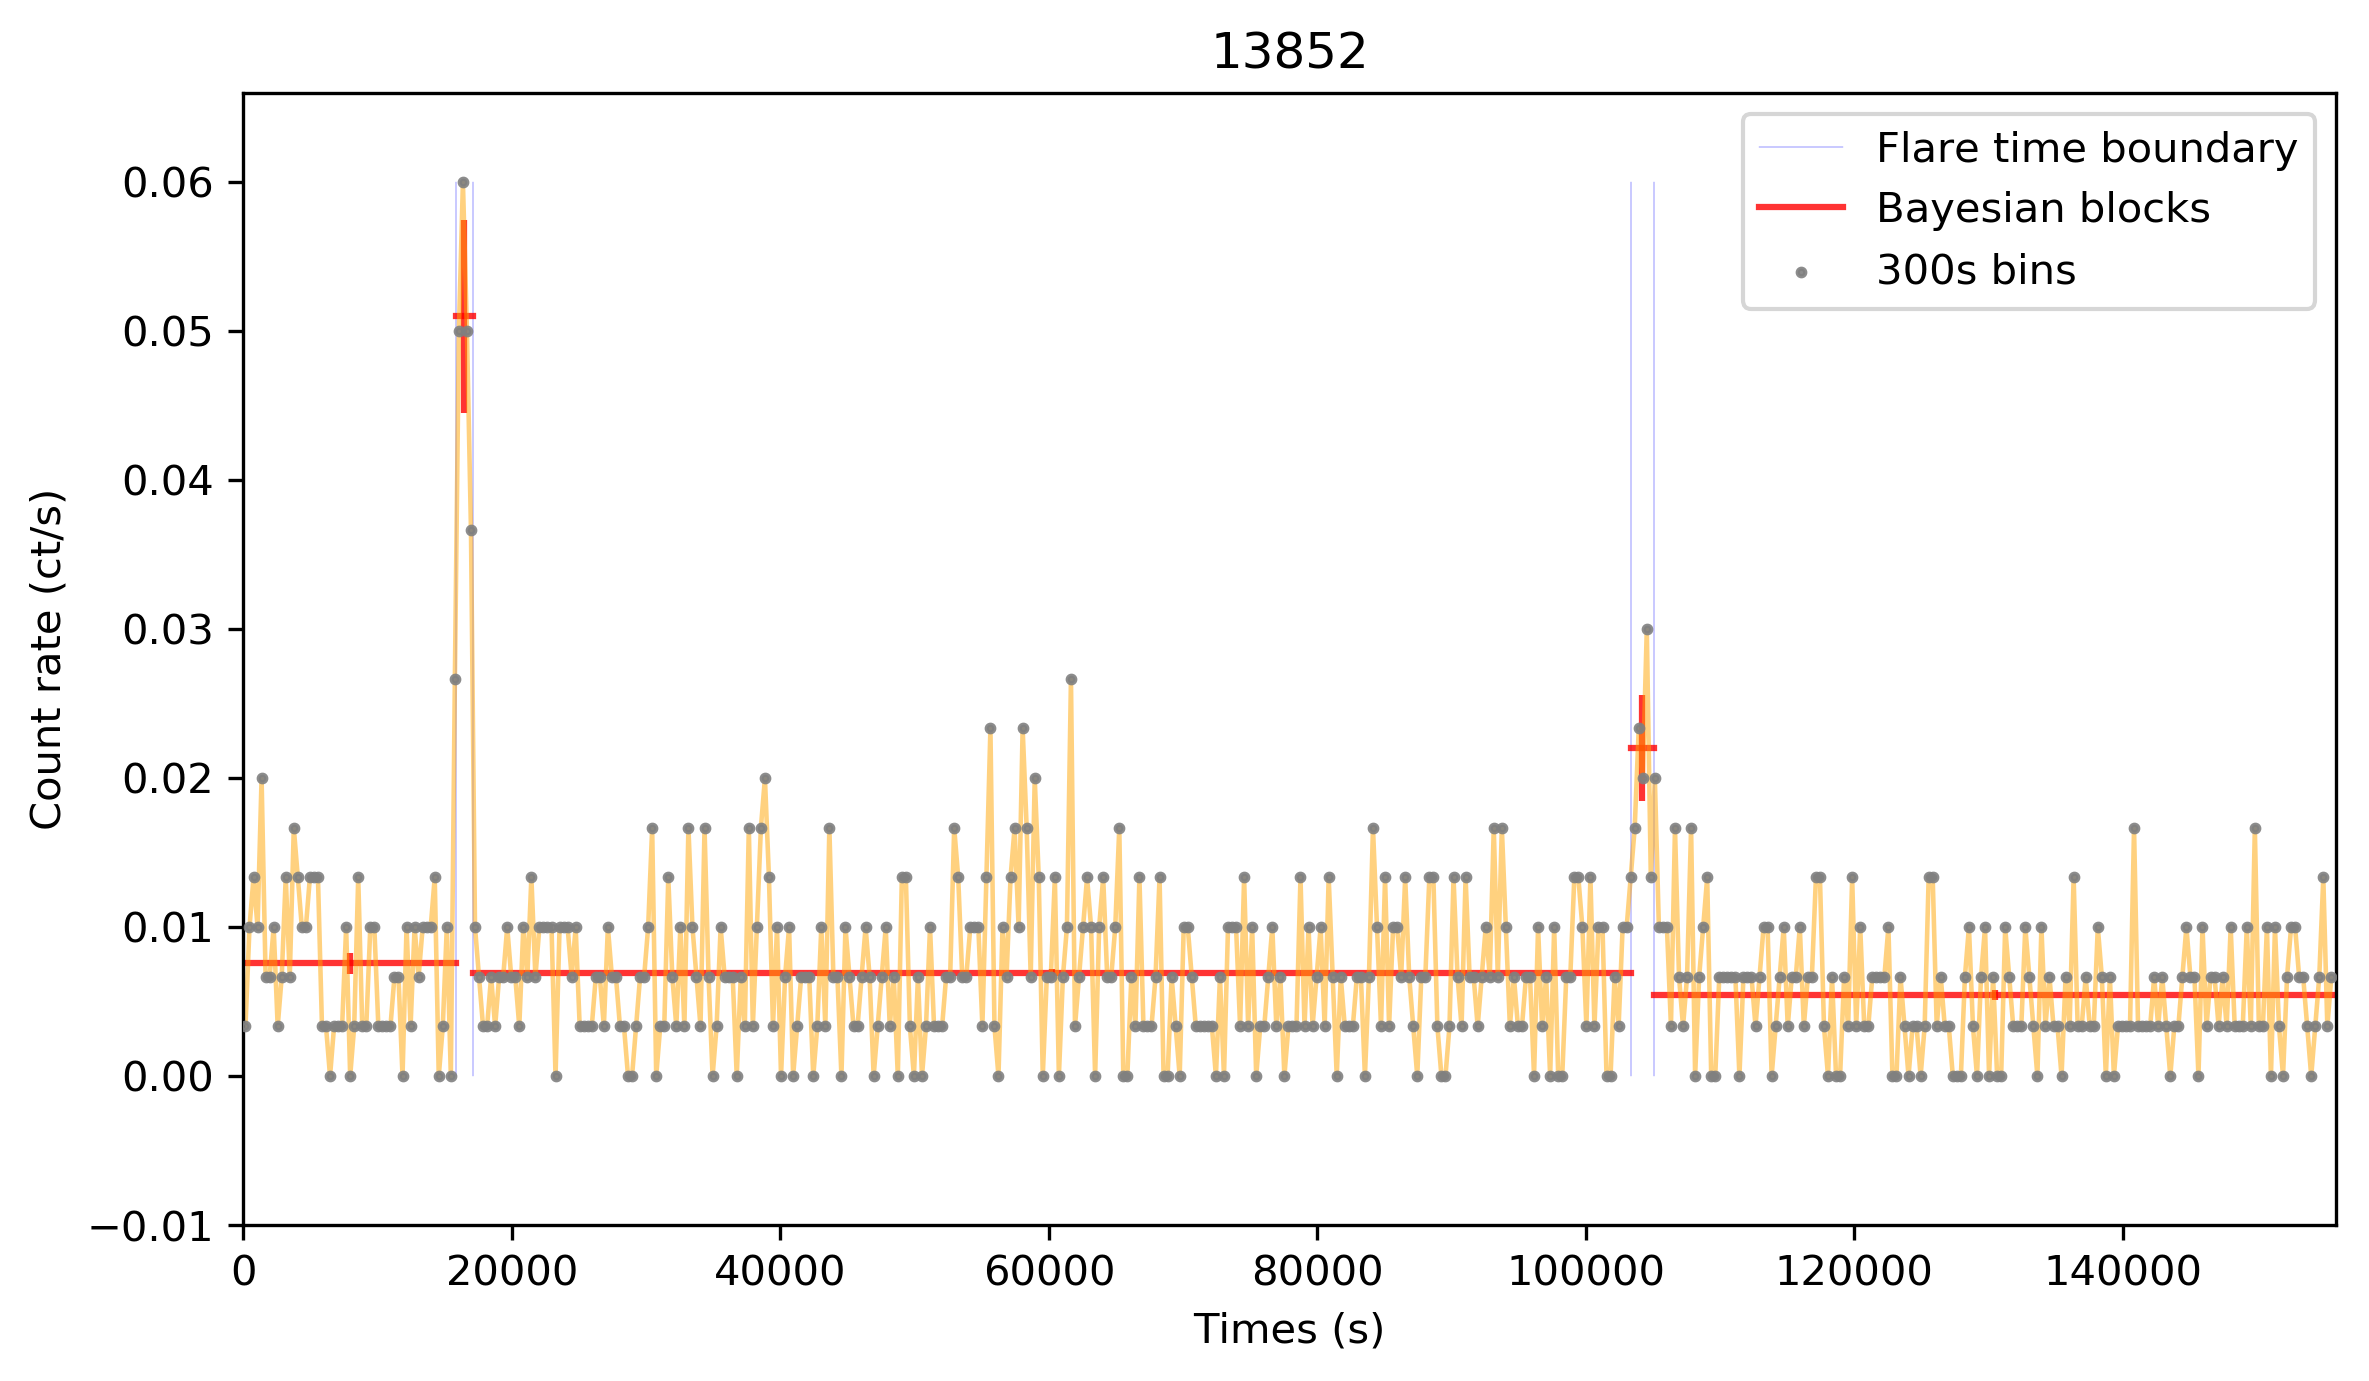

fff [ 102477.31199996]
ObsID:  14439 
 Max count rate = : 0.0366666666667


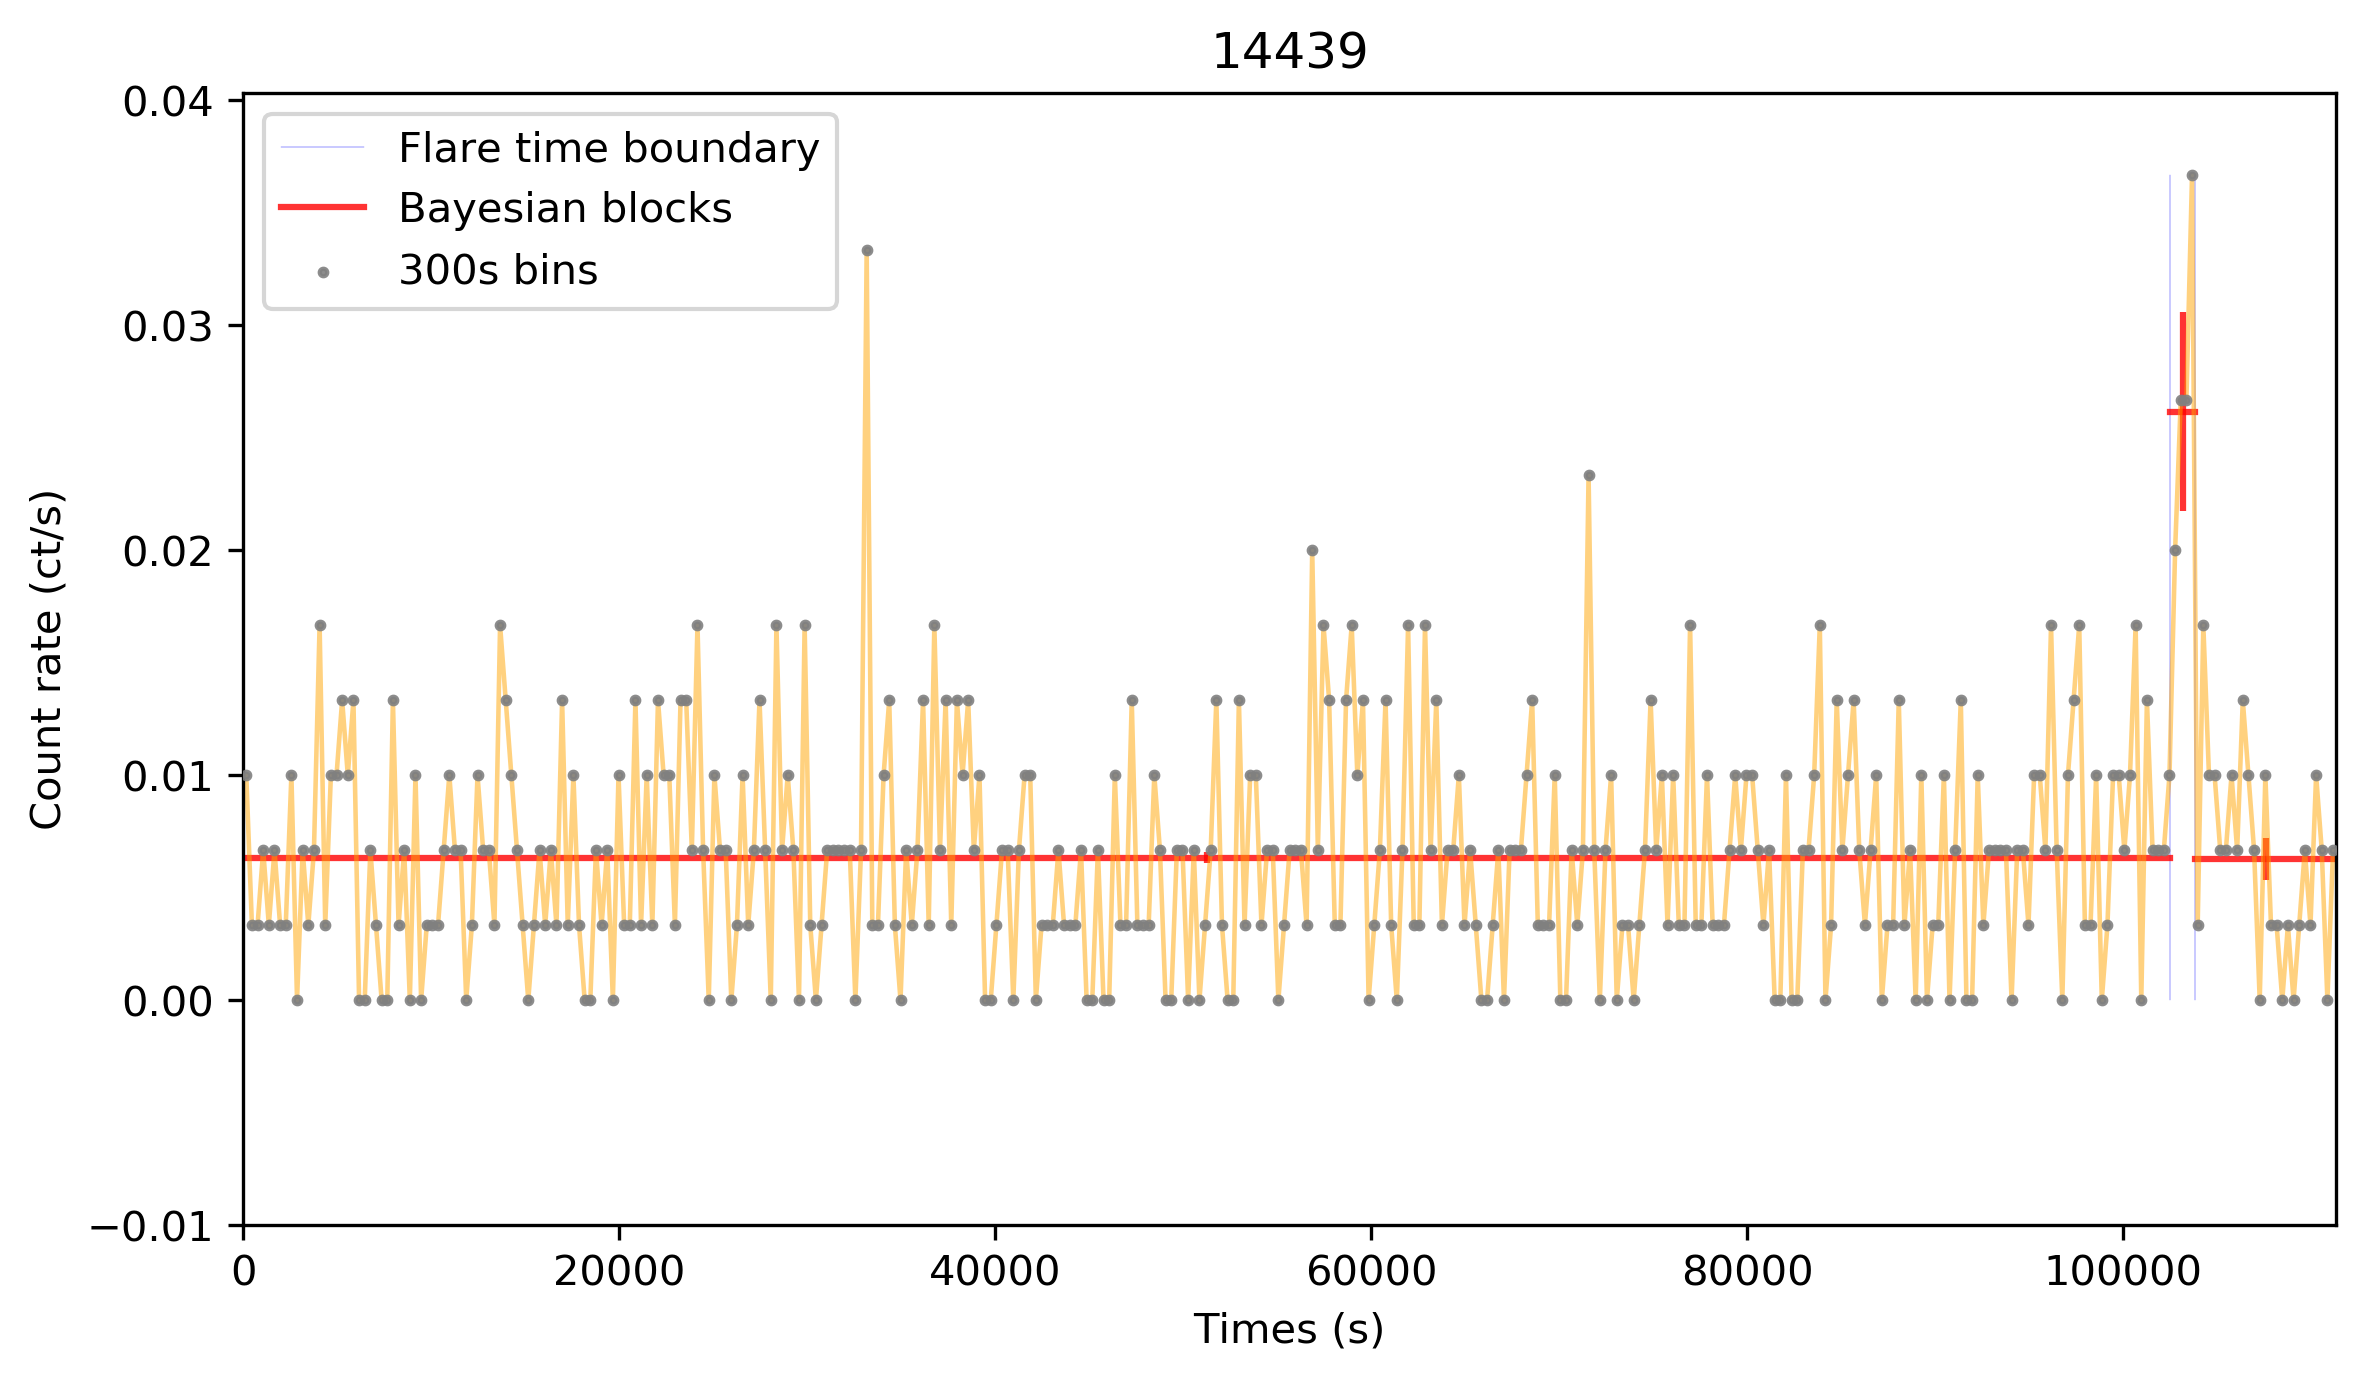

low counts: [3]
fff [  41042.59199949  128048.2559996 ]
ObsID:  14462 
 Max count rate = : 0.05


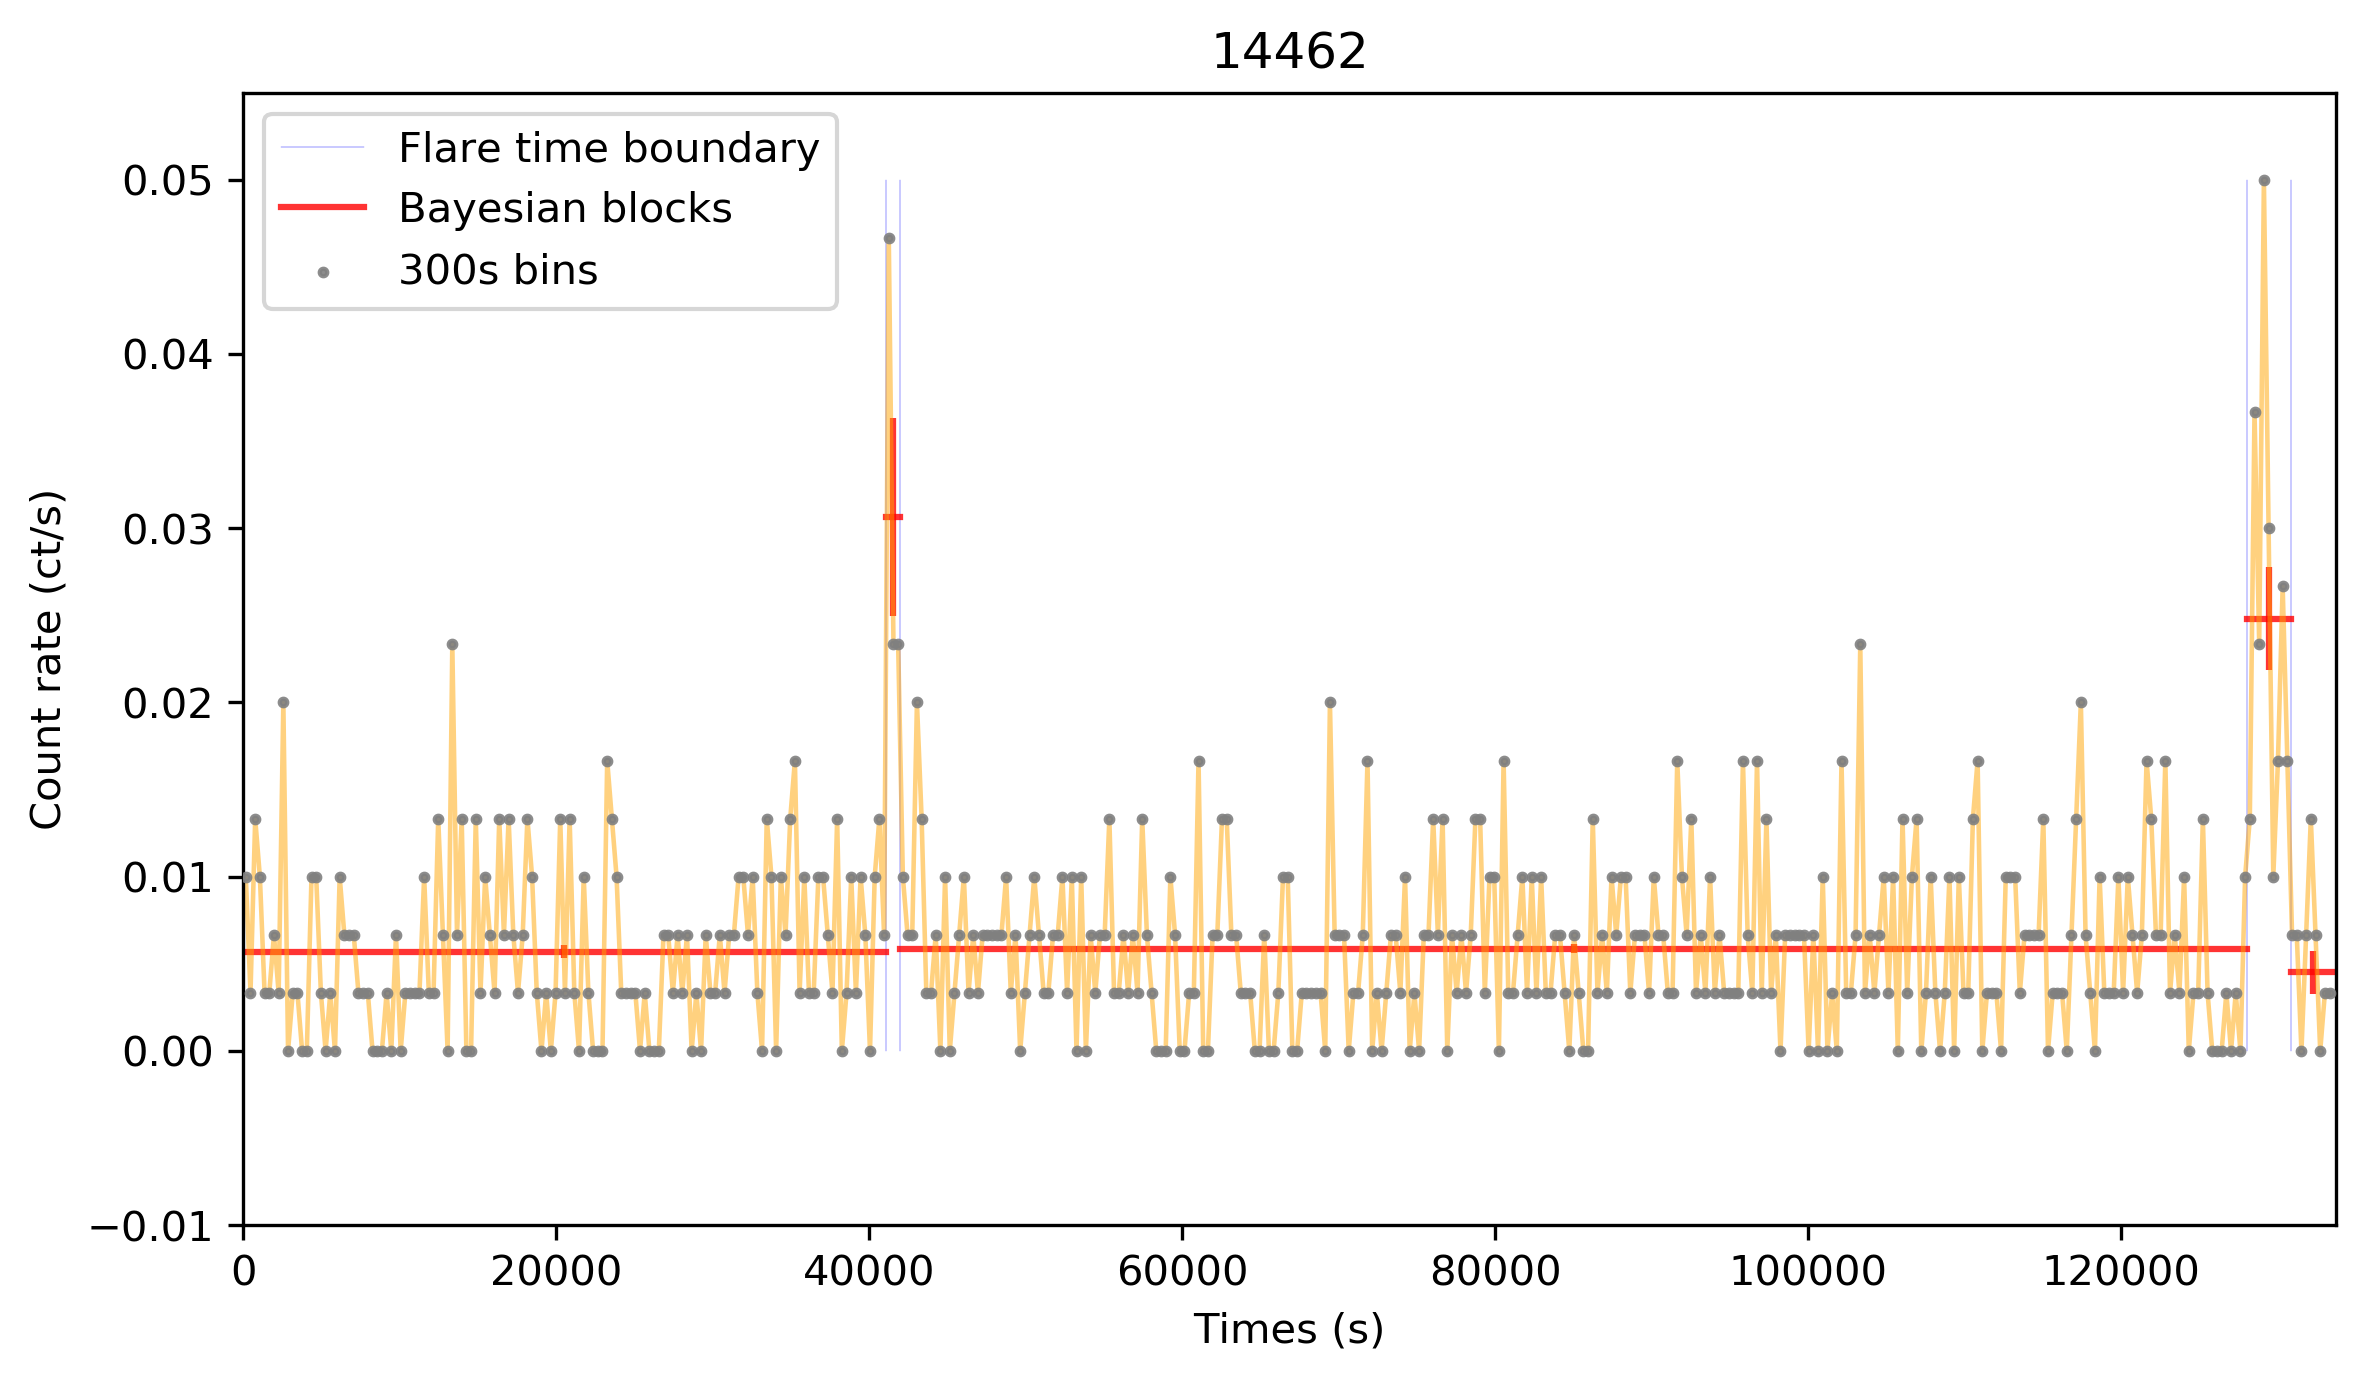

fff [ 16463.51999994]
ObsID:  14463 
 Max count rate = : 0.113333333333


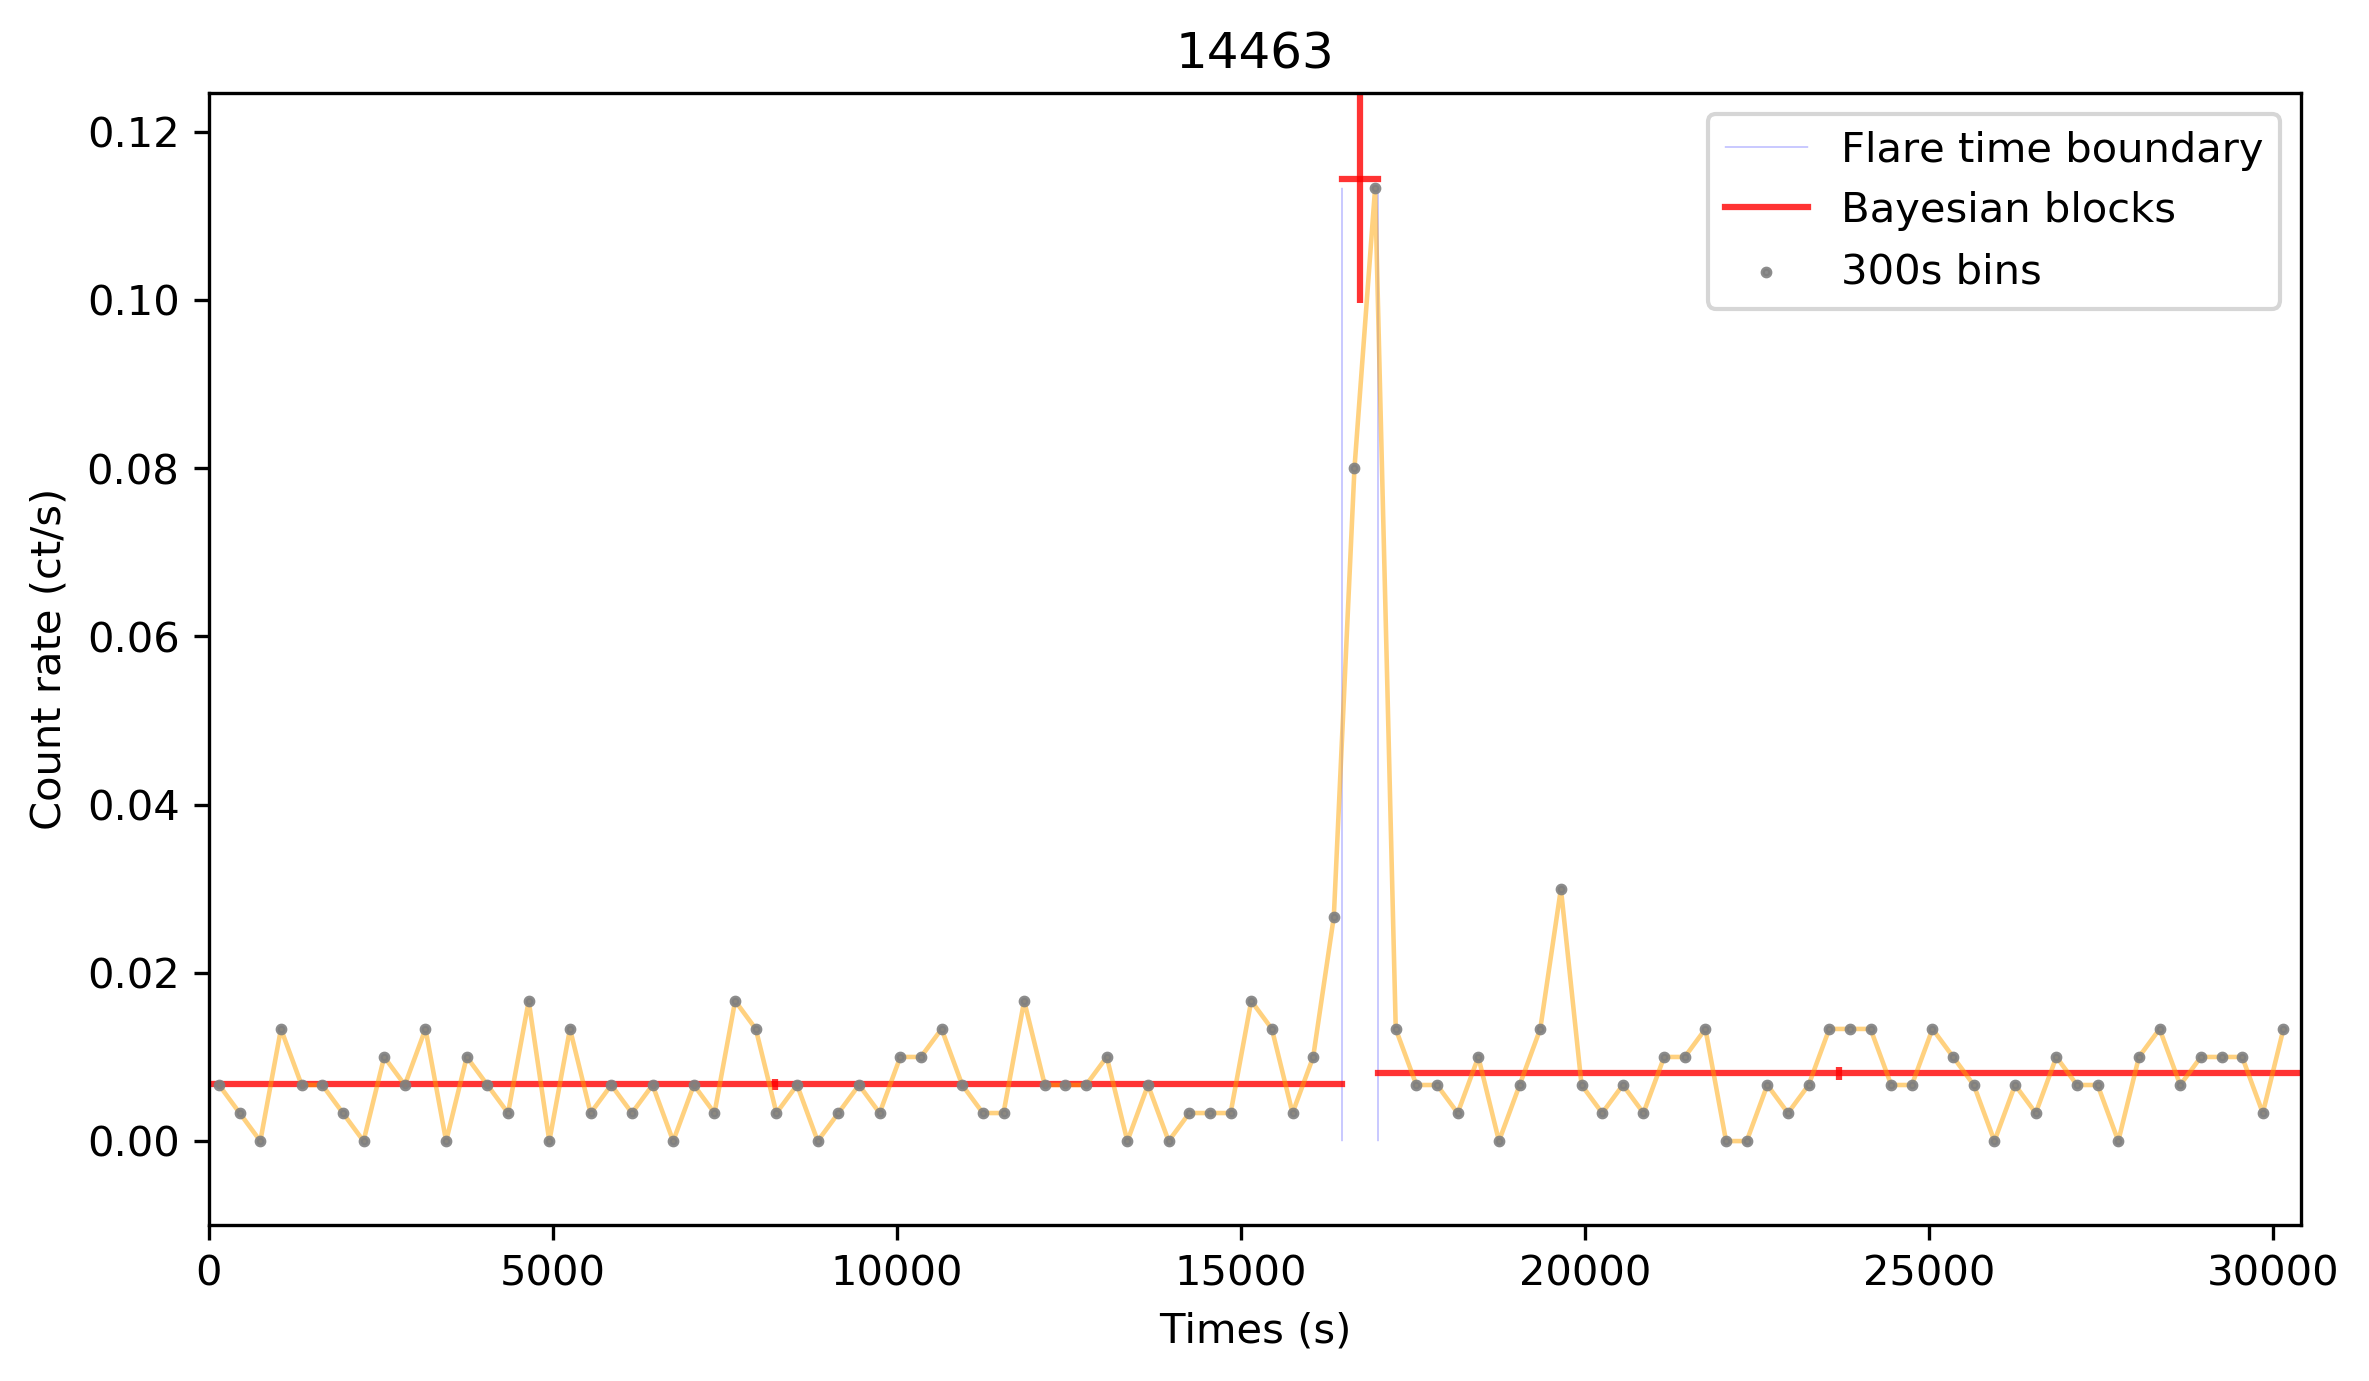

fff [ 24908.25600035  87003.93600015]
ObsID:  13851 
 Max count rate = : 0.176666666667


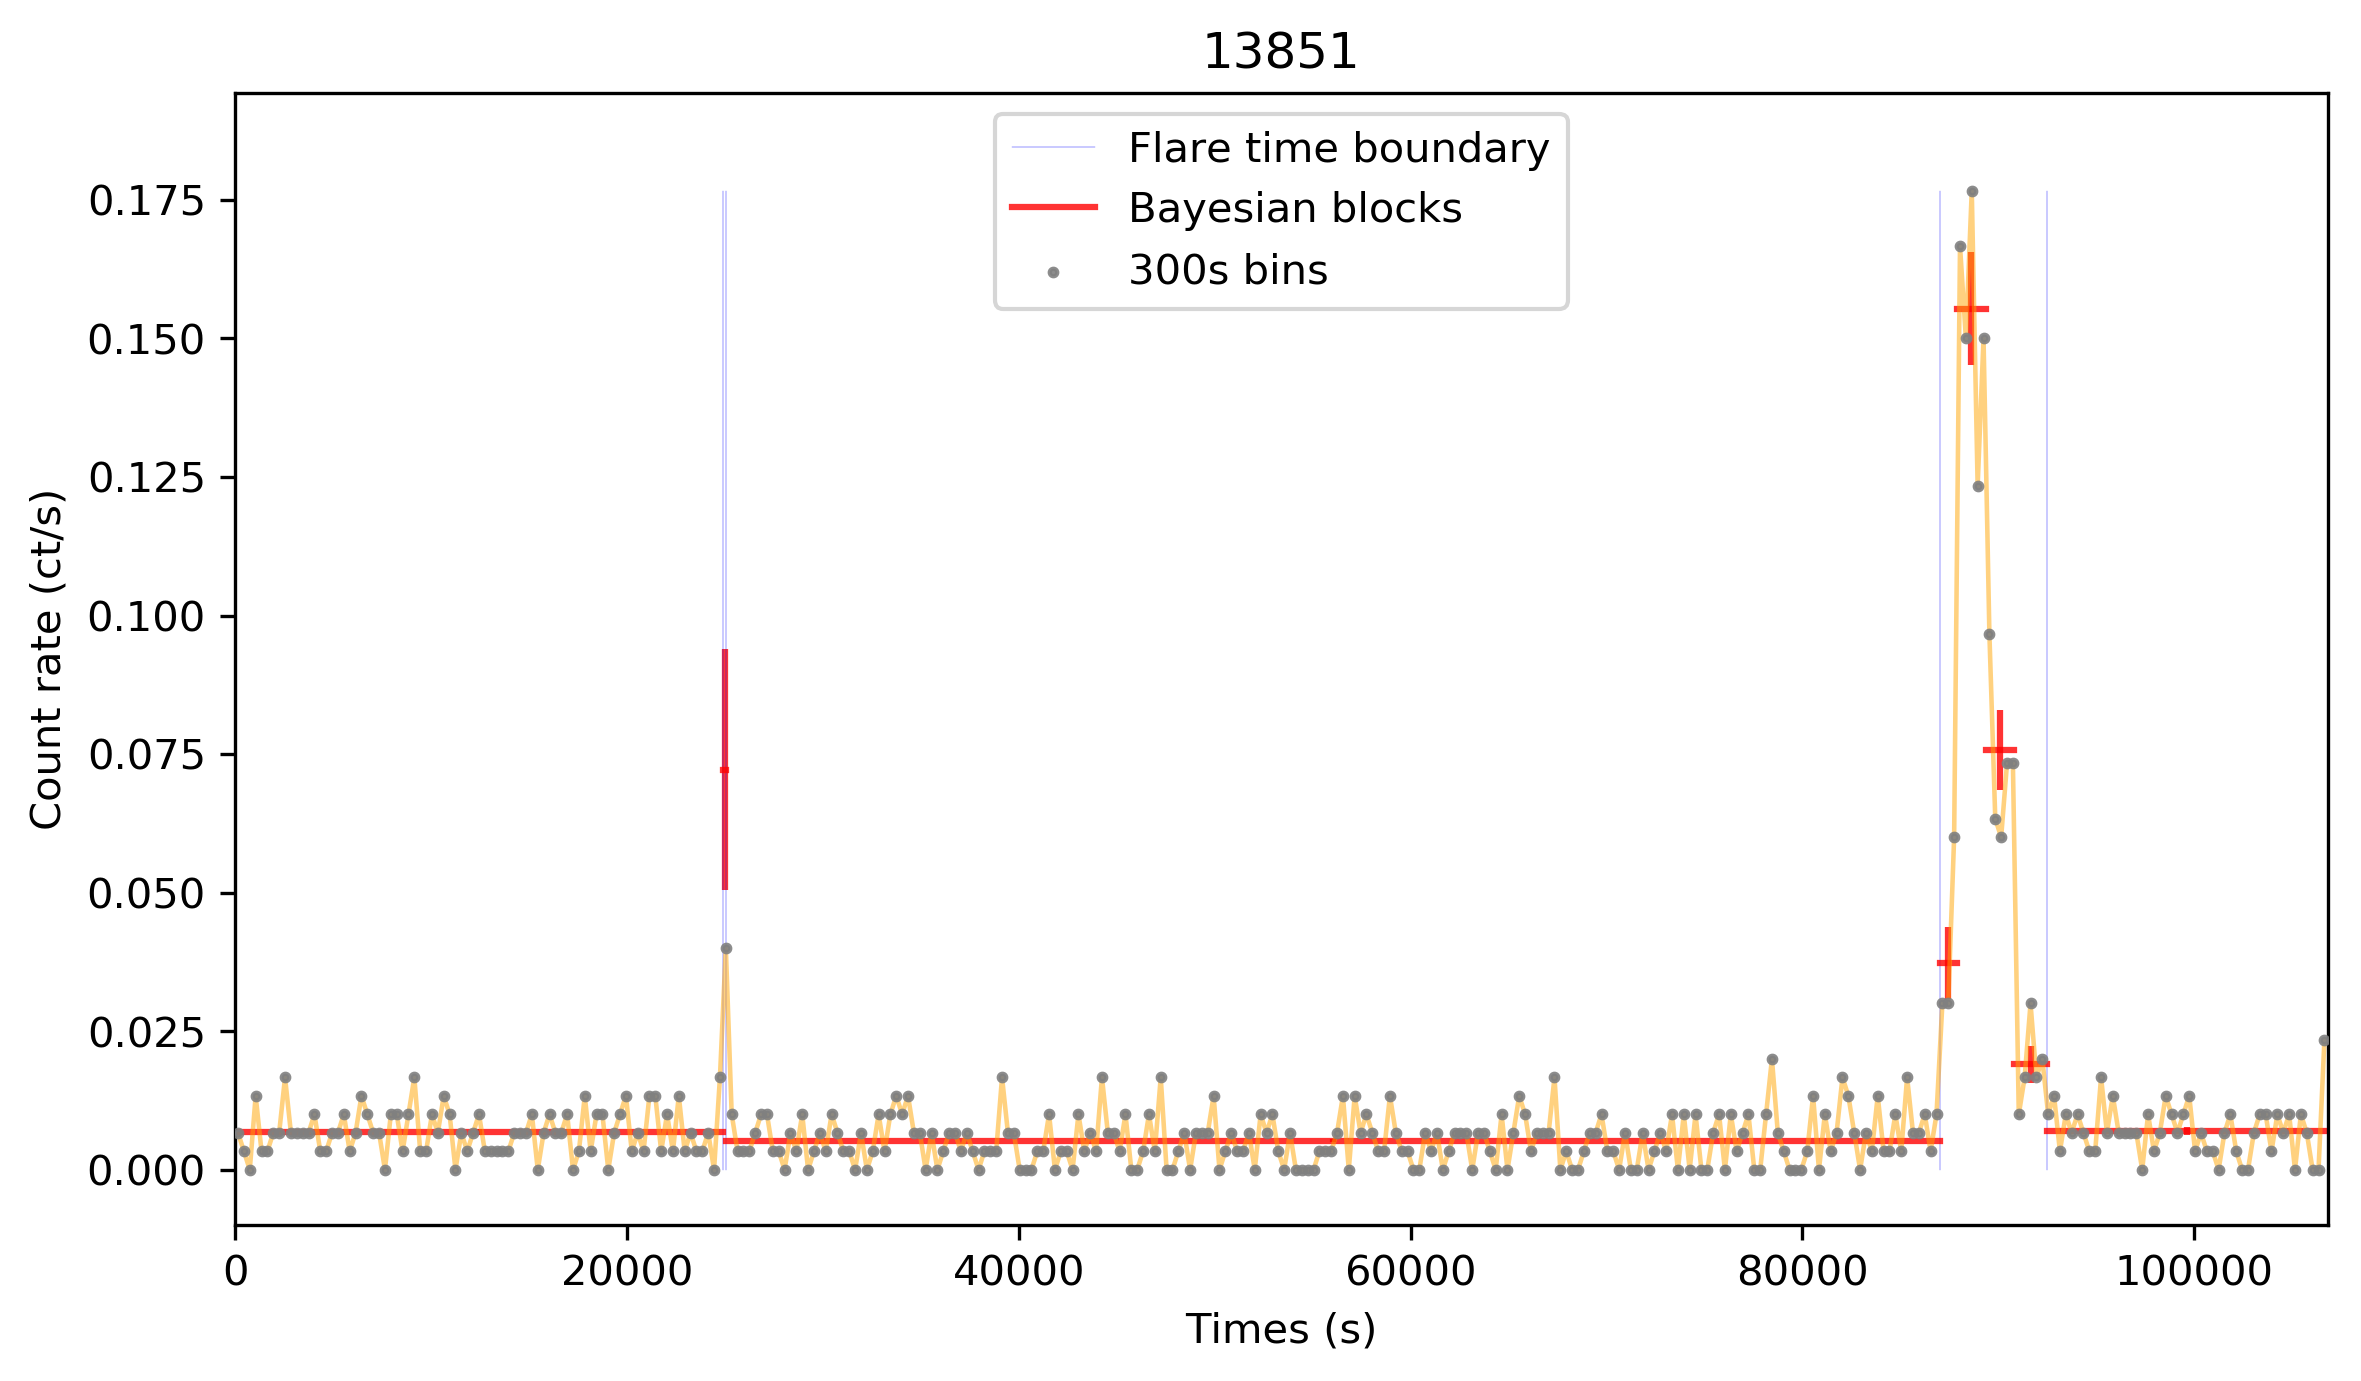

ObsID:  15568 
 Max count rate = : 0.03


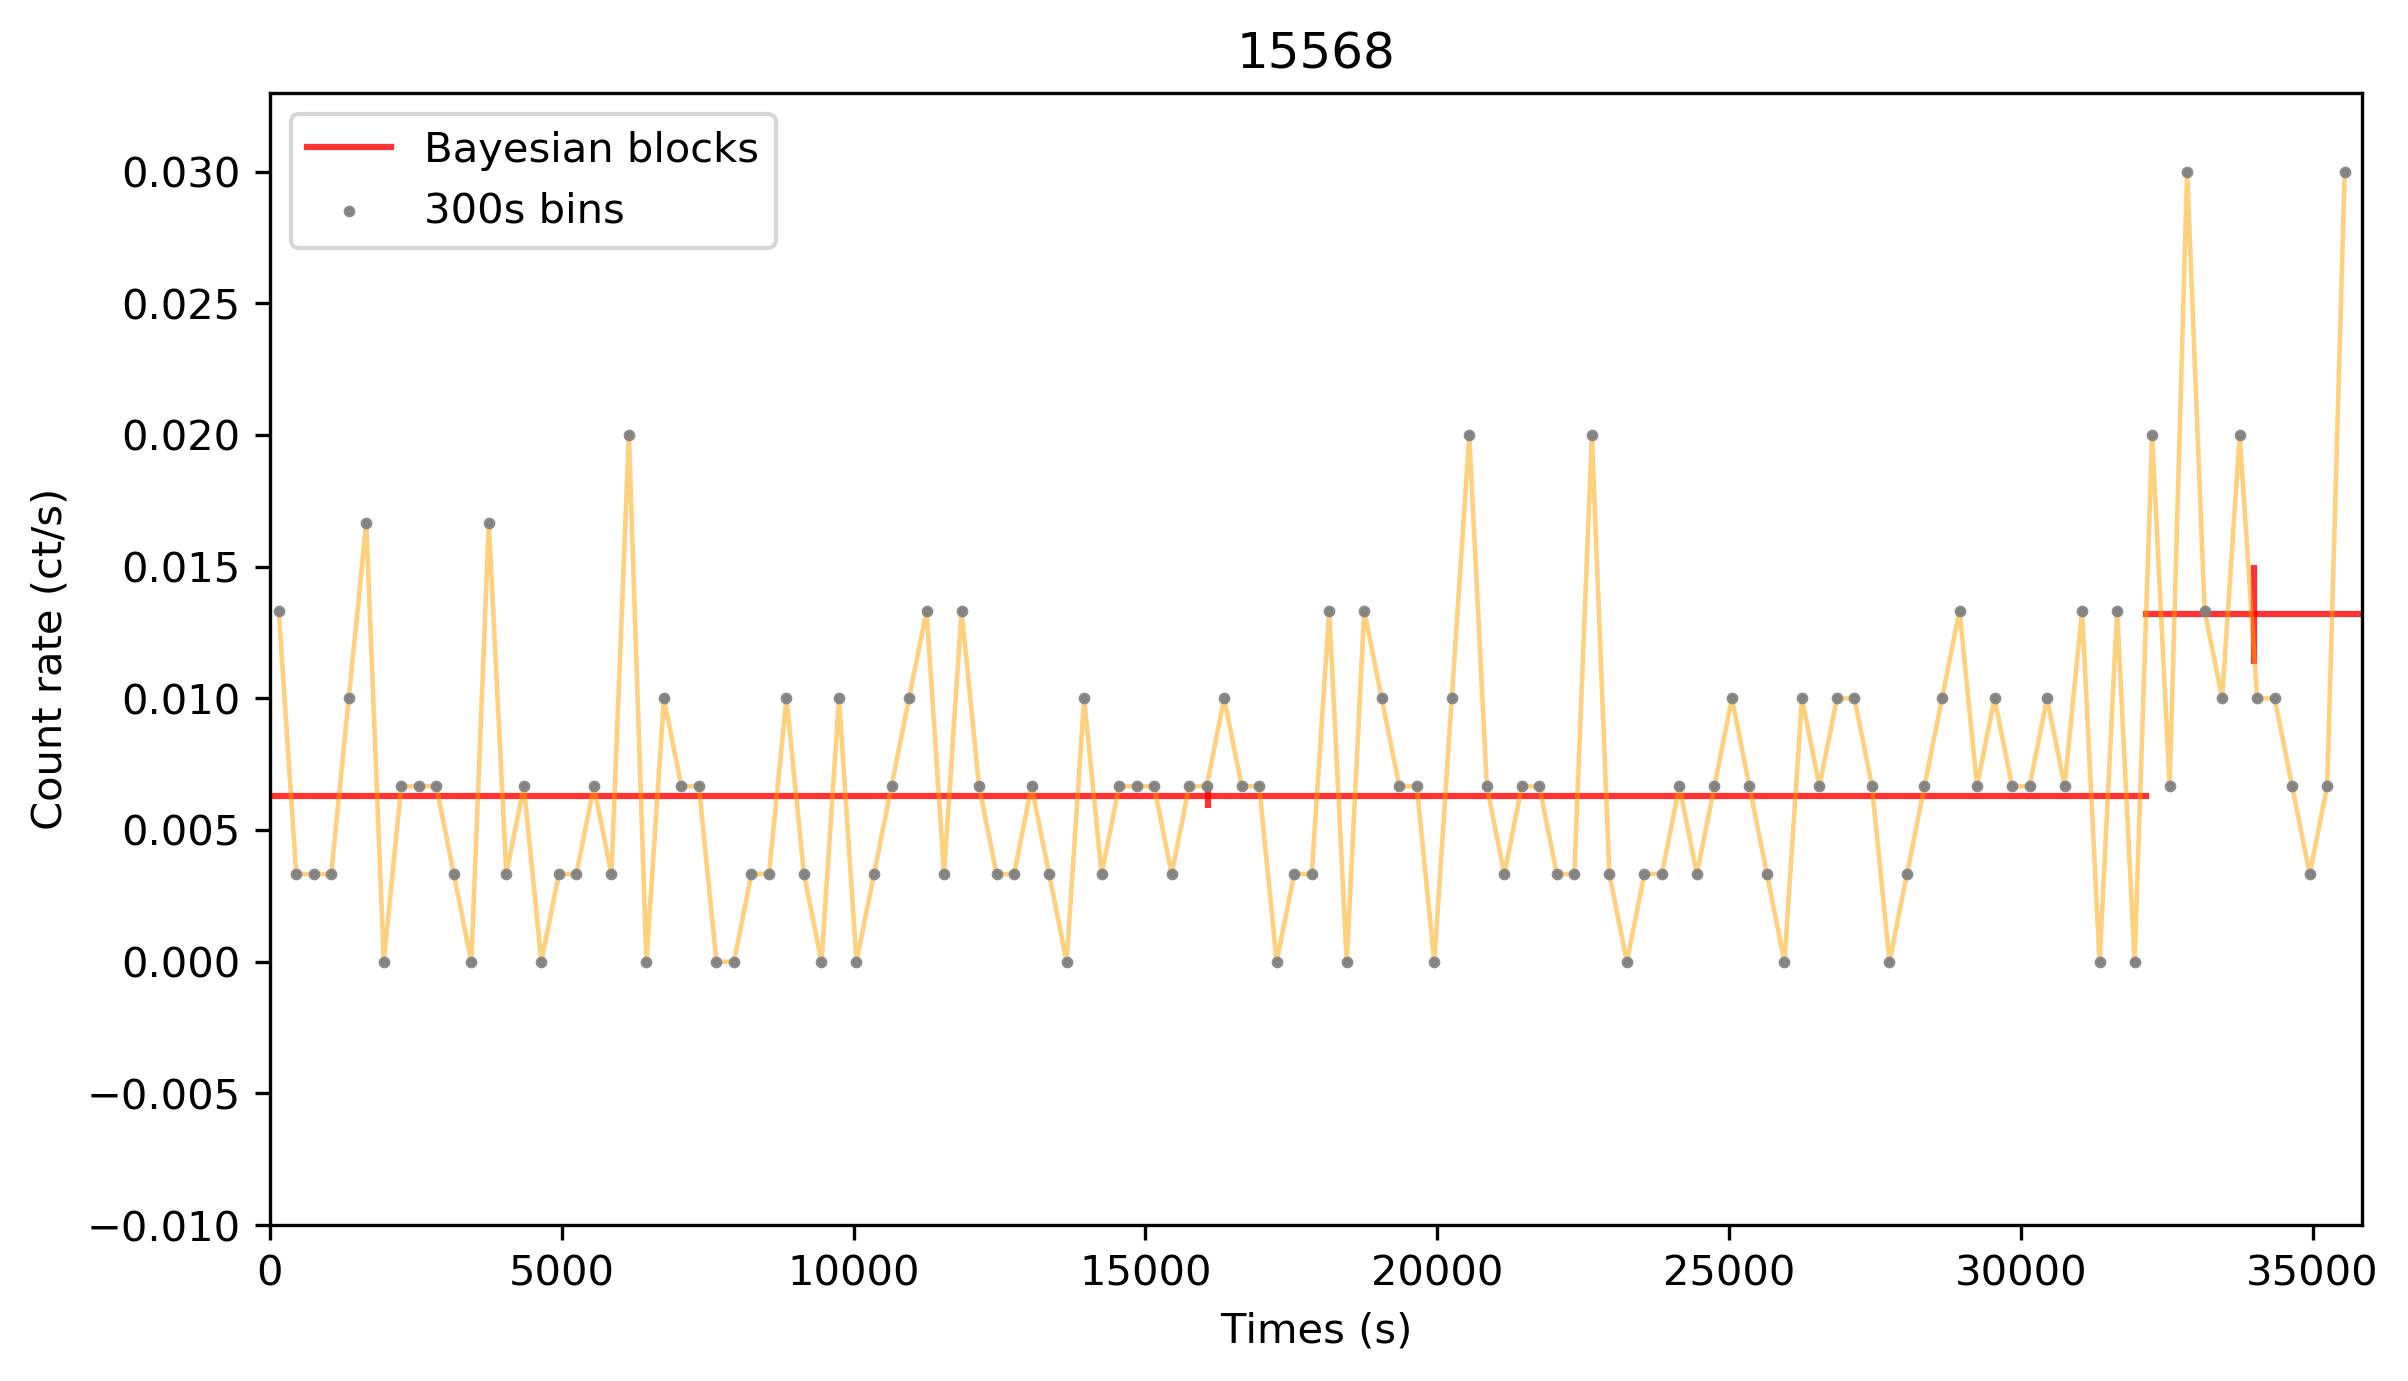

fff [ 60345.21600001]
ObsID:  13843 
 Max count rate = : 0.11


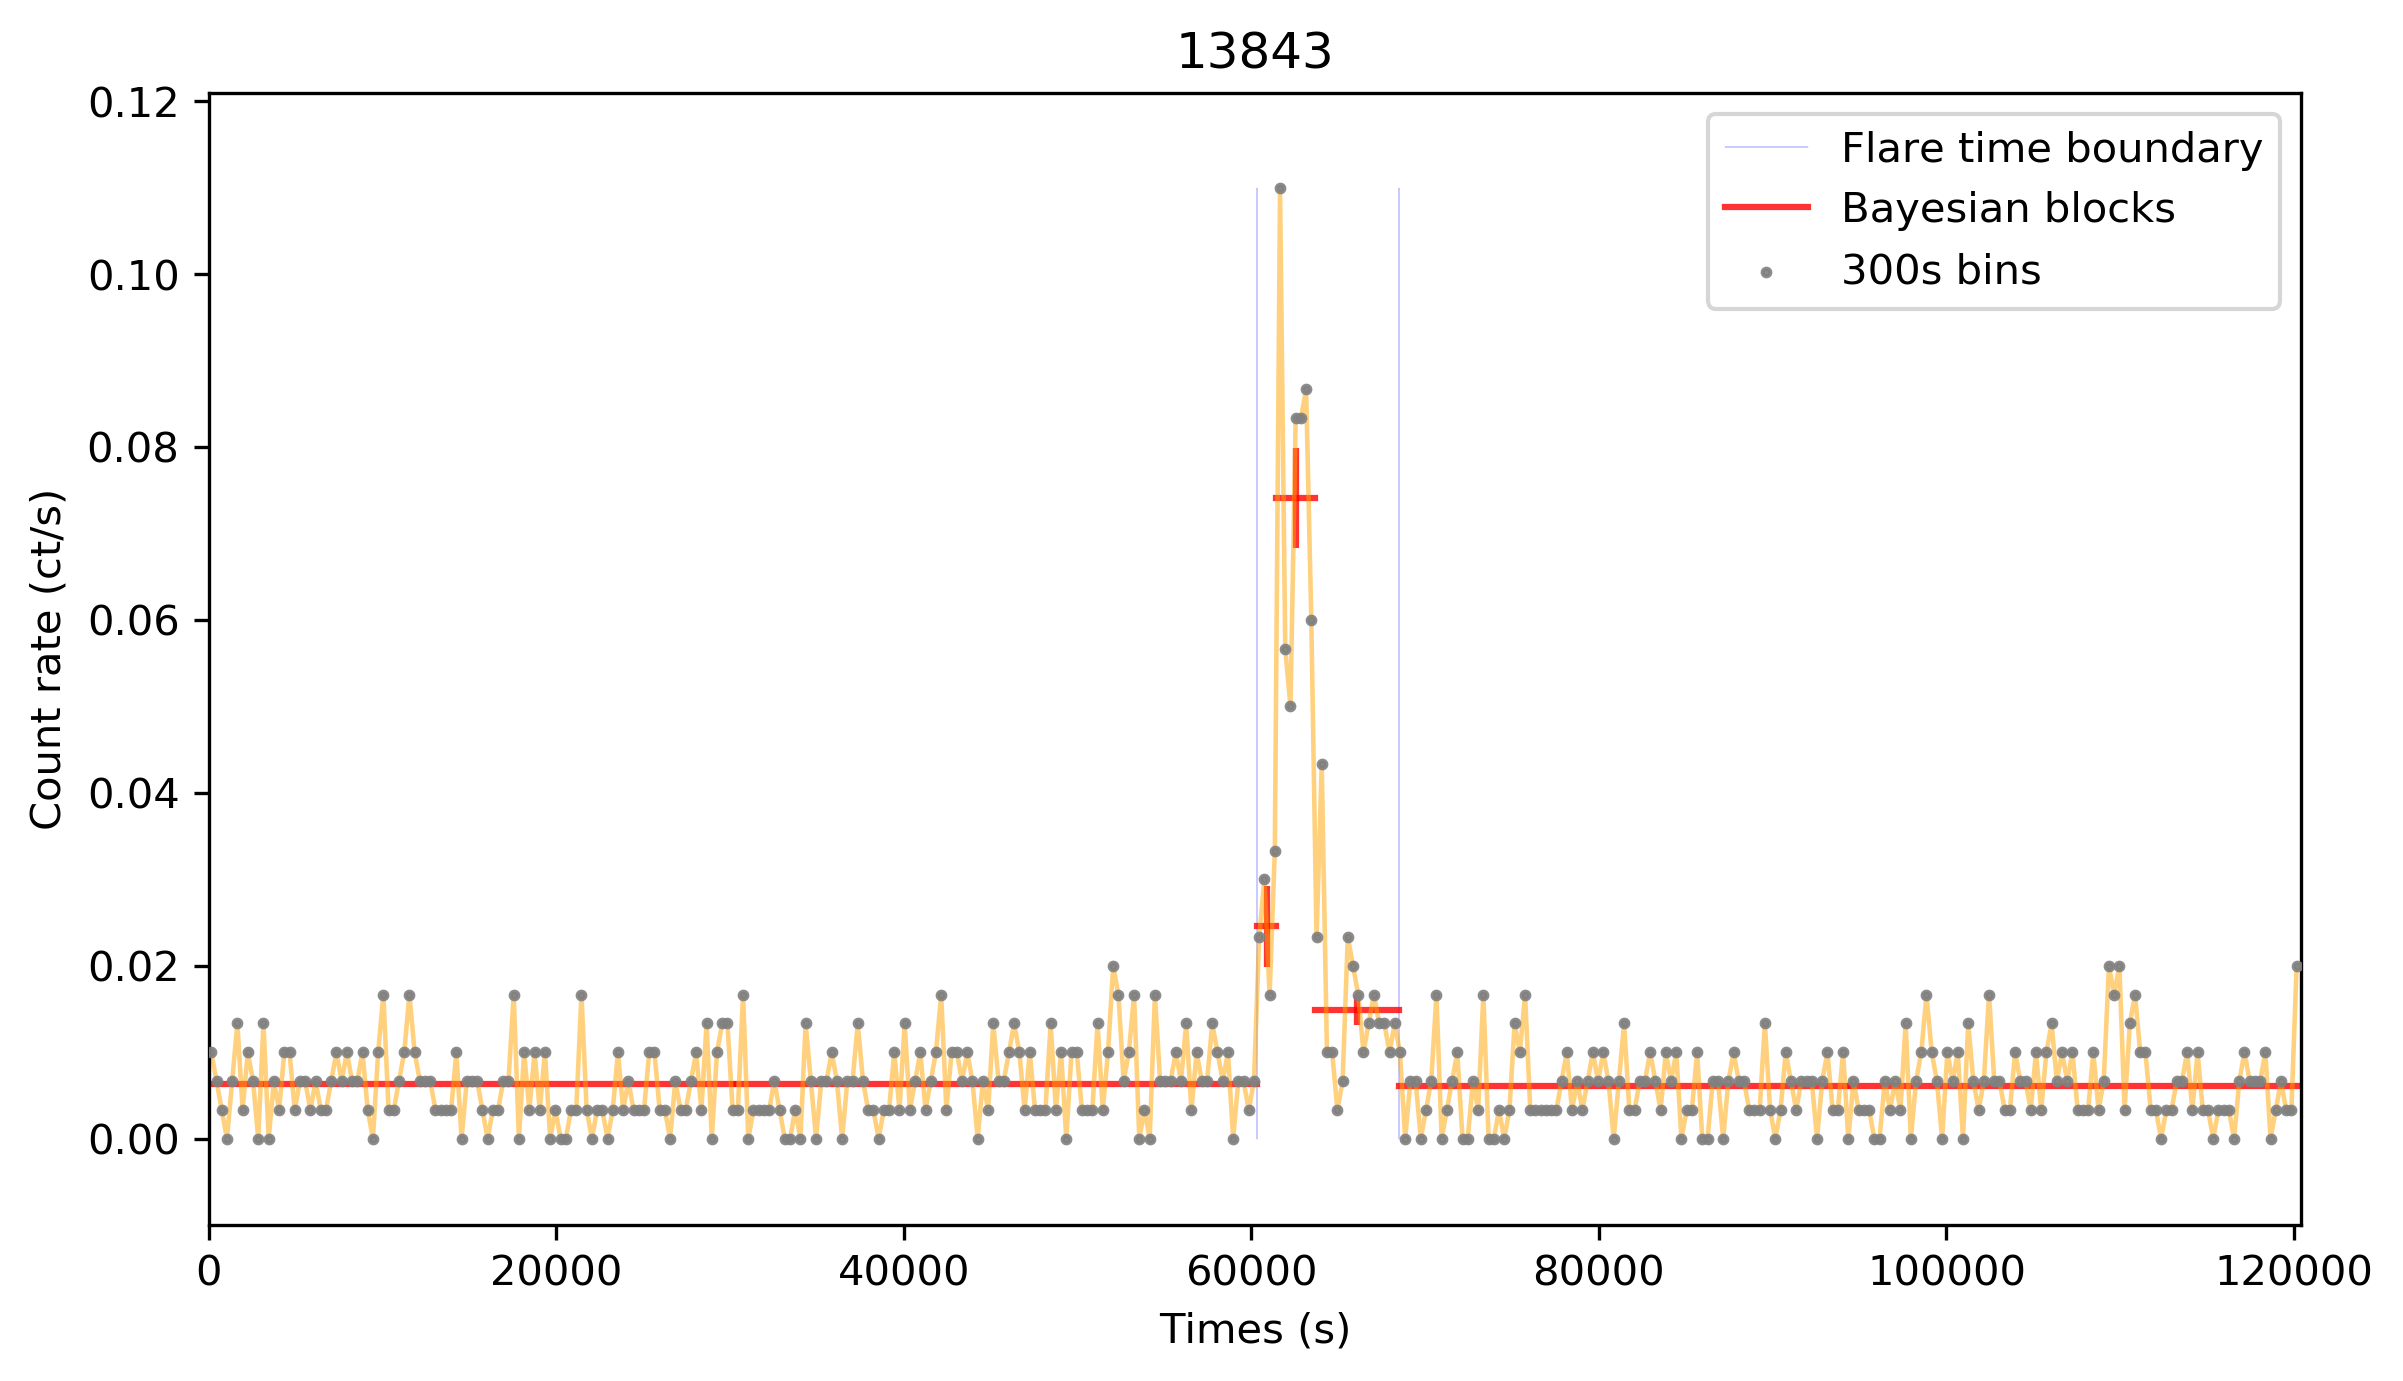

fff [ 6107.61600004]
ObsID:  15570 
 Max count rate = : 0.07


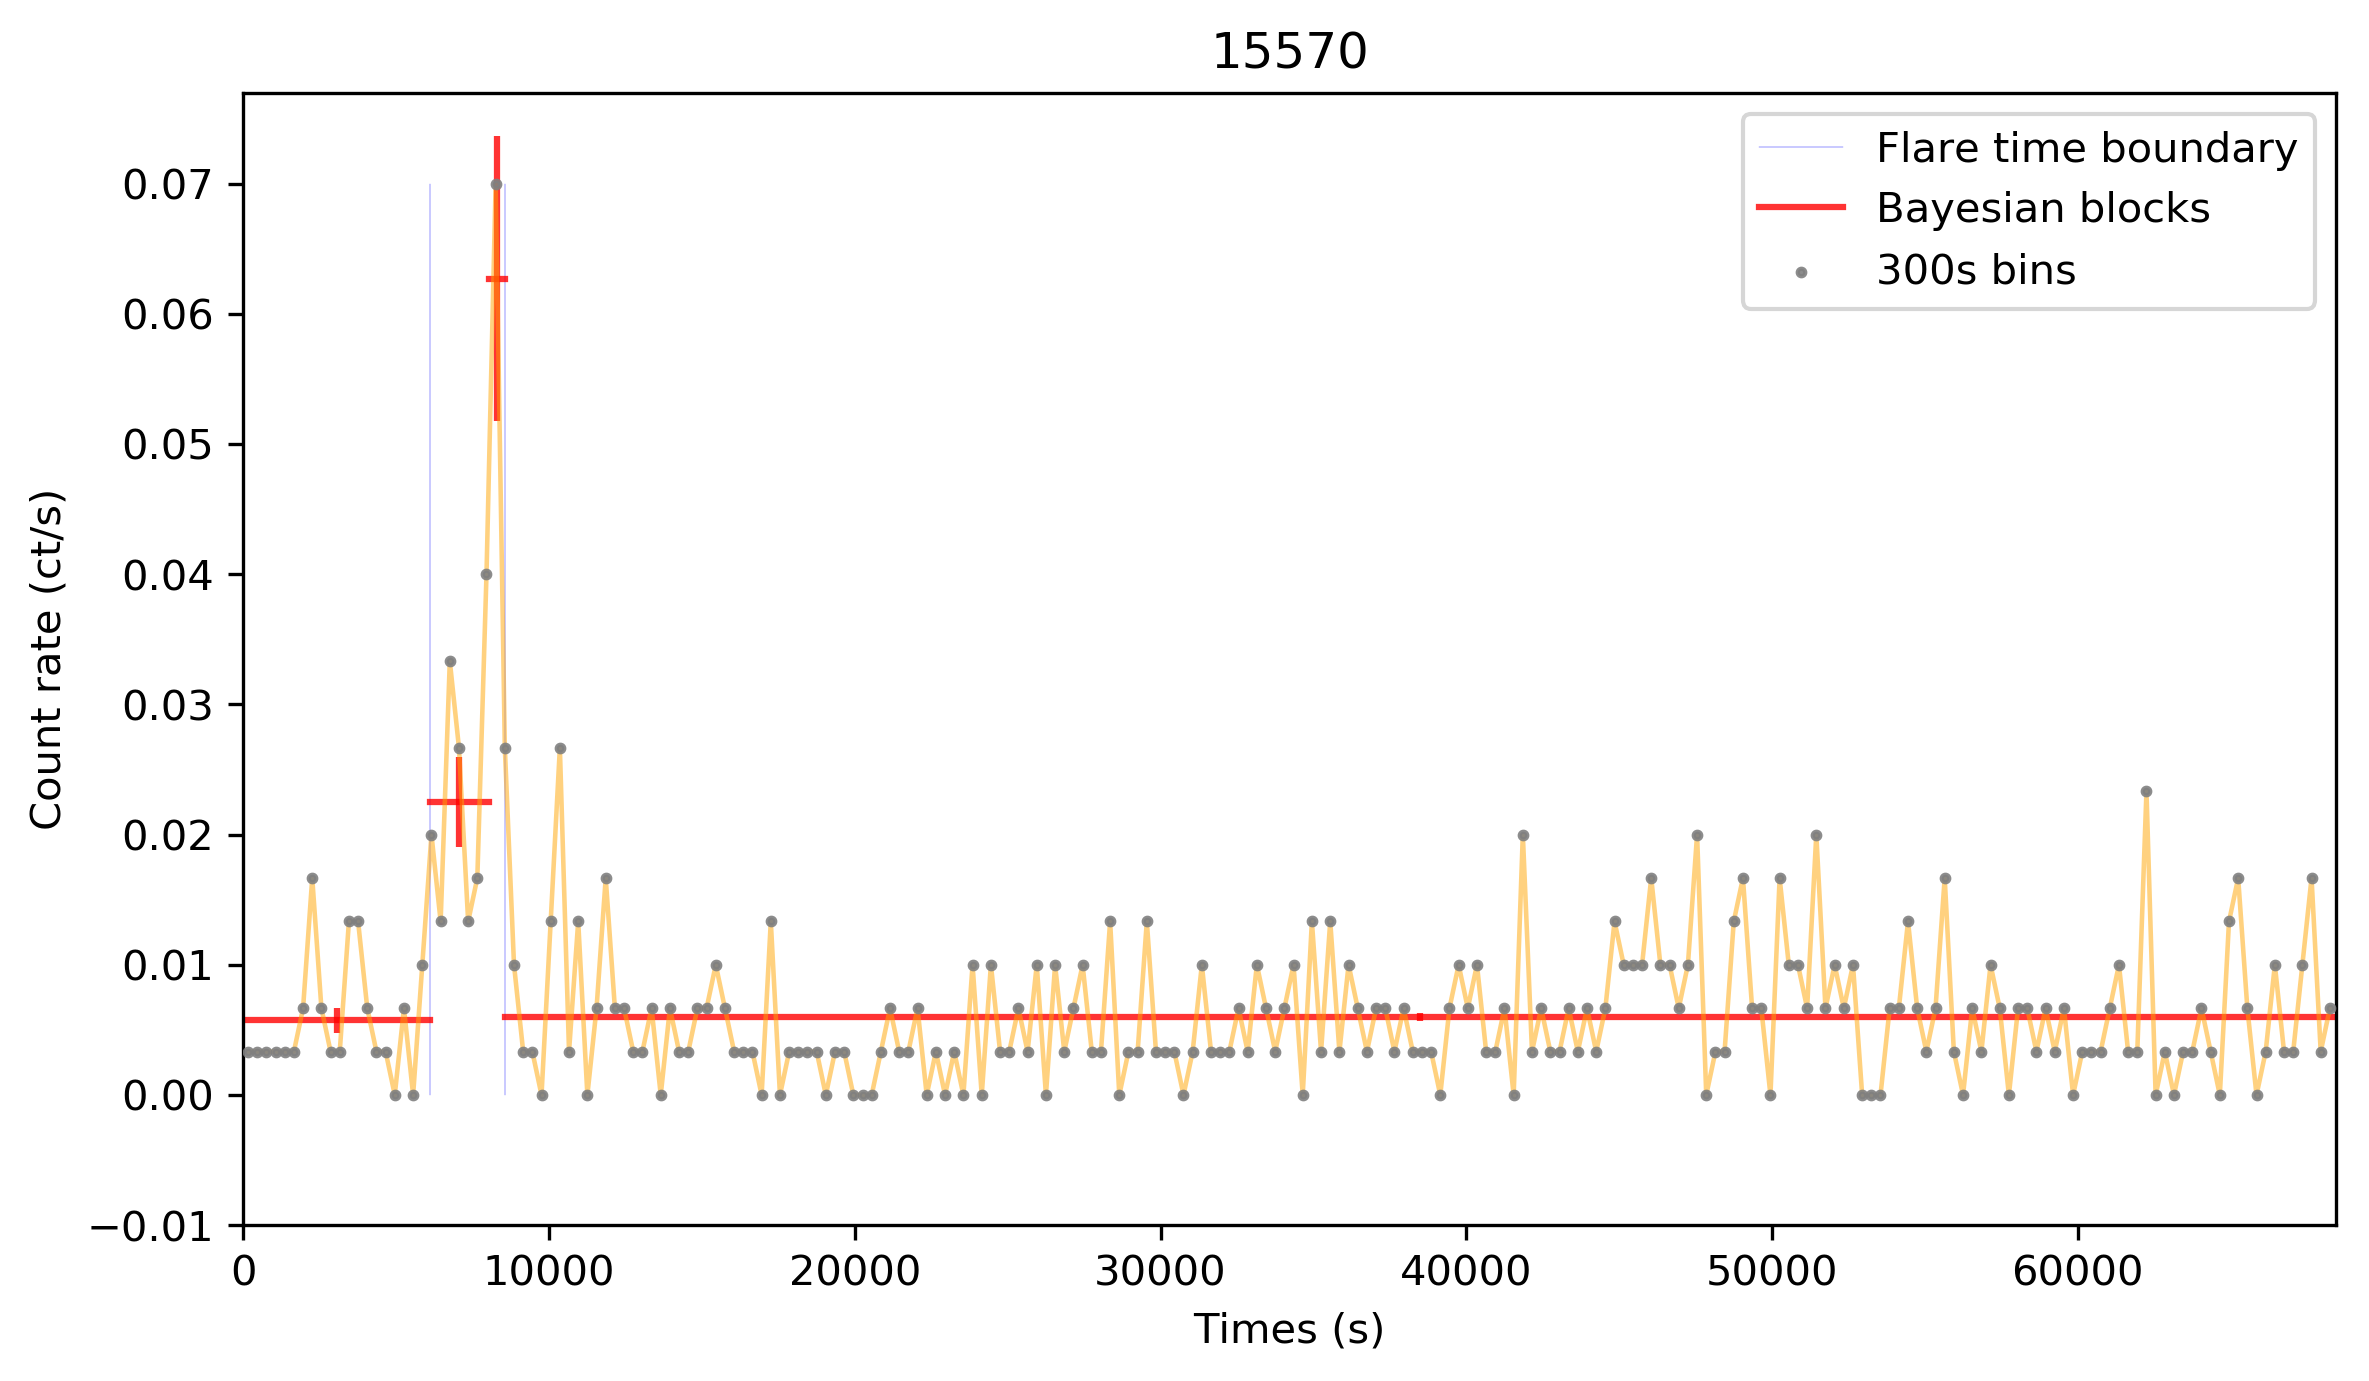

fff [  24655.10400014  134413.34400005]
ObsID:  14468 
 Max count rate = : 0.05


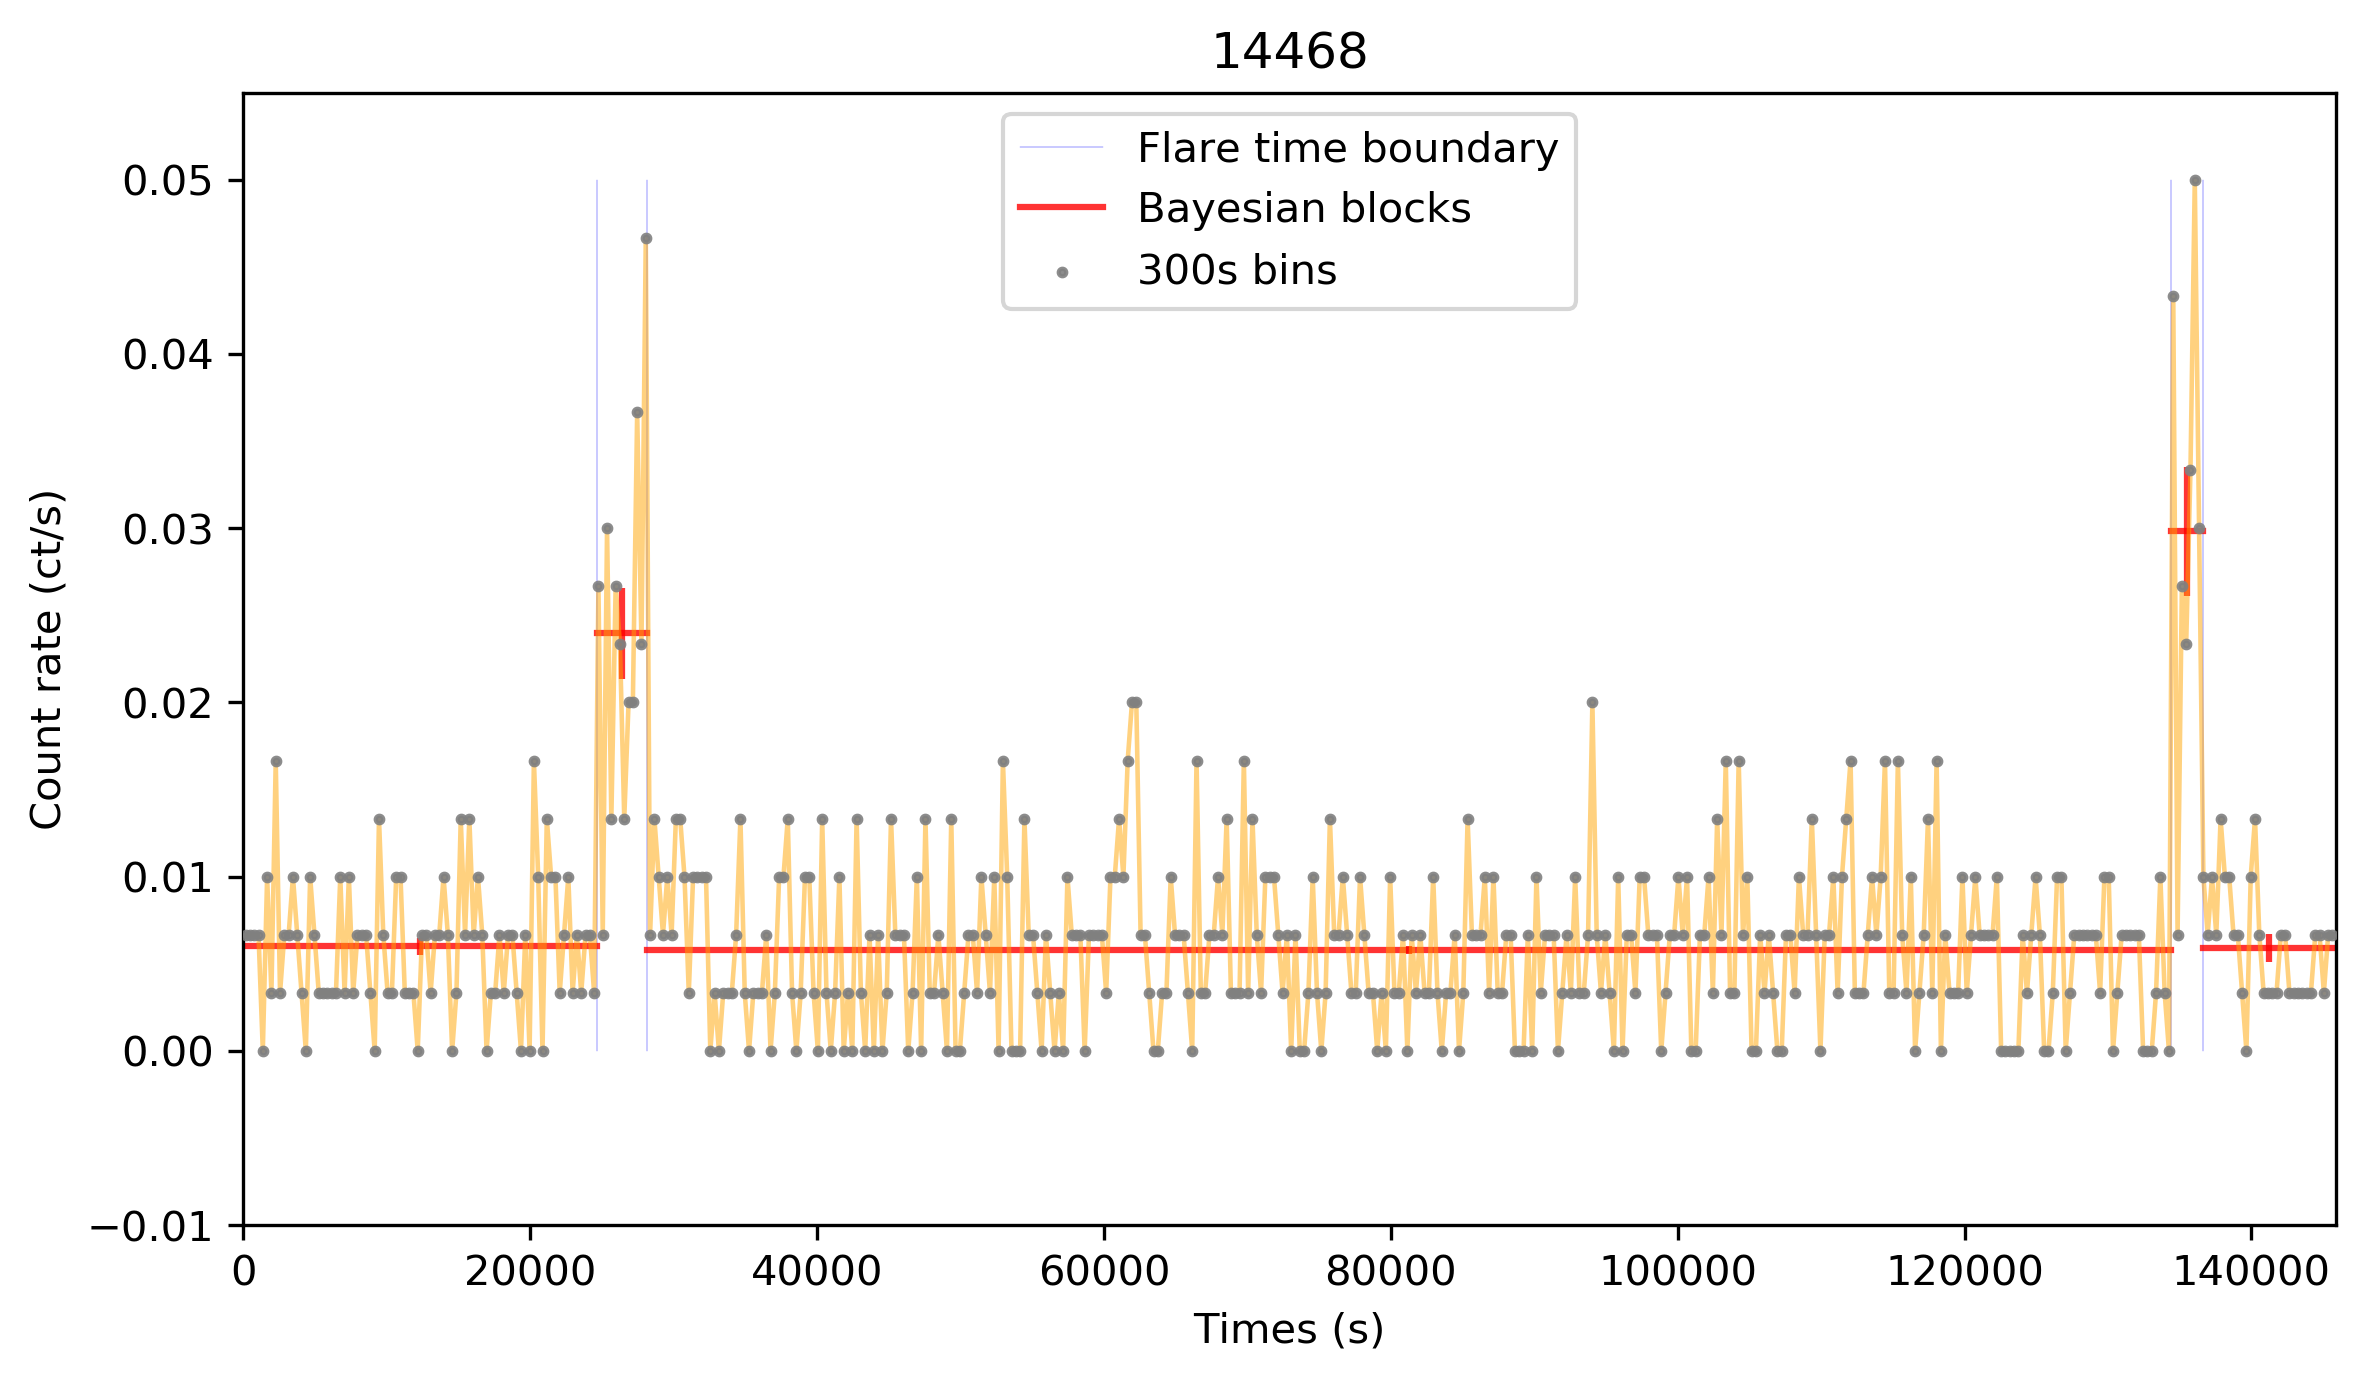

In [3]:
#Modified on May 31st to extract the pcr of each flare. The fact that this code doesnt handle pile-up
#doesnt matter because those values are raw.

#THIS CODE MAKES THE LIGHT CURVES WITH BAYESIAN BLOCKS OVERPLOTTED, WITH FLARE BOUNDARIES LIKE FOR THE
#POST-XVP CASE

###############IN THIS XVP CASE, THIS FUNCTION'S ONLY PURPOSE IS TO GET THE FLARE START AND END TIMES
###############DO NOT USE THE CR IT GIVES AS THE PILE IS NOT HANDLED CORRECTLY HERE!!!!!!!!!!!!!
###############FOR CORRECT FLARE PILE-UP CORRECTED COUNT RATES, SEE THE PYTHON CODE
############### Quiescence-Flare-OrderRatioPCOREACHBLOCK_NoFlareSepCrit-with-14413.PY!!!!!!



from astropy.io import fits
import sys
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math

bin_size = 300.

def binnyboy(bin_size, T, time_evt):
    
    '''
    Bins the event data
    Parameters
    ----------
    bin_size:  int
        Duration of a bin (s)
    
    T     : int
        Duration of the observation (s)
        
    time_evt: array
        The event array to be binned (s)
    
    Returns
    ----------
    bin_array: array
        Array of all the bin times (s)

    binned_cr: array
        Array of all the binned count rates (ct/s)
        
    binned_cr_err: array
        Array of Poisson error of the binned count rates (ct/s)
    '''
    bin_array = (bin_size/2.+bin_size*np.arange(int(T/bin_size)))
    binned_cr = np.empty(len(bin_array))
    binned_cr_err = np.empty(len(bin_array))
    f = 0.
    for i in range(len(bin_array)):
        if i == 0:
            if len(bin_array) == 1:
                b = time_evt 
                binned_cr[i] = len(b)/bin_size
                binned_cr_err[i] =  math.sqrt(b.sum())/bin_size
            else:
                b = time_evt <= bin_array[i:i+2].mean()
                binned_cr[i] = b.sum()/bin_size
                binned_cr_err[i] =  math.sqrt(b.sum())/bin_size
        elif i == len(bin_array) - 1:
            a = time_evt > bin_array[i]-bin_size/2.
            #b = time_evt <= bin_array[i]+bin_size/2.
            #c = a & b
            binned_cr[i] = a.sum()/bin_size
            binned_cr_err[i] =  math.sqrt(a.sum())/bin_size
        else:
            a = time_evt > bin_array[i]-bin_size/2.
            b = time_evt <= bin_array[i]+bin_size/2.
            c = a & b
            binned_cr[i] = c.sum()/bin_size
            binned_cr_err[i] =  math.sqrt(c.sum())/bin_size
        f = f +  binned_cr[i]*bin_size
    #print(f)
    return bin_array, binned_cr, binned_cr_err

#14413 REMOVED FOR NOW SINCE WCS FAILED
#Now added back
obsids=[13850,
14392,
14394,
14393,
13856,
13857,
13854,
13855,
14413,
14414,
13847,
14427,
13848,
13849,
13846,
14438,
13845,
14460,
13844,
14461,
13853,
13841,
14465,
14466,
13842,
13839,
13840,
14432,
13838,
13852,
14439,
14462,
14463,
13851,
15568,
13843,
15570,
14468]
#obsids = [13842,13854,14392]
path = '/home/elie/Documents/Project/XVP-data/gratings/Raw_data/my_final_fits/'

i = 0     #counts the obsids
ll = 0     #counts the number flaring blocks (the total, not the number of individual flares)
criteria=3

for obs in obsids:
    bigfile = path + str(obs)+'SgrA.fits'
    flarefile=path +'bb_corr_prior_(3SigValue){}.txt'.format(obs)
    f = fits.open (bigfile)  
    eventhdu = f[1]
    times = eventhdu.data.time
    times = times - times[0]
    
    bin_array, binned_cr, binned_cr_err = binnyboy(bin_size,times[-1], times)
    
    ledges, redges, counts, widths, rates = np.loadtxt(flarefile, unpack=True)
    if isinstance(ledges, float):
        ledges = np.asarray([ledges])
        redges = np.asarray([redges])
        counts = np.asarray([counts])
        widths = np.asarray([widths])
        rates = np.asarray([rates])
    redges = (redges - ledges[0])*86400
    ledges = (ledges - ledges[0])*86400
    
    #=============================================================================================================================
    #=============================================================================================================================
    #=============================================================================================================================
    ###############IN THIS XVP CASE, THIS FUNCTION'S ONLY PURPOSE IS TO GET THE FLARE START AND END TIMES
    ###############DO NOT USE THE CR IT GIVES AS THE PILE IS NOT HANDLED CORRECTLY HERE!!!!!!!!!!!!!
    ###############FOR CORRECT FLARE PILE-UP CORRECTED COUNT RATES, SEE THE PYTHON CODE
    ############### Quiescence-Flare-OrderRatioPCOREACHBLOCK_NoFlareSepCrit-with-14413.PY!!!!!!
    data, block, LoRate = get_flare_bb_nobsnopcr(obs,ledges, redges, counts, widths, rates, amplitude_criteria = 3)
    #=============================================================================================================================
    #=============================================================================================================================
    #=============================================================================================================================
    
    #data = np.array([ObsID,ledges, redges, counts, widths, rates, rateserr]).reshape(1,7)
    ledges = data[:,1]   
    redges = data[:,2]
    counts = data[:,3]
    widths = data[:,4]
    rates = data[:,5]
    rateserr = data[:,6]
    
    
    fig = plt.figure(figsize=(9, 5), dpi=300)
    label_size = 7

    if block is not None:
        
        if ll == 0:
            ll = ll + 1
            blocktot = block
            numf = np.shape(block)[0]  #num of flares in that Obs
            
            #===============================================================
            #For the max cr of each flare
            #===============================================================
            for k in range(numf):
                mask = (bin_array >= block[:,1][k]) & (bin_array <= block[:,2][k])   #Times within that flare
                if k == 0:
                    maxcr = np.array([obs,max(binned_cr[mask]),max(binned_cr[mask])/np.sqrt(bin_size)])
                maxcr_tp = np.array([obs,max(binned_cr[mask]),max(binned_cr[mask])/np.sqrt(bin_size)]) #Max cr within the flare
                if k > 0:
                    maxcr = np.vstack((maxcr,maxcr_tp))
            #===============================================================
            #===============================================================
        else:
            blocktot = np.concatenate((blocktot,block),axis=0)
            numf = np.shape(block)[0]
            #===============================================================
            #For the max cr of each flare
            #===============================================================
            for k in range(numf):
                mask = (bin_array >= block[:,1][k]) & (bin_array <= block[:,2][k])
                maxcr_tp = np.array([obs,max(binned_cr[mask]),max(binned_cr[mask])/np.sqrt(bin_size)])
                maxcr = np.vstack((maxcr,maxcr_tp))
            #===============================================================
            #===============================================================

    
    if block is not None:
        print('fff',block[:,1])
#         if type(block[:,1]) is not np.ndarray:
#             block[:,1] = 
        for i in range(block[:,0].size):
            if i == 0:
                plt.plot(np.ones(2)*((block[:,1][i])),np.array([0,binned_cr[np.argmax(binned_cr)]]),color='b',lw=0.1,label='Flare time boundary')
                plt.plot(np.ones(2)*((block[:,2][i])),np.array([0,binned_cr[np.argmax(binned_cr)]]),color='b',lw=0.1)
            else:
                plt.plot(np.ones(2)*((block[:,1][i])),np.array([0,binned_cr[np.argmax(binned_cr)]]),color='b',lw=0.1)
                plt.plot(np.ones(2)*((block[:,2][i])),np.array([0,binned_cr[np.argmax(binned_cr)]]),color='b',lw=0.1)
    print( 'ObsID: ', obs, '\n', 'Max count rate = :', str(binned_cr[np.argmax(binned_cr)]))

    
    for j in range(len(rates)):
        bend = redges
        bstart = ledges
        bsrstds = np.sqrt(counts)/widths
        wid = width=widths
        
        if j==0:
            plt.plot(np.linspace(ledges[j],redges[j],2), np.ones(2)*rates[j],color='red',alpha =0.8,ls='-', label='Bayesian blocks')
            plt.errorbar((ledges[j]+redges[j])/2, rates[j], yerr =bsrstds[j], ls = 'none', alpha = 0.8,color='red')
        else:
            plt.plot(np.linspace(ledges[j],redges[j],2), np.ones(2)*rates[j],color='red',alpha =0.8,ls='-')
            plt.errorbar((ledges[j]+redges[j])/2, rates[j], yerr =bsrstds[j], ls = 'none', alpha = 0.8,color='red')
     
    plt.scatter(bin_array,binned_cr, color='grey', marker="o", s=3.3, alpha=0.9, zorder=3, label='300s bins')
    plt.plot(bin_array,binned_cr, color='orange', lw=1.1, alpha=0.5)

#    plt.errorbar(bin_array,binned_cr,yerr=binned_cr_err, ms=1,fmt='o', color='black',label='300s bins', alpha=0.3)
    plt.legend()
    plt.ylabel('Count rate (ct/s)')
    plt.xlabel('Times (s)')
    plt.xlim((times[0],times[-1]))
    plt.ylim((-0.01,1.1*binned_cr[np.argmax(binned_cr)]))
    plt.title(str(obs))
    #plt.yticks(np.linspace(min(binned_cr), max(binned_cr), 10))
    #plt.savefig('WithFlareBoundaries-GoodBins-{}.pdf'.format(str(obs)))
    plt.show()
np.savetxt('XVPNoFlareSepCrit-tstart-1steventGoodBinsmax_cr.txt',maxcr,fmt=['%1.5d', '%1.5f','%1.5f'],header='Not pile-up corrected. tstart is first event and tend is last event. Binning is 300s.')


In [1]:
def get_flare_bb_nobsnopcr(ObsID, ledges, redges, counts, widths, rates, amplitude_criteria = 3, minflu = 8):
    '''
    Outputs Flare parameters for a given set of parameters from a Bayesian Blocks analysis without bootstrap
    Parameters
    ----------
    ledges: array of floats
        Time of the beginning of each block (s)
        
    redges: array of floats
        Time of the end of each block (s)
        
    counts: array of int
         Total counts in each block 
         
    widths: array of floats
         Total lenght of each block (s)
         
    rates: array of floats
        Mean count rate of each block (ct/s)
        
    amplitude_criteria: float:
        Sigma range above quiesence for a block to be considered a flare
        Default value is 3
        
    Returns
    ----------
    data:  array of floats
        Contains, in order, the time of the beginning of each block (s), the time of the end of each block (s),
        the number of counts in each block, the total lenght of 
        each block (s), the mean count rate of each block (ct/s), the standard deviation in count rate
        in each block (ct/s) and the Poisson error in each block count rate (ct/s)
    block:  array of floats
        Same as data, but for each FLARE instead of each block (flares can be made of multiple blocks)        
    LoRate : array of floats
        Contains the mean count rate of the longest block and its standard deviation
    '''    
    #Note how many blocks there are in the obsid
    num_blocks = np.size(redges)

    l = 0     #counts the number flaring blocks (the total, not the number of individual flares)
    
    counts = np.asarray(counts)
    widths = np.asarray(widths)
    rateserr = np.sqrt(counts)/widths
    block = None
    #If there are more than 1 block, then the ones significantly above the lowest one are flares
    #EXCEPT IF THEIR FLUENCE IS LESS THAN 8 COUNTS
    del_blocks = np.array([])
    if num_blocks > 1:    
        if (counts < 8).any():
            lowfluence = np.where(counts < 8)[0]
            print('low counts:',lowfluence)
            for i in lowfluence:
                if i == 0:
                    counts[i+1] = counts[i+1] + counts[i]
                    ledges[i+1] = ledges[i]
                    widths[i+1] = widths[i+1] + widths[i]
                    rates[i+1] = counts[i+1]/widths[i+1]
                    rateserr[i+1] = np.sqrt(counts[i+1])/widths[i+1]
                    del_blocks = np.append(del_blocks,i)
                else:
                    counts[i-1] = counts[i-1] + counts[i] 
                    redges[i-1] = redges[i]
                    widths[i-1] = widths[i-1] + widths[i]
                    rates[i-1] = counts[i-1]/widths[i-1]
                    rateserr[i-1] = np.sqrt(counts[i-1])/widths[i-1]
                    del_blocks = np.append(del_blocks,i)
                    
            counts = np.delete(counts,del_blocks)
            ledges = np.delete(ledges,del_blocks)
            redges = np.delete(redges,del_blocks)
            widths = np.delete(widths,del_blocks)
            rates = np.delete(rates,del_blocks)
            rateserr = np.delete(rateserr,del_blocks)
        #Note how many blocks there are in the obsid
        num_blocks = np.size(redges)
        quies_id = np.argmax(widths)  
        flares_id = (rates-amplitude_criteria*rateserr)>(rates[quies_id] + amplitude_criteria*rateserr[quies_id])
        flares = ma.array(rates, mask = ~flares_id)
        data = np.ones(7).reshape(1,7)
        for h in range(num_blocks):
            data = np.concatenate((data, np.array([ObsID, ledges[h], redges[h], counts[h], widths[h], rates[h], rateserr[h]]).reshape(1,7)))
            #print(ledges[h], redges[h], peakcr[h])
        data = np.delete(data, (0), axis = 0)
        LoRate = np.array([ObsID, rates[quies_id], rateserr[quies_id]]).reshape(1,3)
        
        
        #NO NEED TO UNPILE HERE; THIS CODE ONLY WANTS THE FLARE BOUNDARIES
        
        #UNPILE EACH FLARE BLOCK RIGHT NOW INSTEAD OF DOING IT AFTER COMBINING MULTIPLE BLOCKS!!!
#        for p in range(num_blocks):
#            if flares_id[p]:
#                print('block',p,'rate before pile-up corr ',rates[p], 'counts ', counts[p], 'rateserr ', rateserr[p])
#                rates[p] = incident_cr[np.argmin(np.abs(rates[p] - observed_cr))]
#                counts[p] = int(rates[p]*widths[p])
#                rateserr[p] = np.sqrt(counts[p])/widths[p]
#                print('block',p,'rate after pile-up corr ',rates[p], 'counts ', counts[p], 'rateserr ', rateserr[p])
        #If the obsid has only one flare
    
    
    
    
    
        if np.size(flares[~flares.mask]) == 1:
            indice = np.where(flares_id == True)[0][0]
            if l == 0:
                block = np.array([ObsID, ledges[indice], redges[indice], counts[indice], widths[indice], 
                                                  rates[indice], rateserr[indice]]).reshape(1,7)
                l = l + 1
            else:
                block = np.concatenate((block, np.array([ObsID, ledges[indice], redges[indice], counts[indice],
                                                  widths[indice], rates[indice], rateserr[indice]]).reshape(1,7)), axis = 0) 
        #If there are multiple blocks significantly above quiescence, then we need to figure out how many
        #flares there are
        else:
            k = 0        #Used to spot the first flare of the obsid
            j = 0        #Used to move through the blocks
            while j < num_blocks:
                if ~flares_id[j]:
                    j = j + 1
                    continue 
                else:
                    if k == 0:                  
                        k = k + 1
                        if (j < num_blocks - 1):
                            if ~flares_id[j + 1]:
                             #if the next block isnt a flare, then this flare is made of only one block
                                if l == 0: 
                                    block = np.array([ObsID, ledges[j], redges[j], counts[j], widths[j], 
                                                  rates[j], rateserr[j]]).reshape(1,7)
                                    l = l + 1
                                    j = j + 1
                                else:
                                    block = np.concatenate((block, np.array([ObsID, ledges[j], redges[j], counts[j], widths[j], 
                                                  rates[j], rateserr[j]]).reshape(1,7)), axis = 0)
                                    j = j + 1
                            else:
                           #But if the next block is also a flare then add the blocks until they end
                                flare_block = np.ones(7).reshape(1,7)
                                while(flares_id[j] and j < (num_blocks - 1)):
                                    flare_block = np.concatenate((flare_block, np.array([ObsID,ledges[j], 
                                                     redges[j], counts[j], widths[j], 
                                                     rates[j], rateserr[j]]).reshape(1,7)), axis = 0)
                                    j = j + 1
                                    
                                if flares_id[j] and j == (num_blocks - 1):
                                    flare_block = np.concatenate((flare_block, np.array([ObsID,ledges[j], 
                                                     redges[j], counts[j], widths[j], 
                                                     rates[j], rateserr[j]]).reshape(1,7)), axis = 0)
                                #Delete the first row that was use to initiate the array
                                flare_block = np.delete(flare_block, (0), axis = 0)
                                
                                #Finalize the block
                                if l == 0:
                                    l = l + 1
                                    block = np.array([flare_block[0,0],flare_block[0,1],flare_block[-1,2],
                                                  np.sum(flare_block[:,3]), np.sum(flare_block[:,4]),
                                                  np.sum(flare_block[:,3])/float(np.sum(flare_block[:,4])),
                                                  math.sqrt(np.sum(flare_block[:,3]))/float(np.sum(flare_block[:,4]))]).reshape(1,7)
                                else:
                                    block = np.concatenate((block, np.array([flare_block[0,0],flare_block[0,1],flare_block[-1,2],
                                                  np.sum(flare_block[:,3]), np.sum(flare_block[:,4]),
                                                  np.sum(flare_block[:,3])/float(np.sum(flare_block[:,4])), math.sqrt(np.sum(flare_block[:,3]))/
                                                     float(np.sum(flare_block[:,4]))]).reshape(1,7)), axis = 0)
                        else:
                            #If this is the last block, then this flare is also made up of only one block
                            if l == 0:
                                l = l + 1
                                block = np.array([ObsID,ledges[j], redges[j], counts[j], widths[j], rates[j],
                                                        rateserr[j]]).reshape(1,7)
                            else:
                                block = np.concatenante((block,np.array([ObsID,ledges[j], redges[j], counts[j], widths[j], rates[j],
                                                        rateserr[j]]).reshape(1,7)), axis = 0)
                            j = j + 1
                    
                    #If this isnt the first flare...
                    else:
                        if j < (num_blocks - 1):
                            #If this isnt the last block...
                            if ~flares_id[j + 1]:
                                #and if the next block isnt a flare, then this flare is made of only one block
                                block = np.concatenate((block, np.array([ObsID,ledges[j], redges[j], counts[j], widths[j], 
                                                        rates[j], rateserr[j]]).reshape(1,7)), axis = 0)
                                j = j + 1
                            else:
                                #If the previous block wasnt a flare and this one  and the next are then 
                                #add the blocks until they end
                                flare_block = np.ones(7).reshape(1,7)
                                while(flares_id[j] and j < (num_blocks - 1)):
                                    flare_block = np.concatenate((flare_block, np.array([ObsID,ledges[j], 
                                                     redges[j], counts[j], widths[j], 
                                                     rates[j], rateserr[j]]).reshape(1,7)), axis = 0)
                                    j = j + 1
                                    
                                if flares_id[j] and j == (num_blocks - 1):
                                    flare_block = np.concatenate((flare_block, np.array([ObsID,ledges[j], 
                                                     redges[j], counts[j], widths[j], 
                                                     rates[j], rateserr[j]]).reshape(1,7)), axis = 0)
                                #Delete the first row that was use to initiate the array
                                flare_block = np.delete(flare_block, (0), axis = 0)
                                
                                #Finalize the block
                                block = np.concatenate((block,np.array([flare_block[0,0],flare_block[0,1],flare_block[-1,2],
                                                  np.sum(flare_block[:,3]), np.sum(flare_block[:,4]),
                                                  np.sum(flare_block[:,3])/float(np.sum(flare_block[:,4])),math.sqrt(np.sum(flare_block[:,3]))/
                                                  float(np.sum(flare_block[:,4]))]).reshape(1,7)), axis = 0)
                        else:
                            if ~flares_id[j-1]:
                                #If this is the last block, then this flare is also made up of only one block
                                block = np.concatenate((block, np.array([ObsID,ledges[j], redges[j], counts[j], widths[j], rates[j],
                                                        rateserr[j]]).reshape(1,7)), axis = 0)
                            j = j + 1
    else:
        data = np.array([ObsID,ledges, redges, counts, widths, rates, rateserr]).reshape(1,7)
        LoRate = np.array([ObsID,rates, rateserr]).reshape(1,3)
    
    #Make sure the arrays are sorted in time
    if block is not None:
        block = block[np.argsort(block[:,0])]
    data = data[np.argsort(data[:,0])]
    return data, block, LoRate
